In [1]:
from utils import *
from nearest_neighbor import *
import matplotlib.pyplot as plt

In [2]:
path_data = "/Users/lou/Thesis/BCR_Clone_Identification/Data/"
path_sample = "/Users/lou/Thesis/BCR_Clone_Identification/Data/sample90/"

In [3]:
Nt_file = path_sample+"3_Nt-sequences.txt"
outfile = path_data+"Nt_info_expanded.csv"
# read_data(Nt_file,outfile)
outfile2 = path_data+"Nt_info_expand_false.csv"
# read_data(Nt_file,outfile2,expand=False)

In [4]:
df = pd.read_csv(outfile,sep='\t')
df

,Sequence number,Sequence ID,V-GENE and allele,J-GENE and allele,V-D-J-REGION,JUNCTION,JUNCTION length,multiple V-GENE alleles,multiple J-GENE alleles
0,1,M06023:233:000000000-JCVJP:1:1102:22274:8511_1...,Homsap IGHV5-51*01 F,Homsap IGHJ6*02 F,aagggttctggatacagttttaccaactactggatcggctgggtgc...,tgtgcgaggtcaaattatcatgatagtagtggttaccactactacg...,63.0,True,False
1,1,M06023:233:000000000-JCVJP:1:1102:22274:8511_1...,Homsap IGHV5-51*03 F,Homsap IGHJ6*02 F,aagggttctggatacagttttaccaactactggatcggctgggtgc...,tgtgcgaggtcaaattatcatgatagtagtggttaccactactacg...,63.0,True,False
2,2,M06023:233:000000000-JCVJP:1:1102:16119:8518_1...,Homsap IGHV2-5*02 F,Homsap IGHJ4*02 F,acacagaccctcacgctgacctgtaccttctctgggttctcactca...,tgtgcacacagctctgtcgggtcgaccggctggtccaggactttga...,53.0,False,False
3,3,M06023:233:000000000-JCVJP:1:1102:23002:8543_1...,Homsap IGHV2-5*02 F,Homsap IGHJ4*02 F,acaccgaccctcacgctgacctgtaccttctctgggttctcactca...,tgtgcacacagctctgtcggggtcgacgggctggtccaggactttg...,54.0,False,False
4,4,M06023:233:000000000-JCVJP:1:1102:11694:8553_1...,Homsap IGHV2-5*02 F,Homsap IGHJ4*02 F,acacagaccctcacgctgacctgcaccttctctgggttctcactca...,tgtgcacacagctctgtaggggtcgacgggctggtccaggactttg...,54.0,False,False
...,...,...,...,...,...,...,...,...,...
119354,81314,M06023:233:000000000-JCVJP:1:2119:17161:25003_...,Homsap IGHV3-23D*01 F,Homsap IGHJ6*02 F,gcagcctctggattcacctttagcagctatgccatgagctgggtcc...,tgtgcgagaggagcggggcatattgtggtggtgactgccctggact...,72.0,True,False
119355,81315,M06023:233:000000000-JCVJP:1:2119:13776:25084_...,Homsap IGHV3-11*01 F,Homsap IGHJ4*02 F,tgcagcctctggattcaccttcaatgcctactatatgagctggata...,tgtgcgagcgctccccgagcgcggtctacgcgatcggtgactactgg,47.0,False,False
119356,81316,M06023:233:000000000-JCVJP:1:2119:21749:25128_...,Homsap IGHV5-51*01 F,Homsap IGHJ6*02 F,aagggttctggatacagttttagcagctattggatcgcctgggtgc...,tgtgcgaggtcaaattatcatgatagtagtggttaccactactacg...,63.0,True,False
119357,81316,M06023:233:000000000-JCVJP:1:2119:21749:25128_...,Homsap IGHV5-51*03 F,Homsap IGHJ6*02 F,aagggttctggatacagttttagcagctattggatcgcctgggtgc...,tgtgcgaggtcaaattatcatgatagtagtggttaccactactacg...,63.0,True,False


In [7]:
keys, values = group_seq(df)

## Calculate pairwise distance

In [6]:
# dataframe to store the distance: maybe inefficient
index = list(values)[10]
index

Int64Index([4405, 6194, 71852, 72129], dtype='int64')

In [7]:
l = len(index)
dis = np.empty(shape=(l,l))
dis[:] = np.NaN

In [8]:
dis

array([[nan, nan, nan, nan],
       [nan, nan, nan, nan],
       [nan, nan, nan, nan],
       [nan, nan, nan, nan]])

In [9]:
for i0,i in enumerate(index):
    for j0,j in enumerate(index):
        if j > i:
            string1 = df.loc[i,"JUNCTION"]
            string2 = df.loc[j,"JUNCTION"]
            hamming_d = Normalized_Hamming_dist(string1,string2)
            dis[i0,j0] = hamming_d

In [10]:
dis

array([[       nan, 0.        , 0.02222222, 0.02222222],
       [       nan,        nan, 0.02222222, 0.02222222],
       [       nan,        nan,        nan, 0.02222222],
       [       nan,        nan,        nan,        nan]])

## Calculate distance to the nearest (not identical) distribution for each length

In [11]:
# remember that some preprocessing steps add additional rows, 
# and may change the distribution
# so use the original data here
df = pd.read_csv(outfile2,sep='\t')
df

,Sequence number,Sequence ID,V-GENE and allele,J-GENE and allele,V-D-J-REGION,JUNCTION,JUNCTION length
0,1,M06023:233:000000000-JCVJP:1:1102:22274:8511_1...,"Homsap IGHV5-51*01 F, or Homsap IGHV5-51*03 F",Homsap IGHJ6*02 F,aagggttctggatacagttttaccaactactggatcggctgggtgc...,tgtgcgaggtcaaattatcatgatagtagtggttaccactactacg...,63.0
1,2,M06023:233:000000000-JCVJP:1:1102:16119:8518_1...,Homsap IGHV2-5*02 F,Homsap IGHJ4*02 F,acacagaccctcacgctgacctgtaccttctctgggttctcactca...,tgtgcacacagctctgtcgggtcgaccggctggtccaggactttga...,53.0
2,3,M06023:233:000000000-JCVJP:1:1102:23002:8543_1...,Homsap IGHV2-5*02 F,Homsap IGHJ4*02 F,acaccgaccctcacgctgacctgtaccttctctgggttctcactca...,tgtgcacacagctctgtcggggtcgacgggctggtccaggactttg...,54.0
3,4,M06023:233:000000000-JCVJP:1:1102:11694:8553_1...,Homsap IGHV2-5*02 F,Homsap IGHJ4*02 F,acacagaccctcacgctgacctgcaccttctctgggttctcactca...,tgtgcacacagctctgtaggggtcgacgggctggtccaggactttg...,54.0
4,5,M06023:233:000000000-JCVJP:1:1102:14232:8560_1...,"Homsap IGHV1-46*01 F, or Homsap IGHV1-46*03 F",Homsap IGHJ4*02 F,gcatctggatacatcttcaccagctactttatgcactgggtgcgac...,tgtgcgagagatgggtcgattgagtggctacgattgggctactgg,45.0
...,...,...,...,...,...,...,...
80424,81313,M06023:233:000000000-JCVJP:1:2119:12011:24997_...,Homsap IGHV3-11*01 F,Homsap IGHJ4*02 F,tgcagcctctgaattcaccctcaatgcctactatatgagctggata...,tgtgcgagcgctccccgagcgcggtaaacccgatcggtgacaactgg,47.0
80425,81314,M06023:233:000000000-JCVJP:1:2119:17161:25003_...,"Homsap IGHV3-23*01 F, or Homsap IGHV3-23*04 F ...",Homsap IGHJ6*02 F,gcagcctctggattcacctttagcagctatgccatgagctgggtcc...,tgtgcgagaggagcggggcatattgtggtggtgactgccctggact...,72.0
80426,81315,M06023:233:000000000-JCVJP:1:2119:13776:25084_...,Homsap IGHV3-11*01 F,Homsap IGHJ4*02 F,tgcagcctctggattcaccttcaatgcctactatatgagctggata...,tgtgcgagcgctccccgagcgcggtctacgcgatcggtgactactgg,47.0
80427,81316,M06023:233:000000000-JCVJP:1:2119:21749:25128_...,"Homsap IGHV5-51*01 F, or Homsap IGHV5-51*03 F",Homsap IGHJ6*02 F,aagggttctggatacagttttagcagctattggatcgcctgggtgc...,tgtgcgaggtcaaattatcatgatagtagtggttaccactactacg...,63.0


In [6]:
keys1, values1 = group_seq(df,keys=["JUNCTION length"])

In [49]:
len_counts = df.loc[:,"JUNCTION length"].value_counts()
len_counts

54.0     28318
63.0     22009
45.0     14337
24.0     11467
48.0     11143
47.0     10342
60.0      4872
42.0      4622
72.0      2621
69.0      2578
66.0      1883
51.0      1707
39.0      1460
73.0       556
64.0       501
84.0       241
30.0       225
75.0        93
57.0        72
65.0        66
61.0        47
46.0        33
81.0        29
35.0        23
86.0        23
44.0        12
33.0        11
62.0         9
80.0         9
23.0         7
41.0         7
25.0         6
52.0         5
53.0         5
68.0         4
31.0         4
40.0         2
67.0         2
36.0         2
49.0         2
77.0         2
105.0        1
71.0         1
Name: JUNCTION length, dtype: int64

In [16]:
df.loc[list(values1)[16],"JUNCTION"] 
#length=48: d to nearest is not well distributed

43       tgtgcgagagataccgttggaactacggttgatgcttttgatatctgg
49       tgtgcgagagataccgttggaactacggttgatgcttttgatatctgg
51       tgtgcgagggcgaggaccaggattttattgtctgcctttgactactgg
66       tgtgcgagagataccgttggaactacggttgatgcttttgatatctgg
83       tgtgcgagagatatcgttggaactatggttgatgcttttgatatctgg
                               ...                       
80383    tgtgcgagagataccgttggaactacggttgatgcttttgatatctgg
80405    tgtgcgagggcgaggaccaggattttagtggctgcctttgactactgg
80415    tgtgcgagagataccgttggaactacggttgatgcttttgatatctgg
80416    tgtgcgagagataccgttggaactacggttgatgcttttgatatctgg
80420    tgtgcgagggcgaggaccaggattttagtggctgcctttgactactgg
Name: JUNCTION, Length: 5873, dtype: object

In [18]:
df.loc[list(values1)[16],:] 

,Sequence number,Sequence ID,V-GENE and allele,J-GENE and allele,V-D-J-REGION,JUNCTION,JUNCTION length
43,44,M06023:233:000000000-JCVJP:1:1102:15551:8937_1...,"Homsap IGHV1-46*01 F, or Homsap IGHV1-46*03 F",Homsap IGHJ3*02 F,gcatctggatacatcttcaccagctactatatgcactgggtgcgac...,tgtgcgagagataccgttggaactacggttgatgcttttgatatctgg,48.0
49,50,M06023:233:000000000-JCVJP:1:1102:15018:8999_1...,"Homsap IGHV1-46*01 F, or Homsap IGHV1-46*03 F",Homsap IGHJ3*02 F,gcatctggatacaccttcaccacccactatatgcactgggtgcgac...,tgtgcgagagataccgttggaactacggttgatgcttttgatatctgg,48.0
51,52,M06023:233:000000000-JCVJP:1:1102:25400:9014_1...,"Homsap IGHV1-46*01 F, or Homsap IGHV1-46*03 F",Homsap IGHJ4*02 F,gcttctggatacaccttcaccagctactatatacactggatacgac...,tgtgcgagggcgaggaccaggattttattgtctgcctttgactactgg,48.0
66,67,M06023:233:000000000-JCVJP:1:1102:20907:9160_1...,"Homsap IGHV1-46*01 F, or Homsap IGHV1-46*03 F",Homsap IGHJ3*02 F,gcatctggatacaccttcaccagctactatatacactggatacgac...,tgtgcgagagataccgttggaactacggttgatgcttttgatatctgg,48.0
83,84,M06023:233:000000000-JCVJP:1:1102:27144:9335_1...,"Homsap IGHV3-23*01 F, or Homsap IGHV3-23*04 F ...",Homsap IGHJ3*02 F,gcagcctctggattcacctttagcagctatgccatgagctgggtcc...,tgtgcgagagatatcgttggaactatggttgatgcttttgatatctgg,48.0
...,...,...,...,...,...,...,...
80383,81272,M06023:233:000000000-JCVJP:1:2119:8614:24297_1...,"Homsap IGHV1-46*01 F, or Homsap IGHV1-46*03 F",Homsap IGHJ3*02 F,gcttctggatacaccttcaccgactactatatgcactgggtgcgac...,tgtgcgagagataccgttggaactacggttgatgcttttgatatctgg,48.0
80405,81294,M06023:233:000000000-JCVJP:1:2119:21575:24701_...,Homsap IGHV1-24*01 F,Homsap IGHJ4*02 F,gtttccggaaacaccgtcactgcagtagccatgccgtgggtgcgac...,tgtgcgagggcgaggaccaggattttagtggctgcctttgactactgg,48.0
80415,81304,M06023:233:000000000-JCVJP:1:2119:10007:24836_...,"Homsap IGHV1-46*01 F, or Homsap IGHV1-46*03 F",Homsap IGHJ3*02 F,gcatctggatacaccttcaccagctactatatacactggatacgac...,tgtgcgagagataccgttggaactacggttgatgcttttgatatctgg,48.0
80416,81305,M06023:233:000000000-JCVJP:1:2119:9993:24850_1...,"Homsap IGHV1-46*01 F, or Homsap IGHV1-46*03 F",Homsap IGHJ3*02 F,gcatctggatacaccttcaccagctactatatacactggatacgac...,tgtgcgagagataccgttggaactacggttgatgcttttgatatctgg,48.0


In [17]:
# check: for length==48:
import time
start_time = time.time()

for i,length in enumerate(keys1):
    if length in len_counts[len_counts >=100].index:
        if length == 48:
            index = list(values1)[i]
            n_seq = len_counts[length]
            dis = dist_groupwise(df,index)
            dis_plus = np.copy(dis)
            dis_plus[dis==0] = np.nan
            d_to_nearest = np.nanmin(dis_plus,axis=0)
print("--- %s seconds ---" % (time.time() - start_time))

--- 482.8376488685608 seconds ---


/Users/lou/Lib/anaconda3/envs/thesis/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: All-NaN slice encountered
  if sys.path[0] == '':


In [18]:
dis

array([[       nan, 0.        , 0.45833333, ..., 0.        , 0.        ,
        0.41666667],
       [       nan,        nan, 0.45833333, ..., 0.        , 0.        ,
        0.41666667],
       [       nan,        nan,        nan, ..., 0.45833333, 0.45833333,
        0.04166667],
       ...,
       [       nan,        nan,        nan, ...,        nan, 0.        ,
        0.41666667],
       [       nan,        nan,        nan, ...,        nan,        nan,
        0.41666667],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan]])

In [19]:
d_to_nearest

array([       nan,        nan, 0.45833333, ..., 0.02083333, 0.02083333,
       0.02083333])

In [21]:
len(d_to_nearest)

5873

(array([5.732e+03, 0.000e+00, 1.280e+02, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 5.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 3.000e+00,
        0.000e+00, 2.000e+00]),
 array([0.02083333, 0.02958333, 0.03833333, 0.04708333, 0.05583333,
        0.06458333, 0.07333333, 0.08208333, 0.09083333, 0.09958333,
        0.10833333, 0.11708333, 0.12583333, 0.13458333, 0.14333333,
        0.15208333, 0.16083333, 0.16958333, 0.17833333, 0.18708333,
        0.19583333, 0.20458333, 0.21333333, 0.22208333, 0.23083333,
        0.23958333, 0.24833333, 0.25

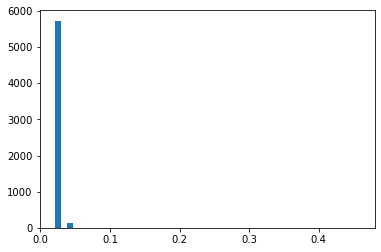

In [20]:
import matplotlib.pyplot as plt
plt.hist(d_to_nearest, bins=50)

Conclusion: cannot get desired distance to nearsest distribution for each CDR3 length. The distribution is not smooth enough to detect meaningful threshold value. 

=> The variation in the desired distribution mainly comes from different sequence lengths rather than variations in sequence difference.

## Calculate distance to the nearest (not identical) distribution using all sequence pairs

### Using Hamming distance
Only compute the distance when the sequence pair are of the same 

But put everything together to get one distribution

Comparable because the distance is normalized by the length

In [ ]:
import time
start_time = time.time()
df_summary = pd.DataFrame(columns=["Junction length","number of seq","index","d to nearest"])
for i,length in enumerate(keys1):
    index = list(values1)[i]
    n_seq = len_counts[length]
    dis = dist_groupwise(df,index)
    d_to_nearest = dist_to_nearest(dis)
    df_summary.append({"Junction length":length,
                       "number of seq":n_seq,
                       "index":index,
                       "d to nearest":d_to_nearest},
                      ignore_index=True)
print("--- %s seconds ---" % (time.time() - start_time))

Didn't finish computing.

Conclusion: cost too many time to compute, infeasible.

### Subsampling: stratified by V,J groups

#### Histogram when sampled by stratification, frac=0.1

In [8]:
df_sampled = pd.DataFrame(columns = df.columns)
for group in values:
    df_group_sampled = df.loc[group,:].sample(frac=0.1, random_state=1)
    df_sampled = pd.concat([df_sampled,df_group_sampled])

In [9]:
df_sampled

,Sequence number,Sequence ID,V-GENE and allele,J-GENE and allele,V-D-J-REGION,JUNCTION,JUNCTION length,multiple V-GENE alleles,multiple J-GENE alleles
103334,70386,M06023:233:000000000-JCVJP:1:1104:2626:10131_1...,Homsap IGHV1-18*01 F,Homsap IGHJ3*02 F,gcctctggttacccctttgccagctatggtttgagttgggtgcggc...,tgtgcgagagataccgttggaactacggttgatgcttttgatatctgg,48.0,False,False
23107,15700,M06023:233:000000000-JCVJP:1:2110:24627:13378_...,Homsap IGHV1-18*01 F,Homsap IGHJ4*02 F,gcctctggttacccctttgccagctatggtttgagttgggtgcggc...,tgtgcgagagatgggtcgattgagtggccacgattgggctactgg,45.0,False,False
67581,46019,M06023:233:000000000-JCVJP:1:1114:4165:5456_1:...,Homsap IGHV1-18*01 F,Homsap IGHJ4*02 F,gcctctggttacccctttgccagctatggtttgagttgggtgcggc...,tgtgcgagagatgggtcgattgagtggcgacgattgggctactgg,45.0,False,False
48525,33058,M06023:233:000000000-JCVJP:1:2116:24784:12441_...,Homsap IGHV1-18*01 F,Homsap IGHJ4*02 F,gcctctggttacccctttgccagctatggtttgagttgggtgcggc...,tgtgcgagggcgaggaccaggattttagtggctgcctttgactactgg,48.0,False,False
46746,31821,M06023:233:000000000-JCVJP:1:2102:22452:20401_...,Homsap IGHV1-18*01 F,Homsap IGHJ6*02 F,gcctctggttacccctttgccagctatggtttgagttgggtgcggc...,tgtgcgatagatgtcgactccggtgacttctactactctggtatgg...,54.0,False,False
...,...,...,...,...,...,...,...,...,...
6472,4430,M06023:233:000000000-JCVJP:1:1101:9393:22005_1...,Homsap IGHV6-1*02 F,Homsap IGHJ4*02 F,tgccatctccggggacagtgtctctagcaacagtgctgcttggaac...,tgtgcaagagatgtaaggctgctgggggtatttgactactgg,42.0,True,False
76564,52155,M06023:233:000000000-JCVJP:1:1112:13192:7195_1...,Homsap IGHV6-1*02 F,Homsap IGHJ4*02 F,ccatctccggggacagtgtctctagcaacagtgctgcttggaactg...,tgtgcaagagatgtaaggctgctgggggtatttgactactgg,42.0,True,False
95455,64975,M06023:233:000000000-JCVJP:1:1105:14275:17477_...,Homsap IGHV6-1*02 F,Homsap IGHJ4*02 F,tgccctctccggggacagtgtctctagcaacagtgctgcttggaac...,tgtgcaagagatgtaaggctgctgggggtatttgactactgg,42.0,True,False
84619,57619,M06023:233:000000000-JCVJP:1:1110:24644:12163_...,Homsap IGHV6-1*02 F,Homsap IGHJ4*02 F,tgccatctccggggacagtgtctctagcaacagtgctgcttggaac...,tgtgcaagagatgtaaggctgctgggggtatttgactactgg,42.0,True,False


In [10]:
len_counts = df_sampled.loc[:,"JUNCTION length"].value_counts()
len_counts

54.0    2817
63.0    2191
45.0    1425
24.0    1141
48.0    1108
47.0    1026
60.0     474
42.0     458
69.0     256
72.0     251
66.0     177
51.0     163
39.0     138
73.0      52
64.0      48
84.0      24
30.0      21
75.0       8
65.0       6
81.0       4
57.0       4
61.0       3
35.0       2
46.0       2
86.0       1
Name: JUNCTION length, dtype: int64

In [11]:
d_to_nearest_all = dist_to_nearest_all_exhaustive(df_sampled)

For group ['JUNCTION length'] = 24.0 , 1141 sequences, 650370 calls, use 2.228405 seconds.
For group ['JUNCTION length'] = 30.0 , 21 sequences, 210 calls, use 0.002021 seconds.
For group ['JUNCTION length'] = 35.0 , 2 sequences, 1 calls, use 0.000445 seconds.
For group ['JUNCTION length'] = 39.0 , 138 sequences, 9453 calls, use 0.049011 seconds.
For group ['JUNCTION length'] = 42.0 , 458 sequences, 104653 calls, use 0.510400 seconds.
For group ['JUNCTION length'] = 45.0 , 1425 sequences, 1014600 calls, use 5.372293 seconds.
For group ['JUNCTION length'] = 46.0 , 2 sequences, 1 calls, use 0.002013 seconds.
For group ['JUNCTION length'] = 47.0 , 1026 sequences, 525825 calls, use 3.297559 seconds.
For group ['JUNCTION length'] = 48.0 , 1108 sequences, 613278 calls, use 3.561484 seconds.
For group ['JUNCTION length'] = 51.0 , 163 sequences, 13203 calls, use 0.169246 seconds.
For group ['JUNCTION length'] = 54.0 , 2817 sequences, 3966336 calls, use 27.053288 seconds.
For group ['JUNCTION le

In [12]:
d_to_nearest_all

array([0., 0., 0., ..., 0., 0., 0.])

In [11]:
df_24 = df_sampled.loc[df_sampled["JUNCTION length"]==24,:]
seqs = df_24["JUNCTION"].values
seqs

array(['tgtgcgagagcctcagactactgg', 'tgtgcgagagcctcagactactgg',
       'tgtgcgagagcctcagactactgg', ..., 'tgtgcgagagcctcagactactgg',
       'tgtgcgagagcctcagactactgg', 'tgtgcgagagcctcagactactgg'],
      dtype=object)

In [12]:
Normalized_Hamming_dist(df_24.loc[33574,"JUNCTION"],df_24.loc[19060,"JUNCTION"])

0.0

(array([1.1705e+04, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 3.0000e+00, 1.3000e+01, 4.0000e+00,
        1.0000e+00, 3.5000e+01, 0.0000e+00, 1.0000e+00, 1.0000e+00,
        2.5000e+01, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 2.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 6.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 2.0000e+00]),
 array([0.        , 0.00085106, 0.00170213, 0.00255319, 0.00340426,
        0.00425532, 0.00510638, 0.00595745, 0.00680851, 0.00765957,
        0.00851064, 0.0093617 , 0.01021277, 0.01106383, 0.01191489,
        0.01276596, 0.01361702, 0.01446809, 0.01531915, 0.01617021,
        0.01702128, 0.01787234, 0.0187234 , 0.

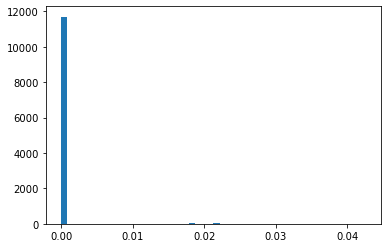

In [13]:
plt.hist(d_to_nearest_all,bins=50)

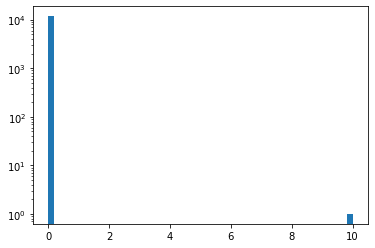

In [14]:
plt.hist(d_to_nearest_all,bins=50)
plt.yscale('log')
plt.show()

#### Histogram when sampled by n=1000

In [6]:
df_sampled = pd.DataFrame(columns = df.columns)
for group in values:
    if len(group) >= 1000:
        df_group_sampled = df.loc[group,:].sample(n=1000, random_state=1)
    else:
        df_group_sampled = df.loc[group,:]
    df_sampled = pd.concat([df_sampled,df_group_sampled])

In [7]:
df_sampled

,Sequence number,Sequence ID,V-GENE and allele,J-GENE and allele,V-D-J-REGION,JUNCTION,JUNCTION length,multiple V-GENE alleles,multiple J-GENE alleles
6382,4367,M06023:233:000000000-JCVJP:1:1101:12215:21186_...,Homsap IGHV1-18*01 F,Homsap IGHJ3*02 F,gcctctggttacccctttgccagctatggtttgagttgggtgcggc...,tgtgcgagagataccgttggaactacggttgatgcttttgatatctgg,48.0,False,False
11586,7912,M06023:233:000000000-JCVJP:1:2114:23340:12748_...,Homsap IGHV1-18*01 F,Homsap IGHJ3*02 F,gcctctggttacccctttgccagctatggtttgagttgggtgcggc...,tgtgcgagagatatcgttggaactatggttgatgcttttgatatctgg,48.0,False,False
48509,33048,M06023:233:000000000-JCVJP:1:2116:19226:12317_...,Homsap IGHV1-18*01 F,Homsap IGHJ3*02 F,gcctctggttacccctttgccagctatggtttgagttgggtgcggc...,tgtgcgagagataccgttggaactacggttgatgcttttgatatctgg,48.0,False,False
48913,33319,M06023:233:000000000-JCVJP:1:2116:2448:14612_1...,Homsap IGHV1-18*01 F,Homsap IGHJ3*02 F,gcctctggttacccctttgctagctatggtttgagttgggtgcggc...,tgtgcgagagataccgttggaactacggttgatgcttttgatatctgg,48.0,False,False
89788,61162,M06023:233:000000000-JCVJP:1:1108:20289:9732_1...,Homsap IGHV1-18*01 F,Homsap IGHJ3*02 F,gcctctggttacccctttgccagctatggtttgagttgggtgcggc...,tgtgcgagagataccgttggaactacggttgatgcttttgatatctgg,48.0,False,False
...,...,...,...,...,...,...,...,...,...
94122,64070,M06023:233:000000000-JCVJP:1:1105:22080:10100_...,Homsap IGHV6-1*02 F,Homsap IGHJ5*02 F,ccatctccggggacagtgtctctagcaacagtgctgcttggaactg...,tgtgcaagagatgtaaggctgctgg,25.0,True,True
9196,6274,M06023:233:000000000-JCVJP:1:2115:23043:19521_...,Homsap IGHV6-1*02 F,Homsap IGHJ6*02 F,ccatctccggggacagtgtctctagcaacagtgctgcttggaactg...,tgtgcgagatataccagcagccaccccgactactactacgctatgg...,54.0,True,False
56735,38662,M06023:233:000000000-JCVJP:1:2101:20843:2299_1...,Homsap IGHV6-1*02 F,Homsap IGHJ6*02 F,ccatctccggggacagtgtctctagcaacagtgctgcttggaactg...,tgtgcgagagttccgatttacggtggtgaggactattacggtatgg...,54.0,True,False
38691,26323,M06023:233:000000000-JCVJP:1:2104:27749:11422_...,Homsap IGHV6-1*02 F,Homsap IGHJ6*02 F,ccatctccggggacagtgtctctagcaacagtgctgcttggaactg...,tgtgcaacagagctttatcgtcccctctattactatcataatcgtg...,60.0,True,False


In [30]:
# n=1000
df_summary = dist_to_nearest_distribution_Hamming(df_sampled)

/Users/lou/Lib/anaconda3/envs/thesis/lib/python3.7/site-packages/pandas/core/internals/blocks.py:993: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  arr_value = np.array(value)


For length 23.0 , 7 sequences, use 0.005949258804321289 seconds.
For length 24.0 , 4217 sequences, use 271.31303906440735 seconds.
For length 25.0 , 6 sequences, use 0.011893033981323242 seconds.
For length 30.0 , 225 sequences, use 1.6962692737579346 seconds.
For length 31.0 , 4 sequences, use 0.004316091537475586 seconds.
For length 33.0 , 11 sequences, use 0.007192134857177734 seconds.
For length 35.0 , 23 sequences, use 0.029755830764770508 seconds.
For length 36.0 , 2 sequences, use 0.0032012462615966797 seconds.
For length 39.0 , 1460 sequences, use 33.44735836982727 seconds.
For length 40.0 , 2 sequences, use 0.0020749568939208984 seconds.
For length 41.0 , 7 sequences, use 0.0013349056243896484 seconds.
For length 42.0 , 2776 sequences, use 118.60340595245361 seconds.
For length 44.0 , 12 sequences, use 0.007664918899536133 seconds.
For length 45.0 , 4435 sequences, use 267.3073060512543 seconds.
For length 46.0 , 33 sequences, use 0.027822017669677734 seconds.
For length 47.0 

In [8]:
%%time
dsds = dist_to_nearest_all_exhaustive(df_sampled)

For group ['JUNCTION length'] = 23.0 , 7 sequences, 21 calls, use 0.004020 seconds.
For group ['JUNCTION length'] = 24.0 , 4217 sequences, 8889436 calls, use 39.503897 seconds.
For group ['JUNCTION length'] = 25.0 , 6 sequences, 15 calls, use 0.011120 seconds.
For group ['JUNCTION length'] = 30.0 , 225 sequences, 25200 calls, use 0.095146 seconds.
For group ['JUNCTION length'] = 31.0 , 4 sequences, 6 calls, use 0.000768 seconds.
For group ['JUNCTION length'] = 33.0 , 11 sequences, 55 calls, use 0.000594 seconds.
For group ['JUNCTION length'] = 35.0 , 23 sequences, 253 calls, use 0.001802 seconds.
For group ['JUNCTION length'] = 36.0 , 2 sequences, 1 calls, use 0.000377 seconds.
For group ['JUNCTION length'] = 39.0 , 1460 sequences, 1065070 calls, use 5.427256 seconds.
For group ['JUNCTION length'] = 40.0 , 2 sequences, 1 calls, use 0.001704 seconds.
For group ['JUNCTION length'] = 41.0 , 7 sequences, 21 calls, use 0.001138 seconds.
For group ['JUNCTION length'] = 42.0 , 2776 sequences,

(array([4.0139e+04, 3.1360e+03, 3.3000e+01, 3.6000e+01, 2.1800e+02,
        1.0000e+00, 3.0000e+00, 0.0000e+00, 4.4000e+01, 0.0000e+00,
        0.0000e+00, 2.1000e+01, 4.5000e+01, 9.0000e+00, 3.7000e+01,
        2.7000e+01, 6.1000e+01, 1.4600e+02, 1.6000e+02, 8.0000e+00,
        4.0000e+00, 4.6200e+02, 1.0000e+01, 4.9000e+01, 8.4000e+01,
        2.5400e+02, 5.9600e+02, 3.8200e+02, 5.2000e+01, 1.2000e+02,
        2.0000e+00, 1.0000e+00, 2.1000e+01, 2.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.7970e+03]),
 array([0.01162791, 0.03139535, 0.05116279, 0.07093023, 0.09069767,
        0.11046512, 0.13023256, 0.15      , 0.16976744, 0.18953488,
        0.20930233, 0.22906977, 0.24883721, 0.26860465, 0.28837209,
        0.30813953, 0.32790698, 0.34767442, 0.36744186, 0.3872093 ,
        0.40697674, 0.42674419, 0.44651163, 0.

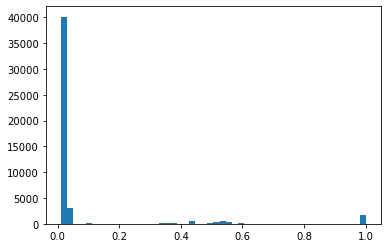

In [18]:
plt.hist(dsds,bins=50)

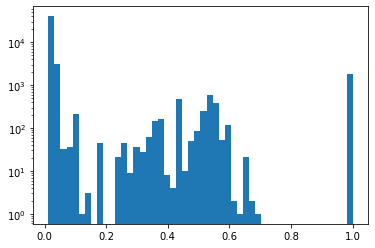

In [10]:
plt.hist(dsds,bins=50)
plt.yscale('log')
plt.show()

Filtering out the dominant components

(array([  2.,  31.,   1.,  35.,   0.,   1.,   0., 217.,   0.,   1.,   0.,
          2.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  44.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,  21.,   2.,   0.,  41.,
          2.,   6.,   0.,   3.,   0.,  37.,   0.,   0.,  27.,   0.,   0.,
         60.,   1.,   0.,  16., 129.,   4.,   0., 157.,   0.,   7.,   1.,
          0.,   1.,   0.,   0.,  13., 356.,  96.,   0.,   9.,   1.,   3.,
          0.,  46.,   2.,  80.,   2.,   0.,  19., 227.,   8., 112., 484.,
          0.,  33., 349.,   0.,  52.,   0.,   0.,   0., 118.,   2.,   0.,
          0.,   2.,   0.,   1.,   0.,   0.,   0.,  21.,   0.,   2.,   0.,
          1.]),
 array([0.05555556, 0.06184211, 0.06812865, 0.0744152 , 0.08070175,
        0.0869883 , 0.09327485, 0.0995614 , 0.10584795, 0.1121345 ,
        0.11842105, 0.1247076 , 0.13099415, 0.1372807 , 0.14356725,
        0.1498538 , 0.15614035, 0.1624269 , 0.16871345, 0.175     ,
        0.18128655, 0.1875731 , 0.19385965, 0.

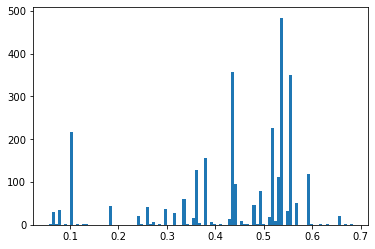

In [25]:
plt.hist(dsds[np.array(dsds>0.052) & np.array(dsds<0.98)],bins=100)

#### Histogram when sampled by n=2000

In [39]:
df_sampled = pd.DataFrame(columns = df.columns)
for group in values:
    if len(group) >= 2000:
        df_group_sampled = df.loc[group,:].sample(n=2000, random_state=1)
    else:
        df_group_sampled = df.loc[group,:]
    df_sampled = pd.concat([df_sampled,df_group_sampled])

In [40]:
df_sampled

,Sequence number,Sequence ID,V-GENE and allele,J-GENE and allele,V-D-J-REGION,JUNCTION,JUNCTION length,multiple V-GENE alleles,multiple J-GENE alleles
6382,4367,M06023:233:000000000-JCVJP:1:1101:12215:21186_...,Homsap IGHV1-18*01 F,Homsap IGHJ3*02 F,gcctctggttacccctttgccagctatggtttgagttgggtgcggc...,tgtgcgagagataccgttggaactacggttgatgcttttgatatctgg,48.0,False,False
11586,7912,M06023:233:000000000-JCVJP:1:2114:23340:12748_...,Homsap IGHV1-18*01 F,Homsap IGHJ3*02 F,gcctctggttacccctttgccagctatggtttgagttgggtgcggc...,tgtgcgagagatatcgttggaactatggttgatgcttttgatatctgg,48.0,False,False
48509,33048,M06023:233:000000000-JCVJP:1:2116:19226:12317_...,Homsap IGHV1-18*01 F,Homsap IGHJ3*02 F,gcctctggttacccctttgccagctatggtttgagttgggtgcggc...,tgtgcgagagataccgttggaactacggttgatgcttttgatatctgg,48.0,False,False
48913,33319,M06023:233:000000000-JCVJP:1:2116:2448:14612_1...,Homsap IGHV1-18*01 F,Homsap IGHJ3*02 F,gcctctggttacccctttgctagctatggtttgagttgggtgcggc...,tgtgcgagagataccgttggaactacggttgatgcttttgatatctgg,48.0,False,False
89788,61162,M06023:233:000000000-JCVJP:1:1108:20289:9732_1...,Homsap IGHV1-18*01 F,Homsap IGHJ3*02 F,gcctctggttacccctttgccagctatggtttgagttgggtgcggc...,tgtgcgagagataccgttggaactacggttgatgcttttgatatctgg,48.0,False,False
...,...,...,...,...,...,...,...,...,...
94122,64070,M06023:233:000000000-JCVJP:1:1105:22080:10100_...,Homsap IGHV6-1*02 F,Homsap IGHJ5*02 F,ccatctccggggacagtgtctctagcaacagtgctgcttggaactg...,tgtgcaagagatgtaaggctgctgg,25.0,True,True
9196,6274,M06023:233:000000000-JCVJP:1:2115:23043:19521_...,Homsap IGHV6-1*02 F,Homsap IGHJ6*02 F,ccatctccggggacagtgtctctagcaacagtgctgcttggaactg...,tgtgcgagatataccagcagccaccccgactactactacgctatgg...,54.0,True,False
56735,38662,M06023:233:000000000-JCVJP:1:2101:20843:2299_1...,Homsap IGHV6-1*02 F,Homsap IGHJ6*02 F,ccatctccggggacagtgtctctagcaacagtgctgcttggaactg...,tgtgcgagagttccgatttacggtggtgaggactattacggtatgg...,54.0,True,False
38691,26323,M06023:233:000000000-JCVJP:1:2104:27749:11422_...,Homsap IGHV6-1*02 F,Homsap IGHJ6*02 F,ccatctccggggacagtgtctctagcaacagtgctgcttggaactg...,tgtgcaacagagctttatcgtcccctctattactatcataatcgtg...,60.0,True,False


In [41]:
%%time
dsds = dist_to_nearest_all_exhaustive(df_sampled)

For group ['JUNCTION length'] = 23.0 , 7 sequences, 21 calls, use 0.019788 seconds.
For group ['JUNCTION length'] = 24.0 , 6109 sequences, 18656886 calls, use 96.643274 seconds.
For group ['JUNCTION length'] = 25.0 , 6 sequences, 15 calls, use 0.040982 seconds.
For group ['JUNCTION length'] = 30.0 , 225 sequences, 25200 calls, use 0.110890 seconds.
For group ['JUNCTION length'] = 31.0 , 4 sequences, 6 calls, use 0.000969 seconds.
For group ['JUNCTION length'] = 33.0 , 11 sequences, 55 calls, use 0.001011 seconds.
For group ['JUNCTION length'] = 35.0 , 23 sequences, 253 calls, use 0.001836 seconds.
For group ['JUNCTION length'] = 36.0 , 2 sequences, 1 calls, use 0.000701 seconds.
For group ['JUNCTION length'] = 39.0 , 1460 sequences, 1065070 calls, use 5.947910 seconds.
For group ['JUNCTION length'] = 40.0 , 2 sequences, 1 calls, use 0.002355 seconds.
For group ['JUNCTION length'] = 41.0 , 7 sequences, 21 calls, use 0.000875 seconds.
For group ['JUNCTION length'] = 42.0 , 4622 sequences

(array([5.2677e+04, 4.0350e+03, 3.1000e+01, 3.6000e+01, 2.1800e+02,
        1.0000e+00, 3.0000e+00, 0.0000e+00, 4.4000e+01, 0.0000e+00,
        0.0000e+00, 2.1000e+01, 4.5000e+01, 9.0000e+00, 3.8000e+01,
        2.6000e+01, 6.5000e+01, 1.4600e+02, 1.6000e+02, 8.0000e+00,
        4.0000e+00, 4.6200e+02, 1.0000e+01, 4.9000e+01, 8.4000e+01,
        2.6000e+02, 5.9000e+02, 3.8200e+02, 5.2000e+01, 1.2000e+02,
        2.0000e+00, 1.0000e+00, 2.1000e+01, 2.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 2.7970e+03]),
 array([0.01162791, 0.03139535, 0.05116279, 0.07093023, 0.09069767,
        0.11046512, 0.13023256, 0.15      , 0.16976744, 0.18953488,
        0.20930233, 0.22906977, 0.24883721, 0.26860465, 0.28837209,
        0.30813953, 0.32790698, 0.34767442, 0.36744186, 0.3872093 ,
        0.40697674, 0.42674419, 0.44651163, 0.

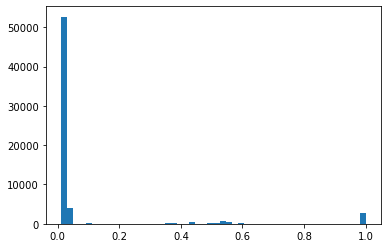

In [42]:
plt.hist(dsds,bins=50)

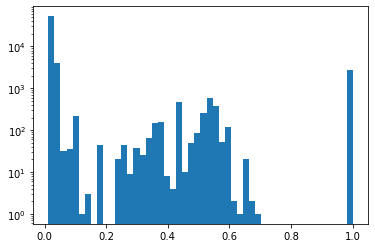

In [43]:
plt.hist(dsds,bins=50)
plt.yscale('log')
plt.show()

Filtering out the dominant components

(array([  2.,  29.,   1.,  35.,   0.,   1.,   0., 217.,   0.,   1.,   0.,
          2.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  44.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,  21.,   2.,   0.,  41.,
          2.,   6.,   0.,   3.,   0.,  38.,   0.,   0.,  26.,   0.,   0.,
         64.,   1.,   0.,  16., 129.,   4.,   0., 157.,   0.,   7.,   1.,
          0.,   1.,   0.,   0.,  13., 356.,  96.,   0.,   9.,   1.,   3.,
          0.,  46.,   2.,  80.,   2.,   0.,  19., 233.,   8., 112., 478.,
          0.,  33., 349.,   0.,  52.,   0.,   0.,   0., 118.,   2.,   0.,
          0.,   2.,   0.,   1.,   0.,   0.,   0.,  21.,   0.,   2.,   0.,
          1.]),
 array([0.05555556, 0.06184211, 0.06812865, 0.0744152 , 0.08070175,
        0.0869883 , 0.09327485, 0.0995614 , 0.10584795, 0.1121345 ,
        0.11842105, 0.1247076 , 0.13099415, 0.1372807 , 0.14356725,
        0.1498538 , 0.15614035, 0.1624269 , 0.16871345, 0.175     ,
        0.18128655, 0.1875731 , 0.19385965, 0.

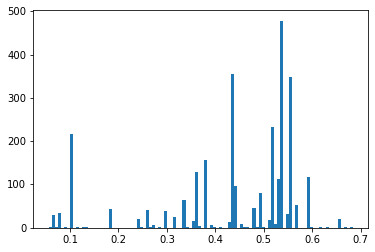

In [44]:
plt.hist(dsds[np.array(dsds>0.052) & np.array(dsds<0.98)],bins=100)

Conclusion: too many sequence pairs have very small or very large distance. 

-> the repertorie is too diversed? One clone that is not well expanded dominates the repertorie?

-> how to exclude such sequence pairs?

#### Histogram when exclude the dominant group and sampled by n=1000

In [46]:
groupsize = []
for v in values:
    groupsize.append(len(v))
np.argmax(groupsize)

396

In [50]:
len_counts

54.0     28318
63.0     22009
45.0     14337
24.0     11467
48.0     11143
47.0     10342
60.0      4872
42.0      4622
72.0      2621
69.0      2578
66.0      1883
51.0      1707
39.0      1460
73.0       556
64.0       501
84.0       241
30.0       225
75.0        93
57.0        72
65.0        66
61.0        47
46.0        33
81.0        29
35.0        23
86.0        23
44.0        12
33.0        11
62.0         9
80.0         9
23.0         7
41.0         7
25.0         6
52.0         5
53.0         5
68.0         4
31.0         4
40.0         2
67.0         2
36.0         2
49.0         2
77.0         2
105.0        1
71.0         1
Name: JUNCTION length, dtype: int64

In [57]:
df_sampled = pd.DataFrame(columns = df.columns)
for group in values:
    if df.loc[group[0],"JUNCTION length"] == 54 or df.loc[group[0],"JUNCTION length"] == 63:
        continue
    if len(group) >= 1000:
        df_group_sampled = df.loc[group,:].sample(n=1000, random_state=1)
    else:
        df_group_sampled = df.loc[group,:]
    df_sampled = pd.concat([df_sampled,df_group_sampled])

In [58]:
df_sampled

,Sequence number,Sequence ID,V-GENE and allele,J-GENE and allele,V-D-J-REGION,JUNCTION,JUNCTION length,multiple V-GENE alleles,multiple J-GENE alleles
6382,4367,M06023:233:000000000-JCVJP:1:1101:12215:21186_...,Homsap IGHV1-18*01 F,Homsap IGHJ3*02 F,gcctctggttacccctttgccagctatggtttgagttgggtgcggc...,tgtgcgagagataccgttggaactacggttgatgcttttgatatctgg,48.0,False,False
11586,7912,M06023:233:000000000-JCVJP:1:2114:23340:12748_...,Homsap IGHV1-18*01 F,Homsap IGHJ3*02 F,gcctctggttacccctttgccagctatggtttgagttgggtgcggc...,tgtgcgagagatatcgttggaactatggttgatgcttttgatatctgg,48.0,False,False
48509,33048,M06023:233:000000000-JCVJP:1:2116:19226:12317_...,Homsap IGHV1-18*01 F,Homsap IGHJ3*02 F,gcctctggttacccctttgccagctatggtttgagttgggtgcggc...,tgtgcgagagataccgttggaactacggttgatgcttttgatatctgg,48.0,False,False
48913,33319,M06023:233:000000000-JCVJP:1:2116:2448:14612_1...,Homsap IGHV1-18*01 F,Homsap IGHJ3*02 F,gcctctggttacccctttgctagctatggtttgagttgggtgcggc...,tgtgcgagagataccgttggaactacggttgatgcttttgatatctgg,48.0,False,False
89788,61162,M06023:233:000000000-JCVJP:1:1108:20289:9732_1...,Homsap IGHV1-18*01 F,Homsap IGHJ3*02 F,gcctctggttacccctttgccagctatggtttgagttgggtgcggc...,tgtgcgagagataccgttggaactacggttgatgcttttgatatctgg,48.0,False,False
...,...,...,...,...,...,...,...,...,...
78293,53316,M06023:233:000000000-JCVJP:1:1112:24690:14661_...,Homsap IGHV6-1*02 F,Homsap IGHJ4*02 F,ccatctccggggacagtgtctctagcaacagtgctgcttggaactg...,tgtgcaagtcaaccctattatgattacgtttggggagacagggatt...,51.0,True,False
94121,64070,M06023:233:000000000-JCVJP:1:1105:22080:10100_...,Homsap IGHV6-1*02 F,Homsap IGHJ5*01 F,ccatctccggggacagtgtctctagcaacagtgctgcttggaactg...,tgtgcaagagatgtaaggctgctgg,25.0,True,True
94122,64070,M06023:233:000000000-JCVJP:1:1105:22080:10100_...,Homsap IGHV6-1*02 F,Homsap IGHJ5*02 F,ccatctccggggacagtgtctctagcaacagtgctgcttggaactg...,tgtgcaagagatgtaaggctgctgg,25.0,True,True
38691,26323,M06023:233:000000000-JCVJP:1:2104:27749:11422_...,Homsap IGHV6-1*02 F,Homsap IGHJ6*02 F,ccatctccggggacagtgtctctagcaacagtgctgcttggaactg...,tgtgcaacagagctttatcgtcccctctattactatcataatcgtg...,60.0,True,False


In [59]:
%%time
dsds = dist_to_nearest_all_exhaustive(df_sampled)

For group ['JUNCTION length'] = 23.0 , 7 sequences, 21 calls, use 0.002383 seconds.
For group ['JUNCTION length'] = 24.0 , 4217 sequences, 8889436 calls, use 30.794792 seconds.
For group ['JUNCTION length'] = 25.0 , 6 sequences, 15 calls, use 0.013781 seconds.
For group ['JUNCTION length'] = 30.0 , 225 sequences, 25200 calls, use 0.102665 seconds.
For group ['JUNCTION length'] = 31.0 , 4 sequences, 6 calls, use 0.000855 seconds.
For group ['JUNCTION length'] = 33.0 , 11 sequences, 55 calls, use 0.001125 seconds.
For group ['JUNCTION length'] = 35.0 , 23 sequences, 253 calls, use 0.001777 seconds.
For group ['JUNCTION length'] = 36.0 , 2 sequences, 1 calls, use 0.000391 seconds.
For group ['JUNCTION length'] = 39.0 , 1460 sequences, 1065070 calls, use 5.645867 seconds.
For group ['JUNCTION length'] = 40.0 , 2 sequences, 1 calls, use 0.002135 seconds.
For group ['JUNCTION length'] = 41.0 , 7 sequences, 21 calls, use 0.000782 seconds.
For group ['JUNCTION length'] = 42.0 , 2776 sequences,

(array([3.0392e+04, 3.0310e+03, 3.1000e+01, 3.3000e+01, 2.1700e+02,
        1.0000e+00, 3.0000e+00, 0.0000e+00, 4.4000e+01, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 4.0000e+00, 7.0000e+00, 0.0000e+00,
        2.0000e+00, 5.9000e+01, 1.2900e+02, 1.6000e+02, 8.0000e+00,
        4.0000e+00, 4.6200e+02, 1.0000e+01, 4.0000e+00, 8.4000e+01,
        2.5400e+02, 5.3100e+02, 3.7600e+02, 5.2000e+01, 1.2000e+02,
        2.0000e+00, 1.0000e+00, 2.1000e+01, 2.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.6810e+03]),
 array([0.01162791, 0.03139535, 0.05116279, 0.07093023, 0.09069767,
        0.11046512, 0.13023256, 0.15      , 0.16976744, 0.18953488,
        0.20930233, 0.22906977, 0.24883721, 0.26860465, 0.28837209,
        0.30813953, 0.32790698, 0.34767442, 0.36744186, 0.3872093 ,
        0.40697674, 0.42674419, 0.44651163, 0.

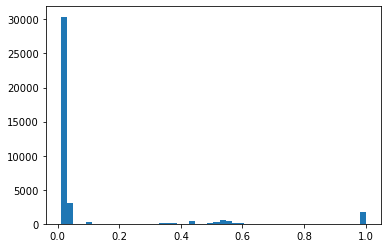

In [60]:
plt.hist(dsds,bins=50)

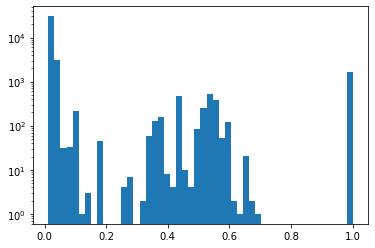

In [61]:
plt.hist(dsds,bins=50)
plt.yscale('log')
plt.show()

Filtering out the dominant components

(array([ 31.,   0.,  33.,   0.,   0., 217.,   0.,   1.,   0.,   0.,   2.,
          1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  44.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   2.,   0.,   2.,
          4.,   0.,   3.,   0.,   0.,   0.,   0.,   2.,   0.,   0.,  58.,
          1.,   0.,   0.,   0., 129.,   3.,   2., 155.,   7.,   1.,   0.,
          1.,   0.,   0.,   3., 364.,   2.,  96.,   6.,   4.,   0.,   3.,
          1.,   0.,  82.,   0.,   2.,  16., 230.,   1.,   7., 210., 321.,
          0.,  33., 343.,   0.,  52.,   0.,   0., 118.,   0.,   2.,   0.,
          0.,   2.,   0.,   1.,   0.,   0.,   0.,  21.,   0.,   2.,   0.,
          1.]),
 array([0.06382979, 0.07003359, 0.0762374 , 0.08244121, 0.08864502,
        0.09484882, 0.10105263, 0.10725644, 0.11346025, 0.11966405,
        0.12586786, 0.13207167, 0.13827548, 0.14447928, 0.15068309,
        0.1568869 , 0.16309071, 0.16929451, 0.17549832, 0.18170213,
        0.18790594, 0.19410974, 0.20031355, 0.

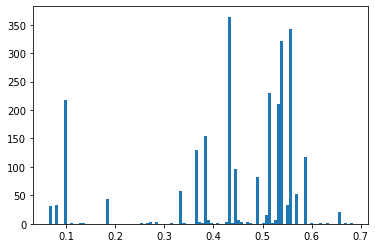

In [62]:
plt.hist(dsds[np.array(dsds>0.052) & np.array(dsds<0.98)],bins=100)

#### Nearest neighbor searching strategy: Linear AESA
Subsampling to get the pilot sequences, then compute the distance to the nearest pilot to each sequence.

Sampling process stratified by 'V-GENE and allele', 'J-GENE and allele', 'JUNCTION length'.

frac_small=0.99, n=10

Both (normalized) Hamming and Levenshtein distance are metric.

In [7]:
df_subsampled = subsample(df, random_state=1, frac=0.65, groups=values)

In [11]:
%%time
d_to_nearest_all = cal_dist_to_nearest_all_approximate(df_subsampled,distance=Normalized_Hamming_dist)

6014 pilots, 71732 target sequences.
18081091 calls during pre-computation
34 calls during nearest neighbour search
34 calls during nearest neighbour search
34 calls during nearest neighbour search
34 calls during nearest neighbour search
34 calls during nearest neighbour search
34 calls during nearest neighbour search
34 calls during nearest neighbour search
34 calls during nearest neighbour search
34 calls during nearest neighbour search
34 calls during nearest neighbour search
34 calls during nearest neighbour search
34 calls during nearest neighbour search
34 calls during nearest neighbour search
34 calls during nearest neighbour search
34 calls during nearest neighbour search
34 calls during nearest neighbour search
34 calls during nearest neighbour search
34 calls during nearest neighbour search
34 calls during nearest neighbour search
34 calls during nearest neighbour search
34 calls during nearest neighbour search
34 calls during nearest neighbour search
34 calls during nearest

45 calls during nearest neighbour search
172 calls during nearest neighbour search
172 calls during nearest neighbour search
172 calls during nearest neighbour search
172 calls during nearest neighbour search
172 calls during nearest neighbour search
172 calls during nearest neighbour search
172 calls during nearest neighbour search
172 calls during nearest neighbour search
172 calls during nearest neighbour search
45 calls during nearest neighbour search
172 calls during nearest neighbour search
45 calls during nearest neighbour search
45 calls during nearest neighbour search
172 calls during nearest neighbour search
172 calls during nearest neighbour search
8 calls during nearest neighbour search
172 calls during nearest neighbour search
172 calls during nearest neighbour search
172 calls during nearest neighbour search
45 calls during nearest neighbour search
45 calls during nearest neighbour search
172 calls during nearest neighbour search
172 calls during nearest neighbour search


283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour

283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour

283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour

283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour

283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour

283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour

283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour

283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour

283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour

283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour

283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour

283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour

283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour

283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour

283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour

283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour

283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour

283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour

283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour

283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour

283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour

283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour

283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour

283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour

169 calls during nearest neighbour search
169 calls during nearest neighbour search
50 calls during nearest neighbour search
169 calls during nearest neighbour search
75 calls during nearest neighbour search
50 calls during nearest neighbour search
169 calls during nearest neighbour search
16 calls during nearest neighbour search
50 calls during nearest neighbour search
75 calls during nearest neighbour search
169 calls during nearest neighbour search
169 calls during nearest neighbour search
169 calls during nearest neighbour search
169 calls during nearest neighbour search
8 calls during nearest neighbour search
36 calls during nearest neighbour search
75 calls during nearest neighbour search
169 calls during nearest neighbour search
169 calls during nearest neighbour search
75 calls during nearest neighbour search
169 calls during nearest neighbour search
50 calls during nearest neighbour search
12 calls during nearest neighbour search
36 calls during nearest neighbour search
169 ca

75 calls during nearest neighbour search
11 calls during nearest neighbour search
75 calls during nearest neighbour search
50 calls during nearest neighbour search
50 calls during nearest neighbour search
169 calls during nearest neighbour search
169 calls during nearest neighbour search
8 calls during nearest neighbour search
169 calls during nearest neighbour search
50 calls during nearest neighbour search
8 calls during nearest neighbour search
169 calls during nearest neighbour search
75 calls during nearest neighbour search
36 calls during nearest neighbour search
75 calls during nearest neighbour search
169 calls during nearest neighbour search
75 calls during nearest neighbour search
169 calls during nearest neighbour search
36 calls during nearest neighbour search
36 calls during nearest neighbour search
75 calls during nearest neighbour search
169 calls during nearest neighbour search
169 calls during nearest neighbour search
50 calls during nearest neighbour search
169 calls 

36 calls during nearest neighbour search
169 calls during nearest neighbour search
169 calls during nearest neighbour search
75 calls during nearest neighbour search
50 calls during nearest neighbour search
36 calls during nearest neighbour search
50 calls during nearest neighbour search
12 calls during nearest neighbour search
169 calls during nearest neighbour search
169 calls during nearest neighbour search
36 calls during nearest neighbour search
50 calls during nearest neighbour search
169 calls during nearest neighbour search
36 calls during nearest neighbour search
75 calls during nearest neighbour search
50 calls during nearest neighbour search
36 calls during nearest neighbour search
169 calls during nearest neighbour search
169 calls during nearest neighbour search
169 calls during nearest neighbour search
169 calls during nearest neighbour search
75 calls during nearest neighbour search
169 calls during nearest neighbour search
169 calls during nearest neighbour search
75 ca

59 calls during nearest neighbour search
32 calls during nearest neighbour search
103 calls during nearest neighbour search
32 calls during nearest neighbour search
10 calls during nearest neighbour search
103 calls during nearest neighbour search
103 calls during nearest neighbour search
59 calls during nearest neighbour search
59 calls during nearest neighbour search
103 calls during nearest neighbour search
103 calls during nearest neighbour search
59 calls during nearest neighbour search
103 calls during nearest neighbour search
103 calls during nearest neighbour search
103 calls during nearest neighbour search
103 calls during nearest neighbour search
103 calls during nearest neighbour search
103 calls during nearest neighbour search
103 calls during nearest neighbour search
103 calls during nearest neighbour search
103 calls during nearest neighbour search
10 calls during nearest neighbour search
32 calls during nearest neighbour search
103 calls during nearest neighbour search
1

38 calls during nearest neighbour search
103 calls during nearest neighbour search
103 calls during nearest neighbour search
103 calls during nearest neighbour search
103 calls during nearest neighbour search
38 calls during nearest neighbour search
103 calls during nearest neighbour search
37 calls during nearest neighbour search
37 calls during nearest neighbour search
103 calls during nearest neighbour search
38 calls during nearest neighbour search
103 calls during nearest neighbour search
103 calls during nearest neighbour search
103 calls during nearest neighbour search
18 calls during nearest neighbour search
37 calls during nearest neighbour search
103 calls during nearest neighbour search
103 calls during nearest neighbour search
103 calls during nearest neighbour search
103 calls during nearest neighbour search
103 calls during nearest neighbour search
103 calls during nearest neighbour search
38 calls during nearest neighbour search
18 calls during nearest neighbour search
1

283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
172 calls during nearest neighbour search
172 calls during nearest neighbour

283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour

169 calls during nearest neighbour search
12 calls during nearest neighbour search
12 calls during nearest neighbour search
36 calls during nearest neighbour search
169 calls during nearest neighbour search
169 calls during nearest neighbour search
169 calls during nearest neighbour search
75 calls during nearest neighbour search
75 calls during nearest neighbour search
50 calls during nearest neighbour search
12 calls during nearest neighbour search
50 calls during nearest neighbour search
169 calls during nearest neighbour search
50 calls during nearest neighbour search
169 calls during nearest neighbour search
16 calls during nearest neighbour search
75 calls during nearest neighbour search
169 calls during nearest neighbour search
12 calls during nearest neighbour search
169 calls during nearest neighbour search
169 calls during nearest neighbour search
8 calls during nearest neighbour search
36 calls during nearest neighbour search
169 calls during nearest neighbour search
36 call

169 calls during nearest neighbour search
169 calls during nearest neighbour search
50 calls during nearest neighbour search
16 calls during nearest neighbour search
50 calls during nearest neighbour search
16 calls during nearest neighbour search
36 calls during nearest neighbour search
169 calls during nearest neighbour search
169 calls during nearest neighbour search
50 calls during nearest neighbour search
36 calls during nearest neighbour search
169 calls during nearest neighbour search
169 calls during nearest neighbour search
36 calls during nearest neighbour search
169 calls during nearest neighbour search
169 calls during nearest neighbour search
75 calls during nearest neighbour search
75 calls during nearest neighbour search
16 calls during nearest neighbour search
169 calls during nearest neighbour search
169 calls during nearest neighbour search
169 calls during nearest neighbour search
75 calls during nearest neighbour search
169 calls during nearest neighbour search
16 c

42 calls during nearest neighbour search
42 calls during nearest neighbour search
42 calls during nearest neighbour search
17 calls during nearest neighbour search
42 calls during nearest neighbour search
42 calls during nearest neighbour search
42 calls during nearest neighbour search
9 calls during nearest neighbour search
42 calls during nearest neighbour search
42 calls during nearest neighbour search
38 calls during nearest neighbour search
8 calls during nearest neighbour search
8 calls during nearest neighbour search
17 calls during nearest neighbour search
19 calls during nearest neighbour search
103 calls during nearest neighbour search
42 calls during nearest neighbour search
42 calls during nearest neighbour search
42 calls during nearest neighbour search
42 calls during nearest neighbour search
19 calls during nearest neighbour search
19 calls during nearest neighbour search
19 calls during nearest neighbour search
103 calls during nearest neighbour search
19 calls during n

65 calls during nearest neighbour search
65 calls during nearest neighbour search
34 calls during nearest neighbour search
63 calls during nearest neighbour search
34 calls during nearest neighbour search
34 calls during nearest neighbour search
34 calls during nearest neighbour search
63 calls during nearest neighbour search
63 calls during nearest neighbour search
34 calls during nearest neighbour search
34 calls during nearest neighbour search
63 calls during nearest neighbour search
63 calls during nearest neighbour search
34 calls during nearest neighbour search
63 calls during nearest neighbour search
63 calls during nearest neighbour search
37 calls during nearest neighbour search
103 calls during nearest neighbour search
103 calls during nearest neighbour search
103 calls during nearest neighbour search
18 calls during nearest neighbour search
103 calls during nearest neighbour search
38 calls during nearest neighbour search
103 calls during nearest neighbour search
103 calls d

38 calls during nearest neighbour search
103 calls during nearest neighbour search
37 calls during nearest neighbour search
38 calls during nearest neighbour search
103 calls during nearest neighbour search
103 calls during nearest neighbour search
103 calls during nearest neighbour search
103 calls during nearest neighbour search
37 calls during nearest neighbour search
103 calls during nearest neighbour search
103 calls during nearest neighbour search
10 calls during nearest neighbour search
103 calls during nearest neighbour search
103 calls during nearest neighbour search
37 calls during nearest neighbour search
103 calls during nearest neighbour search
37 calls during nearest neighbour search
38 calls during nearest neighbour search
37 calls during nearest neighbour search
103 calls during nearest neighbour search
103 calls during nearest neighbour search
103 calls during nearest neighbour search
103 calls during nearest neighbour search
38 calls during nearest neighbour search
10

103 calls during nearest neighbour search
103 calls during nearest neighbour search
103 calls during nearest neighbour search
103 calls during nearest neighbour search
18 calls during nearest neighbour search
103 calls during nearest neighbour search
10 calls during nearest neighbour search
103 calls during nearest neighbour search
103 calls during nearest neighbour search
103 calls during nearest neighbour search
38 calls during nearest neighbour search
103 calls during nearest neighbour search
37 calls during nearest neighbour search
103 calls during nearest neighbour search
37 calls during nearest neighbour search
103 calls during nearest neighbour search
38 calls during nearest neighbour search
103 calls during nearest neighbour search
10 calls during nearest neighbour search
103 calls during nearest neighbour search
103 calls during nearest neighbour search
38 calls during nearest neighbour search
103 calls during nearest neighbour search
103 calls during nearest neighbour search


103 calls during nearest neighbour search
103 calls during nearest neighbour search
103 calls during nearest neighbour search
103 calls during nearest neighbour search
103 calls during nearest neighbour search
9 calls during nearest neighbour search
38 calls during nearest neighbour search
103 calls during nearest neighbour search
103 calls during nearest neighbour search
38 calls during nearest neighbour search
38 calls during nearest neighbour search
10 calls during nearest neighbour search
38 calls during nearest neighbour search
103 calls during nearest neighbour search
103 calls during nearest neighbour search
37 calls during nearest neighbour search
103 calls during nearest neighbour search
103 calls during nearest neighbour search
37 calls during nearest neighbour search
10 calls during nearest neighbour search
103 calls during nearest neighbour search
103 calls during nearest neighbour search
103 calls during nearest neighbour search
38 calls during nearest neighbour search
103

103 calls during nearest neighbour search
37 calls during nearest neighbour search
42 calls during nearest neighbour search
103 calls during nearest neighbour search
37 calls during nearest neighbour search
38 calls during nearest neighbour search
17 calls during nearest neighbour search
103 calls during nearest neighbour search
8 calls during nearest neighbour search
38 calls during nearest neighbour search
103 calls during nearest neighbour search
38 calls during nearest neighbour search
103 calls during nearest neighbour search
103 calls during nearest neighbour search
103 calls during nearest neighbour search
103 calls during nearest neighbour search
38 calls during nearest neighbour search
38 calls during nearest neighbour search
103 calls during nearest neighbour search
10 calls during nearest neighbour search
10 calls during nearest neighbour search
103 calls during nearest neighbour search
103 calls during nearest neighbour search
103 calls during nearest neighbour search
103 c

103 calls during nearest neighbour search
103 calls during nearest neighbour search
38 calls during nearest neighbour search
18 calls during nearest neighbour search
38 calls during nearest neighbour search
37 calls during nearest neighbour search
37 calls during nearest neighbour search
103 calls during nearest neighbour search
103 calls during nearest neighbour search
103 calls during nearest neighbour search
10 calls during nearest neighbour search
103 calls during nearest neighbour search
103 calls during nearest neighbour search
37 calls during nearest neighbour search
103 calls during nearest neighbour search
103 calls during nearest neighbour search
37 calls during nearest neighbour search
103 calls during nearest neighbour search
103 calls during nearest neighbour search
11 calls during nearest neighbour search
37 calls during nearest neighbour search
103 calls during nearest neighbour search
103 calls during nearest neighbour search
103 calls during nearest neighbour search
37

103 calls during nearest neighbour search
103 calls during nearest neighbour search
103 calls during nearest neighbour search
103 calls during nearest neighbour search
18 calls during nearest neighbour search
38 calls during nearest neighbour search
103 calls during nearest neighbour search
103 calls during nearest neighbour search
103 calls during nearest neighbour search
37 calls during nearest neighbour search
18 calls during nearest neighbour search
103 calls during nearest neighbour search
103 calls during nearest neighbour search
103 calls during nearest neighbour search
103 calls during nearest neighbour search
103 calls during nearest neighbour search
103 calls during nearest neighbour search
103 calls during nearest neighbour search
37 calls during nearest neighbour search
38 calls during nearest neighbour search
38 calls during nearest neighbour search
103 calls during nearest neighbour search
103 calls during nearest neighbour search
103 calls during nearest neighbour search

8 calls during nearest neighbour search
172 calls during nearest neighbour search
172 calls during nearest neighbour search
45 calls during nearest neighbour search
8 calls during nearest neighbour search
172 calls during nearest neighbour search
172 calls during nearest neighbour search
45 calls during nearest neighbour search
172 calls during nearest neighbour search
172 calls during nearest neighbour search
45 calls during nearest neighbour search
172 calls during nearest neighbour search
172 calls during nearest neighbour search
8 calls during nearest neighbour search
172 calls during nearest neighbour search
172 calls during nearest neighbour search
172 calls during nearest neighbour search
172 calls during nearest neighbour search
172 calls during nearest neighbour search
172 calls during nearest neighbour search
172 calls during nearest neighbour search
172 calls during nearest neighbour search
172 calls during nearest neighbour search
45 calls during nearest neighbour search
17

45 calls during nearest neighbour search
45 calls during nearest neighbour search
45 calls during nearest neighbour search
45 calls during nearest neighbour search
172 calls during nearest neighbour search
45 calls during nearest neighbour search
172 calls during nearest neighbour search
45 calls during nearest neighbour search
172 calls during nearest neighbour search
172 calls during nearest neighbour search
172 calls during nearest neighbour search
172 calls during nearest neighbour search
172 calls during nearest neighbour search
172 calls during nearest neighbour search
172 calls during nearest neighbour search
172 calls during nearest neighbour search
172 calls during nearest neighbour search
172 calls during nearest neighbour search
172 calls during nearest neighbour search
172 calls during nearest neighbour search
172 calls during nearest neighbour search
45 calls during nearest neighbour search
172 calls during nearest neighbour search
8 calls during nearest neighbour search
1

45 calls during nearest neighbour search
172 calls during nearest neighbour search
172 calls during nearest neighbour search
172 calls during nearest neighbour search
172 calls during nearest neighbour search
172 calls during nearest neighbour search
45 calls during nearest neighbour search
172 calls during nearest neighbour search
172 calls during nearest neighbour search
172 calls during nearest neighbour search
172 calls during nearest neighbour search
8 calls during nearest neighbour search
45 calls during nearest neighbour search
172 calls during nearest neighbour search
172 calls during nearest neighbour search
172 calls during nearest neighbour search
45 calls during nearest neighbour search
172 calls during nearest neighbour search
172 calls during nearest neighbour search
172 calls during nearest neighbour search
172 calls during nearest neighbour search
172 calls during nearest neighbour search
172 calls during nearest neighbour search
8 calls during nearest neighbour search


45 calls during nearest neighbour search
172 calls during nearest neighbour search
172 calls during nearest neighbour search
172 calls during nearest neighbour search
172 calls during nearest neighbour search
172 calls during nearest neighbour search
45 calls during nearest neighbour search
172 calls during nearest neighbour search
172 calls during nearest neighbour search
172 calls during nearest neighbour search
172 calls during nearest neighbour search
45 calls during nearest neighbour search
45 calls during nearest neighbour search
172 calls during nearest neighbour search
8 calls during nearest neighbour search
172 calls during nearest neighbour search
172 calls during nearest neighbour search
172 calls during nearest neighbour search
172 calls during nearest neighbour search
172 calls during nearest neighbour search
45 calls during nearest neighbour search
172 calls during nearest neighbour search
45 calls during nearest neighbour search
172 calls during nearest neighbour search


45 calls during nearest neighbour search
172 calls during nearest neighbour search
172 calls during nearest neighbour search
172 calls during nearest neighbour search
4 calls during nearest neighbour search
45 calls during nearest neighbour search
172 calls during nearest neighbour search
172 calls during nearest neighbour search
172 calls during nearest neighbour search
172 calls during nearest neighbour search
172 calls during nearest neighbour search
172 calls during nearest neighbour search
45 calls during nearest neighbour search
172 calls during nearest neighbour search
172 calls during nearest neighbour search
172 calls during nearest neighbour search
8 calls during nearest neighbour search
45 calls during nearest neighbour search
45 calls during nearest neighbour search
172 calls during nearest neighbour search
172 calls during nearest neighbour search
3 calls during nearest neighbour search
172 calls during nearest neighbour search
172 calls during nearest neighbour search
172

45 calls during nearest neighbour search
172 calls during nearest neighbour search
172 calls during nearest neighbour search
8 calls during nearest neighbour search
172 calls during nearest neighbour search
172 calls during nearest neighbour search
172 calls during nearest neighbour search
172 calls during nearest neighbour search
172 calls during nearest neighbour search
172 calls during nearest neighbour search
45 calls during nearest neighbour search
172 calls during nearest neighbour search
8 calls during nearest neighbour search
172 calls during nearest neighbour search
172 calls during nearest neighbour search
172 calls during nearest neighbour search
172 calls during nearest neighbour search
172 calls during nearest neighbour search
172 calls during nearest neighbour search
45 calls during nearest neighbour search
172 calls during nearest neighbour search
45 calls during nearest neighbour search
172 calls during nearest neighbour search
172 calls during nearest neighbour search


172 calls during nearest neighbour search
8 calls during nearest neighbour search
172 calls during nearest neighbour search
45 calls during nearest neighbour search
172 calls during nearest neighbour search
172 calls during nearest neighbour search
172 calls during nearest neighbour search
172 calls during nearest neighbour search
172 calls during nearest neighbour search
172 calls during nearest neighbour search
172 calls during nearest neighbour search
172 calls during nearest neighbour search
172 calls during nearest neighbour search
172 calls during nearest neighbour search
8 calls during nearest neighbour search
172 calls during nearest neighbour search
172 calls during nearest neighbour search
172 calls during nearest neighbour search
172 calls during nearest neighbour search
172 calls during nearest neighbour search
172 calls during nearest neighbour search
172 calls during nearest neighbour search
172 calls during nearest neighbour search
172 calls during nearest neighbour sear

45 calls during nearest neighbour search
45 calls during nearest neighbour search
172 calls during nearest neighbour search
172 calls during nearest neighbour search
172 calls during nearest neighbour search
172 calls during nearest neighbour search
4 calls during nearest neighbour search
172 calls during nearest neighbour search
172 calls during nearest neighbour search
172 calls during nearest neighbour search
172 calls during nearest neighbour search
172 calls during nearest neighbour search
172 calls during nearest neighbour search
8 calls during nearest neighbour search
45 calls during nearest neighbour search
4 calls during nearest neighbour search
172 calls during nearest neighbour search
172 calls during nearest neighbour search
172 calls during nearest neighbour search
172 calls during nearest neighbour search
172 calls during nearest neighbour search
45 calls during nearest neighbour search
172 calls during nearest neighbour search
172 calls during nearest neighbour search
17

172 calls during nearest neighbour search
172 calls during nearest neighbour search
45 calls during nearest neighbour search
172 calls during nearest neighbour search
172 calls during nearest neighbour search
172 calls during nearest neighbour search
4 calls during nearest neighbour search
45 calls during nearest neighbour search
172 calls during nearest neighbour search
45 calls during nearest neighbour search
172 calls during nearest neighbour search
172 calls during nearest neighbour search
172 calls during nearest neighbour search
172 calls during nearest neighbour search
172 calls during nearest neighbour search
172 calls during nearest neighbour search
172 calls during nearest neighbour search
172 calls during nearest neighbour search
172 calls during nearest neighbour search
172 calls during nearest neighbour search
172 calls during nearest neighbour search
172 calls during nearest neighbour search
172 calls during nearest neighbour search
172 calls during nearest neighbour sear

172 calls during nearest neighbour search
172 calls during nearest neighbour search
172 calls during nearest neighbour search
172 calls during nearest neighbour search
45 calls during nearest neighbour search
45 calls during nearest neighbour search
172 calls during nearest neighbour search
172 calls during nearest neighbour search
172 calls during nearest neighbour search
172 calls during nearest neighbour search
172 calls during nearest neighbour search
172 calls during nearest neighbour search
172 calls during nearest neighbour search
172 calls during nearest neighbour search
8 calls during nearest neighbour search
172 calls during nearest neighbour search
172 calls during nearest neighbour search
172 calls during nearest neighbour search
172 calls during nearest neighbour search
8 calls during nearest neighbour search
172 calls during nearest neighbour search
45 calls during nearest neighbour search
172 calls during nearest neighbour search
172 calls during nearest neighbour search

283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour

283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour

283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour

283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour

283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
91 calls during nearest neighbour search
160 calls during nearest neighbour search
91 calls during nearest neighbour search
91 calls during nearest neighbour search
91 calls during nearest neighbour search
91 calls during nearest neighbour search
160 calls during nearest neighbour search
91 calls during nearest neighbour search
91 calls during nearest neighbour search
91 calls during nearest neighbour search
160 calls during nearest neighbour search
91 calls during nearest neighbour search
91 calls during nearest neighbour search
91 calls during nearest neighbour search
91 

169 calls during nearest neighbour search
36 calls during nearest neighbour search
169 calls during nearest neighbour search
16 calls during nearest neighbour search
169 calls during nearest neighbour search
169 calls during nearest neighbour search
75 calls during nearest neighbour search
75 calls during nearest neighbour search
169 calls during nearest neighbour search
169 calls during nearest neighbour search
169 calls during nearest neighbour search
50 calls during nearest neighbour search
169 calls during nearest neighbour search
169 calls during nearest neighbour search
75 calls during nearest neighbour search
169 calls during nearest neighbour search
169 calls during nearest neighbour search
169 calls during nearest neighbour search
169 calls during nearest neighbour search
75 calls during nearest neighbour search
169 calls during nearest neighbour search
12 calls during nearest neighbour search
169 calls during nearest neighbour search
11 calls during nearest neighbour search
7

50 calls during nearest neighbour search
50 calls during nearest neighbour search
36 calls during nearest neighbour search
169 calls during nearest neighbour search
169 calls during nearest neighbour search
169 calls during nearest neighbour search
169 calls during nearest neighbour search
50 calls during nearest neighbour search
169 calls during nearest neighbour search
36 calls during nearest neighbour search
169 calls during nearest neighbour search
169 calls during nearest neighbour search
169 calls during nearest neighbour search
75 calls during nearest neighbour search
75 calls during nearest neighbour search
169 calls during nearest neighbour search
169 calls during nearest neighbour search
75 calls during nearest neighbour search
36 calls during nearest neighbour search
75 calls during nearest neighbour search
169 calls during nearest neighbour search
169 calls during nearest neighbour search
169 calls during nearest neighbour search
75 calls during nearest neighbour search
11 

169 calls during nearest neighbour search
8 calls during nearest neighbour search
50 calls during nearest neighbour search
169 calls during nearest neighbour search
169 calls during nearest neighbour search
169 calls during nearest neighbour search
6 calls during nearest neighbour search
169 calls during nearest neighbour search
75 calls during nearest neighbour search
169 calls during nearest neighbour search
169 calls during nearest neighbour search
50 calls during nearest neighbour search
169 calls during nearest neighbour search
169 calls during nearest neighbour search
36 calls during nearest neighbour search
11 calls during nearest neighbour search
169 calls during nearest neighbour search
75 calls during nearest neighbour search
169 calls during nearest neighbour search
75 calls during nearest neighbour search
16 calls during nearest neighbour search
169 calls during nearest neighbour search
75 calls during nearest neighbour search
75 calls during nearest neighbour search
169 ca

169 calls during nearest neighbour search
16 calls during nearest neighbour search
169 calls during nearest neighbour search
169 calls during nearest neighbour search
75 calls during nearest neighbour search
169 calls during nearest neighbour search
169 calls during nearest neighbour search
75 calls during nearest neighbour search
169 calls during nearest neighbour search
169 calls during nearest neighbour search
169 calls during nearest neighbour search
75 calls during nearest neighbour search
169 calls during nearest neighbour search
169 calls during nearest neighbour search
12 calls during nearest neighbour search
169 calls during nearest neighbour search
75 calls during nearest neighbour search
50 calls during nearest neighbour search
11 calls during nearest neighbour search
75 calls during nearest neighbour search
8 calls during nearest neighbour search
169 calls during nearest neighbour search
36 calls during nearest neighbour search
169 calls during nearest neighbour search
169 

75 calls during nearest neighbour search
75 calls during nearest neighbour search
36 calls during nearest neighbour search
36 calls during nearest neighbour search
75 calls during nearest neighbour search
50 calls during nearest neighbour search
75 calls during nearest neighbour search
169 calls during nearest neighbour search
50 calls during nearest neighbour search
169 calls during nearest neighbour search
50 calls during nearest neighbour search
169 calls during nearest neighbour search
16 calls during nearest neighbour search
169 calls during nearest neighbour search
169 calls during nearest neighbour search
16 calls during nearest neighbour search
16 calls during nearest neighbour search
16 calls during nearest neighbour search
75 calls during nearest neighbour search
75 calls during nearest neighbour search
75 calls during nearest neighbour search
169 calls during nearest neighbour search
12 calls during nearest neighbour search
11 calls during nearest neighbour search
169 calls 

169 calls during nearest neighbour search
169 calls during nearest neighbour search
169 calls during nearest neighbour search
169 calls during nearest neighbour search
169 calls during nearest neighbour search
50 calls during nearest neighbour search
50 calls during nearest neighbour search
50 calls during nearest neighbour search
8 calls during nearest neighbour search
75 calls during nearest neighbour search
50 calls during nearest neighbour search
169 calls during nearest neighbour search
169 calls during nearest neighbour search
169 calls during nearest neighbour search
8 calls during nearest neighbour search
169 calls during nearest neighbour search
75 calls during nearest neighbour search
8 calls during nearest neighbour search
169 calls during nearest neighbour search
169 calls during nearest neighbour search
169 calls during nearest neighbour search
16 calls during nearest neighbour search
36 calls during nearest neighbour search
36 calls during nearest neighbour search
75 call

169 calls during nearest neighbour search
169 calls during nearest neighbour search
36 calls during nearest neighbour search
169 calls during nearest neighbour search
169 calls during nearest neighbour search
6 calls during nearest neighbour search
169 calls during nearest neighbour search
169 calls during nearest neighbour search
75 calls during nearest neighbour search
12 calls during nearest neighbour search
16 calls during nearest neighbour search
75 calls during nearest neighbour search
169 calls during nearest neighbour search
169 calls during nearest neighbour search
36 calls during nearest neighbour search
169 calls during nearest neighbour search
75 calls during nearest neighbour search
169 calls during nearest neighbour search
36 calls during nearest neighbour search
169 calls during nearest neighbour search
169 calls during nearest neighbour search
169 calls during nearest neighbour search
50 calls during nearest neighbour search
75 calls during nearest neighbour search
169 

75 calls during nearest neighbour search
16 calls during nearest neighbour search
11 calls during nearest neighbour search
75 calls during nearest neighbour search
169 calls during nearest neighbour search
12 calls during nearest neighbour search
169 calls during nearest neighbour search
169 calls during nearest neighbour search
169 calls during nearest neighbour search
169 calls during nearest neighbour search
36 calls during nearest neighbour search
169 calls during nearest neighbour search
169 calls during nearest neighbour search
169 calls during nearest neighbour search
169 calls during nearest neighbour search
169 calls during nearest neighbour search
36 calls during nearest neighbour search
16 calls during nearest neighbour search
8 calls during nearest neighbour search
169 calls during nearest neighbour search
50 calls during nearest neighbour search
169 calls during nearest neighbour search
75 calls during nearest neighbour search
50 calls during nearest neighbour search
169 c

169 calls during nearest neighbour search
75 calls during nearest neighbour search
75 calls during nearest neighbour search
169 calls during nearest neighbour search
36 calls during nearest neighbour search
169 calls during nearest neighbour search
75 calls during nearest neighbour search
169 calls during nearest neighbour search
36 calls during nearest neighbour search
169 calls during nearest neighbour search
36 calls during nearest neighbour search
16 calls during nearest neighbour search
16 calls during nearest neighbour search
169 calls during nearest neighbour search
50 calls during nearest neighbour search
169 calls during nearest neighbour search
50 calls during nearest neighbour search
169 calls during nearest neighbour search
169 calls during nearest neighbour search
36 calls during nearest neighbour search
16 calls during nearest neighbour search
169 calls during nearest neighbour search
169 calls during nearest neighbour search
169 calls during nearest neighbour search
50 c

169 calls during nearest neighbour search
169 calls during nearest neighbour search
75 calls during nearest neighbour search
36 calls during nearest neighbour search
12 calls during nearest neighbour search
169 calls during nearest neighbour search
75 calls during nearest neighbour search
16 calls during nearest neighbour search
75 calls during nearest neighbour search
50 calls during nearest neighbour search
169 calls during nearest neighbour search
36 calls during nearest neighbour search
75 calls during nearest neighbour search
36 calls during nearest neighbour search
169 calls during nearest neighbour search
169 calls during nearest neighbour search
169 calls during nearest neighbour search
16 calls during nearest neighbour search
75 calls during nearest neighbour search
75 calls during nearest neighbour search
169 calls during nearest neighbour search
8 calls during nearest neighbour search
169 calls during nearest neighbour search
16 calls during nearest neighbour search
169 call

169 calls during nearest neighbour search
36 calls during nearest neighbour search
169 calls during nearest neighbour search
169 calls during nearest neighbour search
169 calls during nearest neighbour search
75 calls during nearest neighbour search
169 calls during nearest neighbour search
169 calls during nearest neighbour search
169 calls during nearest neighbour search
169 calls during nearest neighbour search
75 calls during nearest neighbour search
36 calls during nearest neighbour search
169 calls during nearest neighbour search
75 calls during nearest neighbour search
75 calls during nearest neighbour search
169 calls during nearest neighbour search
75 calls during nearest neighbour search
169 calls during nearest neighbour search
169 calls during nearest neighbour search
75 calls during nearest neighbour search
8 calls during nearest neighbour search
169 calls during nearest neighbour search
36 calls during nearest neighbour search
75 calls during nearest neighbour search
75 c

169 calls during nearest neighbour search
169 calls during nearest neighbour search
8 calls during nearest neighbour search
169 calls during nearest neighbour search
75 calls during nearest neighbour search
75 calls during nearest neighbour search
75 calls during nearest neighbour search
169 calls during nearest neighbour search
169 calls during nearest neighbour search
12 calls during nearest neighbour search
169 calls during nearest neighbour search
75 calls during nearest neighbour search
169 calls during nearest neighbour search
169 calls during nearest neighbour search
75 calls during nearest neighbour search
169 calls during nearest neighbour search
75 calls during nearest neighbour search
169 calls during nearest neighbour search
16 calls during nearest neighbour search
169 calls during nearest neighbour search
169 calls during nearest neighbour search
169 calls during nearest neighbour search
169 calls during nearest neighbour search
169 calls during nearest neighbour search
16

169 calls during nearest neighbour search
36 calls during nearest neighbour search
36 calls during nearest neighbour search
75 calls during nearest neighbour search
36 calls during nearest neighbour search
169 calls during nearest neighbour search
169 calls during nearest neighbour search
169 calls during nearest neighbour search
75 calls during nearest neighbour search
75 calls during nearest neighbour search
50 calls during nearest neighbour search
16 calls during nearest neighbour search
8 calls during nearest neighbour search
75 calls during nearest neighbour search
169 calls during nearest neighbour search
169 calls during nearest neighbour search
75 calls during nearest neighbour search
16 calls during nearest neighbour search
12 calls during nearest neighbour search
169 calls during nearest neighbour search
169 calls during nearest neighbour search
169 calls during nearest neighbour search
8 calls during nearest neighbour search
169 calls during nearest neighbour search
36 calls

75 calls during nearest neighbour search
50 calls during nearest neighbour search
169 calls during nearest neighbour search
169 calls during nearest neighbour search
36 calls during nearest neighbour search
75 calls during nearest neighbour search
50 calls during nearest neighbour search
169 calls during nearest neighbour search
169 calls during nearest neighbour search
50 calls during nearest neighbour search
169 calls during nearest neighbour search
36 calls during nearest neighbour search
169 calls during nearest neighbour search
8 calls during nearest neighbour search
169 calls during nearest neighbour search
169 calls during nearest neighbour search
169 calls during nearest neighbour search
75 calls during nearest neighbour search
169 calls during nearest neighbour search
75 calls during nearest neighbour search
169 calls during nearest neighbour search
169 calls during nearest neighbour search
169 calls during nearest neighbour search
169 calls during nearest neighbour search
75 

8 calls during nearest neighbour search
169 calls during nearest neighbour search
50 calls during nearest neighbour search
50 calls during nearest neighbour search
16 calls during nearest neighbour search
50 calls during nearest neighbour search
169 calls during nearest neighbour search
36 calls during nearest neighbour search
169 calls during nearest neighbour search
75 calls during nearest neighbour search
36 calls during nearest neighbour search
8 calls during nearest neighbour search
50 calls during nearest neighbour search
169 calls during nearest neighbour search
50 calls during nearest neighbour search
169 calls during nearest neighbour search
169 calls during nearest neighbour search
169 calls during nearest neighbour search
169 calls during nearest neighbour search
169 calls during nearest neighbour search
75 calls during nearest neighbour search
169 calls during nearest neighbour search
75 calls during nearest neighbour search
36 calls during nearest neighbour search
169 call

169 calls during nearest neighbour search
75 calls during nearest neighbour search
169 calls during nearest neighbour search
169 calls during nearest neighbour search
169 calls during nearest neighbour search
169 calls during nearest neighbour search
75 calls during nearest neighbour search
169 calls during nearest neighbour search
169 calls during nearest neighbour search
75 calls during nearest neighbour search
169 calls during nearest neighbour search
50 calls during nearest neighbour search
75 calls during nearest neighbour search
169 calls during nearest neighbour search
36 calls during nearest neighbour search
169 calls during nearest neighbour search
169 calls during nearest neighbour search
75 calls during nearest neighbour search
16 calls during nearest neighbour search
169 calls during nearest neighbour search
169 calls during nearest neighbour search
75 calls during nearest neighbour search
16 calls during nearest neighbour search
169 calls during nearest neighbour search
75

75 calls during nearest neighbour search
50 calls during nearest neighbour search
169 calls during nearest neighbour search
169 calls during nearest neighbour search
16 calls during nearest neighbour search
50 calls during nearest neighbour search
169 calls during nearest neighbour search
75 calls during nearest neighbour search
75 calls during nearest neighbour search
169 calls during nearest neighbour search
50 calls during nearest neighbour search
36 calls during nearest neighbour search
36 calls during nearest neighbour search
8 calls during nearest neighbour search
169 calls during nearest neighbour search
50 calls during nearest neighbour search
50 calls during nearest neighbour search
169 calls during nearest neighbour search
75 calls during nearest neighbour search
50 calls during nearest neighbour search
169 calls during nearest neighbour search
75 calls during nearest neighbour search
169 calls during nearest neighbour search
169 calls during nearest neighbour search
169 call

169 calls during nearest neighbour search
169 calls during nearest neighbour search
169 calls during nearest neighbour search
169 calls during nearest neighbour search
75 calls during nearest neighbour search
8 calls during nearest neighbour search
75 calls during nearest neighbour search
75 calls during nearest neighbour search
75 calls during nearest neighbour search
75 calls during nearest neighbour search
75 calls during nearest neighbour search
169 calls during nearest neighbour search
75 calls during nearest neighbour search
16 calls during nearest neighbour search
36 calls during nearest neighbour search
50 calls during nearest neighbour search
169 calls during nearest neighbour search
169 calls during nearest neighbour search
75 calls during nearest neighbour search
75 calls during nearest neighbour search
169 calls during nearest neighbour search
169 calls during nearest neighbour search
36 calls during nearest neighbour search
36 calls during nearest neighbour search
50 calls

16 calls during nearest neighbour search
169 calls during nearest neighbour search
169 calls during nearest neighbour search
169 calls during nearest neighbour search
169 calls during nearest neighbour search
50 calls during nearest neighbour search
169 calls during nearest neighbour search
169 calls during nearest neighbour search
169 calls during nearest neighbour search
50 calls during nearest neighbour search
50 calls during nearest neighbour search
169 calls during nearest neighbour search
169 calls during nearest neighbour search
169 calls during nearest neighbour search
169 calls during nearest neighbour search
36 calls during nearest neighbour search
75 calls during nearest neighbour search
169 calls during nearest neighbour search
36 calls during nearest neighbour search
169 calls during nearest neighbour search
36 calls during nearest neighbour search
36 calls during nearest neighbour search
169 calls during nearest neighbour search
169 calls during nearest neighbour search
1

103 calls during nearest neighbour search
103 calls during nearest neighbour search
59 calls during nearest neighbour search
103 calls during nearest neighbour search
103 calls during nearest neighbour search
103 calls during nearest neighbour search
103 calls during nearest neighbour search
59 calls during nearest neighbour search
32 calls during nearest neighbour search
103 calls during nearest neighbour search
103 calls during nearest neighbour search
59 calls during nearest neighbour search
103 calls during nearest neighbour search
103 calls during nearest neighbour search
10 calls during nearest neighbour search
103 calls during nearest neighbour search
32 calls during nearest neighbour search
103 calls during nearest neighbour search
103 calls during nearest neighbour search
32 calls during nearest neighbour search
32 calls during nearest neighbour search
103 calls during nearest neighbour search
10 calls during nearest neighbour search
10 calls during nearest neighbour search
32

103 calls during nearest neighbour search
103 calls during nearest neighbour search
59 calls during nearest neighbour search
103 calls during nearest neighbour search
103 calls during nearest neighbour search
103 calls during nearest neighbour search
10 calls during nearest neighbour search
59 calls during nearest neighbour search
103 calls during nearest neighbour search
103 calls during nearest neighbour search
103 calls during nearest neighbour search
103 calls during nearest neighbour search
103 calls during nearest neighbour search
103 calls during nearest neighbour search
59 calls during nearest neighbour search
59 calls during nearest neighbour search
103 calls during nearest neighbour search
32 calls during nearest neighbour search
103 calls during nearest neighbour search
103 calls during nearest neighbour search
59 calls during nearest neighbour search
103 calls during nearest neighbour search
59 calls during nearest neighbour search
103 calls during nearest neighbour search


59 calls during nearest neighbour search
59 calls during nearest neighbour search
32 calls during nearest neighbour search
59 calls during nearest neighbour search
59 calls during nearest neighbour search
32 calls during nearest neighbour search
59 calls during nearest neighbour search
103 calls during nearest neighbour search
59 calls during nearest neighbour search
59 calls during nearest neighbour search
103 calls during nearest neighbour search
103 calls during nearest neighbour search
103 calls during nearest neighbour search
32 calls during nearest neighbour search
59 calls during nearest neighbour search
59 calls during nearest neighbour search
32 calls during nearest neighbour search
32 calls during nearest neighbour search
32 calls during nearest neighbour search
103 calls during nearest neighbour search
32 calls during nearest neighbour search
103 calls during nearest neighbour search
103 calls during nearest neighbour search
103 calls during nearest neighbour search
32 calls

10 calls during nearest neighbour search
32 calls during nearest neighbour search
103 calls during nearest neighbour search
59 calls during nearest neighbour search
103 calls during nearest neighbour search
103 calls during nearest neighbour search
59 calls during nearest neighbour search
32 calls during nearest neighbour search
32 calls during nearest neighbour search
10 calls during nearest neighbour search
10 calls during nearest neighbour search
103 calls during nearest neighbour search
59 calls during nearest neighbour search
103 calls during nearest neighbour search
103 calls during nearest neighbour search
59 calls during nearest neighbour search
103 calls during nearest neighbour search
59 calls during nearest neighbour search
103 calls during nearest neighbour search
103 calls during nearest neighbour search
103 calls during nearest neighbour search
32 calls during nearest neighbour search
32 calls during nearest neighbour search
10 calls during nearest neighbour search
103 ca

103 calls during nearest neighbour search
103 calls during nearest neighbour search
103 calls during nearest neighbour search
59 calls during nearest neighbour search
103 calls during nearest neighbour search
103 calls during nearest neighbour search
59 calls during nearest neighbour search
59 calls during nearest neighbour search
32 calls during nearest neighbour search
103 calls during nearest neighbour search
32 calls during nearest neighbour search
103 calls during nearest neighbour search
59 calls during nearest neighbour search
103 calls during nearest neighbour search
103 calls during nearest neighbour search
103 calls during nearest neighbour search
103 calls during nearest neighbour search
103 calls during nearest neighbour search
59 calls during nearest neighbour search
59 calls during nearest neighbour search
32 calls during nearest neighbour search
32 calls during nearest neighbour search
103 calls during nearest neighbour search
10 calls during nearest neighbour search
32 

79 calls during nearest neighbour search
79 calls during nearest neighbour search
191 calls during nearest neighbour search
191 calls during nearest neighbour search
54 calls during nearest neighbour search
191 calls during nearest neighbour search
36 calls during nearest neighbour search
19 calls during nearest neighbour search
42 calls during nearest neighbour search
42 calls during nearest neighbour search
42 calls during nearest neighbour search
11 calls during nearest neighbour search
42 calls during nearest neighbour search
42 calls during nearest neighbour search
42 calls during nearest neighbour search
17 calls during nearest neighbour search
42 calls during nearest neighbour search
19 calls during nearest neighbour search
42 calls during nearest neighbour search
42 calls during nearest neighbour search
42 calls during nearest neighbour search
42 calls during nearest neighbour search
17 calls during nearest neighbour search
17 calls during nearest neighbour search
10 calls duri

63 calls during nearest neighbour search
63 calls during nearest neighbour search
63 calls during nearest neighbour search
145 calls during nearest neighbour search
63 calls during nearest neighbour search
63 calls during nearest neighbour search
63 calls during nearest neighbour search
63 calls during nearest neighbour search
34 calls during nearest neighbour search
63 calls during nearest neighbour search
63 calls during nearest neighbour search
63 calls during nearest neighbour search
63 calls during nearest neighbour search
34 calls during nearest neighbour search
63 calls during nearest neighbour search
12 calls during nearest neighbour search
63 calls during nearest neighbour search
63 calls during nearest neighbour search
63 calls during nearest neighbour search
63 calls during nearest neighbour search
63 calls during nearest neighbour search
63 calls during nearest neighbour search
34 calls during nearest neighbour search
63 calls during nearest neighbour search
63 calls during

103 calls during nearest neighbour search
103 calls during nearest neighbour search
42 calls during nearest neighbour search
103 calls during nearest neighbour search
38 calls during nearest neighbour search
103 calls during nearest neighbour search
103 calls during nearest neighbour search
9 calls during nearest neighbour search
103 calls during nearest neighbour search
18 calls during nearest neighbour search
37 calls during nearest neighbour search
38 calls during nearest neighbour search
103 calls during nearest neighbour search
103 calls during nearest neighbour search
37 calls during nearest neighbour search
103 calls during nearest neighbour search
18 calls during nearest neighbour search
103 calls during nearest neighbour search
103 calls during nearest neighbour search
103 calls during nearest neighbour search
103 calls during nearest neighbour search
103 calls during nearest neighbour search
103 calls during nearest neighbour search
103 calls during nearest neighbour search
3

117 calls during nearest neighbour search
161 calls during nearest neighbour search
161 calls during nearest neighbour search
161 calls during nearest neighbour search
117 calls during nearest neighbour search
285 calls during nearest neighbour search
285 calls during nearest neighbour search
285 calls during nearest neighbour search
285 calls during nearest neighbour search
285 calls during nearest neighbour search
285 calls during nearest neighbour search
285 calls during nearest neighbour search
172 calls during nearest neighbour search
172 calls during nearest neighbour search
172 calls during nearest neighbour search
8 calls during nearest neighbour search
172 calls during nearest neighbour search
172 calls during nearest neighbour search
172 calls during nearest neighbour search
172 calls during nearest neighbour search
172 calls during nearest neighbour search
172 calls during nearest neighbour search
8 calls during nearest neighbour search
45 calls during nearest neighbour sear

169 calls during nearest neighbour search
75 calls during nearest neighbour search
50 calls during nearest neighbour search
169 calls during nearest neighbour search
169 calls during nearest neighbour search
50 calls during nearest neighbour search
169 calls during nearest neighbour search
36 calls during nearest neighbour search
50 calls during nearest neighbour search
50 calls during nearest neighbour search
169 calls during nearest neighbour search
36 calls during nearest neighbour search
50 calls during nearest neighbour search
169 calls during nearest neighbour search
36 calls during nearest neighbour search
169 calls during nearest neighbour search
12 calls during nearest neighbour search
169 calls during nearest neighbour search
169 calls during nearest neighbour search
75 calls during nearest neighbour search
169 calls during nearest neighbour search
169 calls during nearest neighbour search
169 calls during nearest neighbour search
50 calls during nearest neighbour search
169 

172 calls during nearest neighbour search
172 calls during nearest neighbour search
172 calls during nearest neighbour search
172 calls during nearest neighbour search
172 calls during nearest neighbour search
172 calls during nearest neighbour search
45 calls during nearest neighbour search
172 calls during nearest neighbour search
172 calls during nearest neighbour search
172 calls during nearest neighbour search
172 calls during nearest neighbour search
172 calls during nearest neighbour search
45 calls during nearest neighbour search
172 calls during nearest neighbour search
8 calls during nearest neighbour search
45 calls during nearest neighbour search
8 calls during nearest neighbour search
172 calls during nearest neighbour search
172 calls during nearest neighbour search
172 calls during nearest neighbour search
172 calls during nearest neighbour search
172 calls during nearest neighbour search
172 calls during nearest neighbour search
45 calls during nearest neighbour search


172 calls during nearest neighbour search
172 calls during nearest neighbour search
172 calls during nearest neighbour search
172 calls during nearest neighbour search
172 calls during nearest neighbour search
172 calls during nearest neighbour search
172 calls during nearest neighbour search
45 calls during nearest neighbour search
172 calls during nearest neighbour search
8 calls during nearest neighbour search
172 calls during nearest neighbour search
45 calls during nearest neighbour search
172 calls during nearest neighbour search
172 calls during nearest neighbour search
172 calls during nearest neighbour search
45 calls during nearest neighbour search
172 calls during nearest neighbour search
172 calls during nearest neighbour search
172 calls during nearest neighbour search
172 calls during nearest neighbour search
172 calls during nearest neighbour search
172 calls during nearest neighbour search
172 calls during nearest neighbour search
172 calls during nearest neighbour sear

45 calls during nearest neighbour search
172 calls during nearest neighbour search
172 calls during nearest neighbour search
172 calls during nearest neighbour search
172 calls during nearest neighbour search
172 calls during nearest neighbour search
172 calls during nearest neighbour search
8 calls during nearest neighbour search
172 calls during nearest neighbour search
172 calls during nearest neighbour search
172 calls during nearest neighbour search
172 calls during nearest neighbour search
172 calls during nearest neighbour search
172 calls during nearest neighbour search
172 calls during nearest neighbour search
172 calls during nearest neighbour search
172 calls during nearest neighbour search
45 calls during nearest neighbour search
172 calls during nearest neighbour search
172 calls during nearest neighbour search
172 calls during nearest neighbour search
172 calls during nearest neighbour search
172 calls during nearest neighbour search
172 calls during nearest neighbour sea

172 calls during nearest neighbour search
45 calls during nearest neighbour search
172 calls during nearest neighbour search
45 calls during nearest neighbour search
172 calls during nearest neighbour search
172 calls during nearest neighbour search
172 calls during nearest neighbour search
45 calls during nearest neighbour search
172 calls during nearest neighbour search
172 calls during nearest neighbour search
172 calls during nearest neighbour search
172 calls during nearest neighbour search
172 calls during nearest neighbour search
172 calls during nearest neighbour search
172 calls during nearest neighbour search
172 calls during nearest neighbour search
172 calls during nearest neighbour search
45 calls during nearest neighbour search
172 calls during nearest neighbour search
172 calls during nearest neighbour search
45 calls during nearest neighbour search
172 calls during nearest neighbour search
45 calls during nearest neighbour search
45 calls during nearest neighbour search

45 calls during nearest neighbour search
45 calls during nearest neighbour search
172 calls during nearest neighbour search
172 calls during nearest neighbour search
3 calls during nearest neighbour search
172 calls during nearest neighbour search
172 calls during nearest neighbour search
172 calls during nearest neighbour search
172 calls during nearest neighbour search
172 calls during nearest neighbour search
45 calls during nearest neighbour search
172 calls during nearest neighbour search
172 calls during nearest neighbour search
172 calls during nearest neighbour search
172 calls during nearest neighbour search
45 calls during nearest neighbour search
172 calls during nearest neighbour search
45 calls during nearest neighbour search
172 calls during nearest neighbour search
172 calls during nearest neighbour search
172 calls during nearest neighbour search
172 calls during nearest neighbour search
172 calls during nearest neighbour search
172 calls during nearest neighbour search

172 calls during nearest neighbour search
172 calls during nearest neighbour search
45 calls during nearest neighbour search
172 calls during nearest neighbour search
45 calls during nearest neighbour search
172 calls during nearest neighbour search
172 calls during nearest neighbour search
172 calls during nearest neighbour search
4 calls during nearest neighbour search
4 calls during nearest neighbour search
172 calls during nearest neighbour search
172 calls during nearest neighbour search
172 calls during nearest neighbour search
172 calls during nearest neighbour search
172 calls during nearest neighbour search
172 calls during nearest neighbour search
45 calls during nearest neighbour search
172 calls during nearest neighbour search
172 calls during nearest neighbour search
45 calls during nearest neighbour search
172 calls during nearest neighbour search
172 calls during nearest neighbour search
172 calls during nearest neighbour search
172 calls during nearest neighbour search


172 calls during nearest neighbour search
172 calls during nearest neighbour search
172 calls during nearest neighbour search
172 calls during nearest neighbour search
172 calls during nearest neighbour search
172 calls during nearest neighbour search
172 calls during nearest neighbour search
172 calls during nearest neighbour search
45 calls during nearest neighbour search
8 calls during nearest neighbour search
45 calls during nearest neighbour search
103 calls during nearest neighbour search
172 calls during nearest neighbour search
172 calls during nearest neighbour search
172 calls during nearest neighbour search
4 calls during nearest neighbour search
172 calls during nearest neighbour search
172 calls during nearest neighbour search
172 calls during nearest neighbour search
172 calls during nearest neighbour search
172 calls during nearest neighbour search
45 calls during nearest neighbour search
172 calls during nearest neighbour search
172 calls during nearest neighbour search

45 calls during nearest neighbour search
172 calls during nearest neighbour search
172 calls during nearest neighbour search
172 calls during nearest neighbour search
172 calls during nearest neighbour search
172 calls during nearest neighbour search
172 calls during nearest neighbour search
172 calls during nearest neighbour search
172 calls during nearest neighbour search
172 calls during nearest neighbour search
172 calls during nearest neighbour search
45 calls during nearest neighbour search
172 calls during nearest neighbour search
45 calls during nearest neighbour search
45 calls during nearest neighbour search
172 calls during nearest neighbour search
172 calls during nearest neighbour search
172 calls during nearest neighbour search
172 calls during nearest neighbour search
8 calls during nearest neighbour search
172 calls during nearest neighbour search
45 calls during nearest neighbour search
172 calls during nearest neighbour search
45 calls during nearest neighbour search


172 calls during nearest neighbour search
172 calls during nearest neighbour search
172 calls during nearest neighbour search
172 calls during nearest neighbour search
172 calls during nearest neighbour search
45 calls during nearest neighbour search
172 calls during nearest neighbour search
4 calls during nearest neighbour search
172 calls during nearest neighbour search
172 calls during nearest neighbour search
4 calls during nearest neighbour search
172 calls during nearest neighbour search
45 calls during nearest neighbour search
172 calls during nearest neighbour search
172 calls during nearest neighbour search
172 calls during nearest neighbour search
45 calls during nearest neighbour search
172 calls during nearest neighbour search
45 calls during nearest neighbour search
172 calls during nearest neighbour search
45 calls during nearest neighbour search
172 calls during nearest neighbour search
172 calls during nearest neighbour search
172 calls during nearest neighbour search
8

172 calls during nearest neighbour search
45 calls during nearest neighbour search
172 calls during nearest neighbour search
172 calls during nearest neighbour search
172 calls during nearest neighbour search
45 calls during nearest neighbour search
172 calls during nearest neighbour search
172 calls during nearest neighbour search
172 calls during nearest neighbour search
172 calls during nearest neighbour search
172 calls during nearest neighbour search
172 calls during nearest neighbour search
45 calls during nearest neighbour search
45 calls during nearest neighbour search
172 calls during nearest neighbour search
172 calls during nearest neighbour search
172 calls during nearest neighbour search
172 calls during nearest neighbour search
172 calls during nearest neighbour search
4 calls during nearest neighbour search
172 calls during nearest neighbour search
45 calls during nearest neighbour search
45 calls during nearest neighbour search
172 calls during nearest neighbour search


283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour

283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour

283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour

283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour

232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour search
16 calls during nearest neighbour search
36 calls during nearest neighbour search
169 calls during nearest neighbour search
75 calls during nearest neighbour search
36 calls during nearest neighbour search
50 calls during nearest neighbour search
36 calls during nearest neighbour search
36 calls during nearest neighbour search
75 calls during nearest neighbour search
169 calls during nearest neighbour search
36 calls during nearest neighbour search
169 calls during nearest neighbour search
75 calls during nearest neighbour search
169 calls during nearest neighbour search
169 calls during nearest neighbour search
36 calls during nearest neighbour search
169

169 calls during nearest neighbour search
75 calls during nearest neighbour search
169 calls during nearest neighbour search
50 calls during nearest neighbour search
169 calls during nearest neighbour search
169 calls during nearest neighbour search
36 calls during nearest neighbour search
169 calls during nearest neighbour search
16 calls during nearest neighbour search
50 calls during nearest neighbour search
50 calls during nearest neighbour search
50 calls during nearest neighbour search
169 calls during nearest neighbour search
169 calls during nearest neighbour search
75 calls during nearest neighbour search
169 calls during nearest neighbour search
50 calls during nearest neighbour search
169 calls during nearest neighbour search
75 calls during nearest neighbour search
169 calls during nearest neighbour search
75 calls during nearest neighbour search
169 calls during nearest neighbour search
169 calls during nearest neighbour search
169 calls during nearest neighbour search
9 c

75 calls during nearest neighbour search
75 calls during nearest neighbour search
169 calls during nearest neighbour search
75 calls during nearest neighbour search
169 calls during nearest neighbour search
50 calls during nearest neighbour search
75 calls during nearest neighbour search
16 calls during nearest neighbour search
169 calls during nearest neighbour search
169 calls during nearest neighbour search
50 calls during nearest neighbour search
169 calls during nearest neighbour search
169 calls during nearest neighbour search
169 calls during nearest neighbour search
16 calls during nearest neighbour search
75 calls during nearest neighbour search
169 calls during nearest neighbour search
16 calls during nearest neighbour search
75 calls during nearest neighbour search
36 calls during nearest neighbour search
169 calls during nearest neighbour search
16 calls during nearest neighbour search
9 calls during nearest neighbour search
169 calls during nearest neighbour search
169 cal

169 calls during nearest neighbour search
16 calls during nearest neighbour search
11 calls during nearest neighbour search
169 calls during nearest neighbour search
36 calls during nearest neighbour search
169 calls during nearest neighbour search
169 calls during nearest neighbour search
169 calls during nearest neighbour search
169 calls during nearest neighbour search
75 calls during nearest neighbour search
50 calls during nearest neighbour search
169 calls during nearest neighbour search
75 calls during nearest neighbour search
36 calls during nearest neighbour search
16 calls during nearest neighbour search
169 calls during nearest neighbour search
75 calls during nearest neighbour search
36 calls during nearest neighbour search
12 calls during nearest neighbour search
75 calls during nearest neighbour search
169 calls during nearest neighbour search
50 calls during nearest neighbour search
169 calls during nearest neighbour search
169 calls during nearest neighbour search
36 ca

169 calls during nearest neighbour search
16 calls during nearest neighbour search
75 calls during nearest neighbour search
75 calls during nearest neighbour search
75 calls during nearest neighbour search
50 calls during nearest neighbour search
36 calls during nearest neighbour search
169 calls during nearest neighbour search
169 calls during nearest neighbour search
8 calls during nearest neighbour search
169 calls during nearest neighbour search
11 calls during nearest neighbour search
169 calls during nearest neighbour search
169 calls during nearest neighbour search
36 calls during nearest neighbour search
169 calls during nearest neighbour search
12 calls during nearest neighbour search
169 calls during nearest neighbour search
75 calls during nearest neighbour search
169 calls during nearest neighbour search
75 calls during nearest neighbour search
169 calls during nearest neighbour search
75 calls during nearest neighbour search
169 calls during nearest neighbour search
75 cal

169 calls during nearest neighbour search
75 calls during nearest neighbour search
169 calls during nearest neighbour search
50 calls during nearest neighbour search
50 calls during nearest neighbour search
169 calls during nearest neighbour search
16 calls during nearest neighbour search
169 calls during nearest neighbour search
50 calls during nearest neighbour search
75 calls during nearest neighbour search
169 calls during nearest neighbour search
75 calls during nearest neighbour search
50 calls during nearest neighbour search
169 calls during nearest neighbour search
169 calls during nearest neighbour search
75 calls during nearest neighbour search
169 calls during nearest neighbour search
75 calls during nearest neighbour search
169 calls during nearest neighbour search
169 calls during nearest neighbour search
169 calls during nearest neighbour search
169 calls during nearest neighbour search
169 calls during nearest neighbour search
16 calls during nearest neighbour search
11 

12 calls during nearest neighbour search
169 calls during nearest neighbour search
50 calls during nearest neighbour search
75 calls during nearest neighbour search
169 calls during nearest neighbour search
169 calls during nearest neighbour search
75 calls during nearest neighbour search
169 calls during nearest neighbour search
75 calls during nearest neighbour search
75 calls during nearest neighbour search
75 calls during nearest neighbour search
36 calls during nearest neighbour search
16 calls during nearest neighbour search
169 calls during nearest neighbour search
169 calls during nearest neighbour search
75 calls during nearest neighbour search
16 calls during nearest neighbour search
16 calls during nearest neighbour search
169 calls during nearest neighbour search
75 calls during nearest neighbour search
75 calls during nearest neighbour search
169 calls during nearest neighbour search
50 calls during nearest neighbour search
169 calls during nearest neighbour search
50 call

169 calls during nearest neighbour search
169 calls during nearest neighbour search
169 calls during nearest neighbour search
75 calls during nearest neighbour search
36 calls during nearest neighbour search
169 calls during nearest neighbour search
36 calls during nearest neighbour search
36 calls during nearest neighbour search
169 calls during nearest neighbour search
75 calls during nearest neighbour search
50 calls during nearest neighbour search
169 calls during nearest neighbour search
50 calls during nearest neighbour search
11 calls during nearest neighbour search
16 calls during nearest neighbour search
16 calls during nearest neighbour search
75 calls during nearest neighbour search
75 calls during nearest neighbour search
169 calls during nearest neighbour search
75 calls during nearest neighbour search
169 calls during nearest neighbour search
169 calls during nearest neighbour search
36 calls during nearest neighbour search
75 calls during nearest neighbour search
75 call

50 calls during nearest neighbour search
75 calls during nearest neighbour search
169 calls during nearest neighbour search
169 calls during nearest neighbour search
169 calls during nearest neighbour search
36 calls during nearest neighbour search
75 calls during nearest neighbour search
50 calls during nearest neighbour search
50 calls during nearest neighbour search
50 calls during nearest neighbour search
169 calls during nearest neighbour search
169 calls during nearest neighbour search
75 calls during nearest neighbour search
75 calls during nearest neighbour search
169 calls during nearest neighbour search
169 calls during nearest neighbour search
169 calls during nearest neighbour search
75 calls during nearest neighbour search
7 calls during nearest neighbour search
75 calls during nearest neighbour search
169 calls during nearest neighbour search
169 calls during nearest neighbour search
75 calls during nearest neighbour search
75 calls during nearest neighbour search
169 cal

169 calls during nearest neighbour search
36 calls during nearest neighbour search
169 calls during nearest neighbour search
169 calls during nearest neighbour search
36 calls during nearest neighbour search
11 calls during nearest neighbour search
75 calls during nearest neighbour search
36 calls during nearest neighbour search
75 calls during nearest neighbour search
169 calls during nearest neighbour search
169 calls during nearest neighbour search
50 calls during nearest neighbour search
75 calls during nearest neighbour search
75 calls during nearest neighbour search
75 calls during nearest neighbour search
169 calls during nearest neighbour search
169 calls during nearest neighbour search
75 calls during nearest neighbour search
36 calls during nearest neighbour search
16 calls during nearest neighbour search
36 calls during nearest neighbour search
50 calls during nearest neighbour search
50 calls during nearest neighbour search
50 calls during nearest neighbour search
169 calls

75 calls during nearest neighbour search
36 calls during nearest neighbour search
50 calls during nearest neighbour search
50 calls during nearest neighbour search
75 calls during nearest neighbour search
16 calls during nearest neighbour search
75 calls during nearest neighbour search
36 calls during nearest neighbour search
169 calls during nearest neighbour search
75 calls during nearest neighbour search
169 calls during nearest neighbour search
8 calls during nearest neighbour search
169 calls during nearest neighbour search
169 calls during nearest neighbour search
12 calls during nearest neighbour search
75 calls during nearest neighbour search
169 calls during nearest neighbour search
75 calls during nearest neighbour search
169 calls during nearest neighbour search
36 calls during nearest neighbour search
36 calls during nearest neighbour search
50 calls during nearest neighbour search
169 calls during nearest neighbour search
169 calls during nearest neighbour search
169 calls

50 calls during nearest neighbour search
50 calls during nearest neighbour search
169 calls during nearest neighbour search
169 calls during nearest neighbour search
50 calls during nearest neighbour search
75 calls during nearest neighbour search
169 calls during nearest neighbour search
36 calls during nearest neighbour search
50 calls during nearest neighbour search
169 calls during nearest neighbour search
50 calls during nearest neighbour search
16 calls during nearest neighbour search
50 calls during nearest neighbour search
50 calls during nearest neighbour search
36 calls during nearest neighbour search
75 calls during nearest neighbour search
36 calls during nearest neighbour search
169 calls during nearest neighbour search
169 calls during nearest neighbour search
169 calls during nearest neighbour search
12 calls during nearest neighbour search
169 calls during nearest neighbour search
169 calls during nearest neighbour search
169 calls during nearest neighbour search
169 ca

11 calls during nearest neighbour search
169 calls during nearest neighbour search
75 calls during nearest neighbour search
169 calls during nearest neighbour search
169 calls during nearest neighbour search
50 calls during nearest neighbour search
36 calls during nearest neighbour search
169 calls during nearest neighbour search
169 calls during nearest neighbour search
75 calls during nearest neighbour search
169 calls during nearest neighbour search
75 calls during nearest neighbour search
50 calls during nearest neighbour search
169 calls during nearest neighbour search
169 calls during nearest neighbour search
50 calls during nearest neighbour search
36 calls during nearest neighbour search
169 calls during nearest neighbour search
169 calls during nearest neighbour search
75 calls during nearest neighbour search
169 calls during nearest neighbour search
169 calls during nearest neighbour search
169 calls during nearest neighbour search
169 calls during nearest neighbour search
8 

169 calls during nearest neighbour search
169 calls during nearest neighbour search
50 calls during nearest neighbour search
36 calls during nearest neighbour search
75 calls during nearest neighbour search
75 calls during nearest neighbour search
169 calls during nearest neighbour search
12 calls during nearest neighbour search
75 calls during nearest neighbour search
75 calls during nearest neighbour search
169 calls during nearest neighbour search
169 calls during nearest neighbour search
169 calls during nearest neighbour search
36 calls during nearest neighbour search
169 calls during nearest neighbour search
169 calls during nearest neighbour search
169 calls during nearest neighbour search
169 calls during nearest neighbour search
169 calls during nearest neighbour search
169 calls during nearest neighbour search
36 calls during nearest neighbour search
75 calls during nearest neighbour search
169 calls during nearest neighbour search
169 calls during nearest neighbour search
16

75 calls during nearest neighbour search
50 calls during nearest neighbour search
169 calls during nearest neighbour search
50 calls during nearest neighbour search
36 calls during nearest neighbour search
8 calls during nearest neighbour search
169 calls during nearest neighbour search
169 calls during nearest neighbour search
169 calls during nearest neighbour search
169 calls during nearest neighbour search
50 calls during nearest neighbour search
169 calls during nearest neighbour search
75 calls during nearest neighbour search
75 calls during nearest neighbour search
50 calls during nearest neighbour search
75 calls during nearest neighbour search
169 calls during nearest neighbour search
36 calls during nearest neighbour search
169 calls during nearest neighbour search
169 calls during nearest neighbour search
169 calls during nearest neighbour search
169 calls during nearest neighbour search
169 calls during nearest neighbour search
50 calls during nearest neighbour search
75 ca

169 calls during nearest neighbour search
75 calls during nearest neighbour search
75 calls during nearest neighbour search
169 calls during nearest neighbour search
169 calls during nearest neighbour search
75 calls during nearest neighbour search
169 calls during nearest neighbour search
75 calls during nearest neighbour search
169 calls during nearest neighbour search
50 calls during nearest neighbour search
16 calls during nearest neighbour search
169 calls during nearest neighbour search
36 calls during nearest neighbour search
12 calls during nearest neighbour search
169 calls during nearest neighbour search
169 calls during nearest neighbour search
36 calls during nearest neighbour search
169 calls during nearest neighbour search
169 calls during nearest neighbour search
169 calls during nearest neighbour search
169 calls during nearest neighbour search
8 calls during nearest neighbour search
16 calls during nearest neighbour search
75 calls during nearest neighbour search
169 c

169 calls during nearest neighbour search
36 calls during nearest neighbour search
169 calls during nearest neighbour search
169 calls during nearest neighbour search
169 calls during nearest neighbour search
169 calls during nearest neighbour search
50 calls during nearest neighbour search
169 calls during nearest neighbour search
169 calls during nearest neighbour search
169 calls during nearest neighbour search
169 calls during nearest neighbour search
75 calls during nearest neighbour search
169 calls during nearest neighbour search
75 calls during nearest neighbour search
169 calls during nearest neighbour search
169 calls during nearest neighbour search
75 calls during nearest neighbour search
16 calls during nearest neighbour search
169 calls during nearest neighbour search
169 calls during nearest neighbour search
169 calls during nearest neighbour search
75 calls during nearest neighbour search
16 calls during nearest neighbour search
169 calls during nearest neighbour search


75 calls during nearest neighbour search
36 calls during nearest neighbour search
169 calls during nearest neighbour search
75 calls during nearest neighbour search
75 calls during nearest neighbour search
169 calls during nearest neighbour search
169 calls during nearest neighbour search
50 calls during nearest neighbour search
16 calls during nearest neighbour search
36 calls during nearest neighbour search
36 calls during nearest neighbour search
16 calls during nearest neighbour search
169 calls during nearest neighbour search
16 calls during nearest neighbour search
75 calls during nearest neighbour search
169 calls during nearest neighbour search
169 calls during nearest neighbour search
75 calls during nearest neighbour search
75 calls during nearest neighbour search
75 calls during nearest neighbour search
169 calls during nearest neighbour search
75 calls during nearest neighbour search
169 calls during nearest neighbour search
169 calls during nearest neighbour search
169 cal

169 calls during nearest neighbour search
50 calls during nearest neighbour search
50 calls during nearest neighbour search
169 calls during nearest neighbour search
169 calls during nearest neighbour search
169 calls during nearest neighbour search
169 calls during nearest neighbour search
50 calls during nearest neighbour search
169 calls during nearest neighbour search
16 calls during nearest neighbour search
169 calls during nearest neighbour search
169 calls during nearest neighbour search
169 calls during nearest neighbour search
169 calls during nearest neighbour search
169 calls during nearest neighbour search
50 calls during nearest neighbour search
169 calls during nearest neighbour search
75 calls during nearest neighbour search
169 calls during nearest neighbour search
169 calls during nearest neighbour search
169 calls during nearest neighbour search
11 calls during nearest neighbour search
16 calls during nearest neighbour search
169 calls during nearest neighbour search


169 calls during nearest neighbour search
50 calls during nearest neighbour search
169 calls during nearest neighbour search
75 calls during nearest neighbour search
169 calls during nearest neighbour search
169 calls during nearest neighbour search
75 calls during nearest neighbour search
169 calls during nearest neighbour search
50 calls during nearest neighbour search
75 calls during nearest neighbour search
169 calls during nearest neighbour search
169 calls during nearest neighbour search
169 calls during nearest neighbour search
50 calls during nearest neighbour search
16 calls during nearest neighbour search
169 calls during nearest neighbour search
75 calls during nearest neighbour search
169 calls during nearest neighbour search
169 calls during nearest neighbour search
75 calls during nearest neighbour search
75 calls during nearest neighbour search
169 calls during nearest neighbour search
75 calls during nearest neighbour search
50 calls during nearest neighbour search
169 

103 calls during nearest neighbour search
10 calls during nearest neighbour search
10 calls during nearest neighbour search
32 calls during nearest neighbour search
103 calls during nearest neighbour search
103 calls during nearest neighbour search
103 calls during nearest neighbour search
59 calls during nearest neighbour search
59 calls during nearest neighbour search
59 calls during nearest neighbour search
103 calls during nearest neighbour search
59 calls during nearest neighbour search
59 calls during nearest neighbour search
103 calls during nearest neighbour search
103 calls during nearest neighbour search
32 calls during nearest neighbour search
32 calls during nearest neighbour search
103 calls during nearest neighbour search
103 calls during nearest neighbour search
103 calls during nearest neighbour search
59 calls during nearest neighbour search
59 calls during nearest neighbour search
103 calls during nearest neighbour search
103 calls during nearest neighbour search
32 c

103 calls during nearest neighbour search
32 calls during nearest neighbour search
103 calls during nearest neighbour search
59 calls during nearest neighbour search
103 calls during nearest neighbour search
10 calls during nearest neighbour search
103 calls during nearest neighbour search
103 calls during nearest neighbour search
32 calls during nearest neighbour search
103 calls during nearest neighbour search
32 calls during nearest neighbour search
59 calls during nearest neighbour search
103 calls during nearest neighbour search
103 calls during nearest neighbour search
103 calls during nearest neighbour search
59 calls during nearest neighbour search
103 calls during nearest neighbour search
103 calls during nearest neighbour search
32 calls during nearest neighbour search
59 calls during nearest neighbour search
32 calls during nearest neighbour search
59 calls during nearest neighbour search
32 calls during nearest neighbour search
103 calls during nearest neighbour search
103 

32 calls during nearest neighbour search
103 calls during nearest neighbour search
32 calls during nearest neighbour search
59 calls during nearest neighbour search
103 calls during nearest neighbour search
59 calls during nearest neighbour search
103 calls during nearest neighbour search
59 calls during nearest neighbour search
10 calls during nearest neighbour search
103 calls during nearest neighbour search
32 calls during nearest neighbour search
103 calls during nearest neighbour search
59 calls during nearest neighbour search
32 calls during nearest neighbour search
103 calls during nearest neighbour search
103 calls during nearest neighbour search
103 calls during nearest neighbour search
32 calls during nearest neighbour search
103 calls during nearest neighbour search
103 calls during nearest neighbour search
103 calls during nearest neighbour search
103 calls during nearest neighbour search
103 calls during nearest neighbour search
103 calls during nearest neighbour search
59

32 calls during nearest neighbour search
32 calls during nearest neighbour search
10 calls during nearest neighbour search
103 calls during nearest neighbour search
103 calls during nearest neighbour search
59 calls during nearest neighbour search
59 calls during nearest neighbour search
59 calls during nearest neighbour search
59 calls during nearest neighbour search
103 calls during nearest neighbour search
103 calls during nearest neighbour search
32 calls during nearest neighbour search
103 calls during nearest neighbour search
59 calls during nearest neighbour search
10 calls during nearest neighbour search
103 calls during nearest neighbour search
59 calls during nearest neighbour search
103 calls during nearest neighbour search
103 calls during nearest neighbour search
103 calls during nearest neighbour search
32 calls during nearest neighbour search
103 calls during nearest neighbour search
103 calls during nearest neighbour search
103 calls during nearest neighbour search
103 

32 calls during nearest neighbour search
32 calls during nearest neighbour search
103 calls during nearest neighbour search
10 calls during nearest neighbour search
32 calls during nearest neighbour search
59 calls during nearest neighbour search
103 calls during nearest neighbour search
103 calls during nearest neighbour search
59 calls during nearest neighbour search
103 calls during nearest neighbour search
32 calls during nearest neighbour search
59 calls during nearest neighbour search
103 calls during nearest neighbour search
59 calls during nearest neighbour search
103 calls during nearest neighbour search
103 calls during nearest neighbour search
32 calls during nearest neighbour search
103 calls during nearest neighbour search
103 calls during nearest neighbour search
59 calls during nearest neighbour search
103 calls during nearest neighbour search
59 calls during nearest neighbour search
103 calls during nearest neighbour search
32 calls during nearest neighbour search
103 c

42 calls during nearest neighbour search
42 calls during nearest neighbour search
42 calls during nearest neighbour search
42 calls during nearest neighbour search
17 calls during nearest neighbour search
17 calls during nearest neighbour search
10 calls during nearest neighbour search
42 calls during nearest neighbour search
17 calls during nearest neighbour search
42 calls during nearest neighbour search
42 calls during nearest neighbour search
19 calls during nearest neighbour search
38 calls during nearest neighbour search
42 calls during nearest neighbour search
42 calls during nearest neighbour search
42 calls during nearest neighbour search
19 calls during nearest neighbour search
17 calls during nearest neighbour search
8 calls during nearest neighbour search
42 calls during nearest neighbour search
19 calls during nearest neighbour search
103 calls during nearest neighbour search
19 calls during nearest neighbour search
17 calls during nearest neighbour search
19 calls during 

63 calls during nearest neighbour search
63 calls during nearest neighbour search
63 calls during nearest neighbour search
63 calls during nearest neighbour search
63 calls during nearest neighbour search
34 calls during nearest neighbour search
63 calls during nearest neighbour search
63 calls during nearest neighbour search
63 calls during nearest neighbour search
63 calls during nearest neighbour search
145 calls during nearest neighbour search
63 calls during nearest neighbour search
63 calls during nearest neighbour search
63 calls during nearest neighbour search
63 calls during nearest neighbour search
63 calls during nearest neighbour search
63 calls during nearest neighbour search
63 calls during nearest neighbour search
63 calls during nearest neighbour search
34 calls during nearest neighbour search
63 calls during nearest neighbour search
63 calls during nearest neighbour search
63 calls during nearest neighbour search
63 calls during nearest neighbour search
43 calls during

18 calls during nearest neighbour search
103 calls during nearest neighbour search
103 calls during nearest neighbour search
103 calls during nearest neighbour search
103 calls during nearest neighbour search
103 calls during nearest neighbour search
103 calls during nearest neighbour search
103 calls during nearest neighbour search
37 calls during nearest neighbour search
10 calls during nearest neighbour search
9 calls during nearest neighbour search
38 calls during nearest neighbour search
103 calls during nearest neighbour search
103 calls during nearest neighbour search
103 calls during nearest neighbour search
10 calls during nearest neighbour search
103 calls during nearest neighbour search
103 calls during nearest neighbour search
37 calls during nearest neighbour search
18 calls during nearest neighbour search
103 calls during nearest neighbour search
18 calls during nearest neighbour search
103 calls during nearest neighbour search
103 calls during nearest neighbour search
37

283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour search
283 calls during nearest neighbour

79 calls during nearest neighbour search
79 calls during nearest neighbour search
79 calls during nearest neighbour search
54 calls during nearest neighbour search
54 calls during nearest neighbour search
82 calls during nearest neighbour search
82 calls during nearest neighbour search
82 calls during nearest neighbour search
82 calls during nearest neighbour search
82 calls during nearest neighbour search
82 calls during nearest neighbour search
82 calls during nearest neighbour search
82 calls during nearest neighbour search
82 calls during nearest neighbour search
4 calls during nearest neighbour search
82 calls during nearest neighbour search
82 calls during nearest neighbour search
82 calls during nearest neighbour search
82 calls during nearest neighbour search
82 calls during nearest neighbour search
82 calls during nearest neighbour search
82 calls during nearest neighbour search
82 calls during nearest neighbour search
82 calls during nearest neighbour search
82 calls during n

91 calls during nearest neighbour search
91 calls during nearest neighbour search
91 calls during nearest neighbour search
12 calls during nearest neighbour search
75 calls during nearest neighbour search
50 calls during nearest neighbour search
75 calls during nearest neighbour search
169 calls during nearest neighbour search
8 calls during nearest neighbour search
75 calls during nearest neighbour search
36 calls during nearest neighbour search
169 calls during nearest neighbour search
12 calls during nearest neighbour search
169 calls during nearest neighbour search
75 calls during nearest neighbour search
169 calls during nearest neighbour search
169 calls during nearest neighbour search
169 calls during nearest neighbour search
169 calls during nearest neighbour search
7 calls during nearest neighbour search
8 calls during nearest neighbour search
79 calls during nearest neighbour search
8 calls during nearest neighbour search
79 calls during nearest neighbour search
79 calls duri

37 calls during nearest neighbour search
37 calls during nearest neighbour search
103 calls during nearest neighbour search
38 calls during nearest neighbour search
38 calls during nearest neighbour search
103 calls during nearest neighbour search
103 calls during nearest neighbour search
103 calls during nearest neighbour search
103 calls during nearest neighbour search
37 calls during nearest neighbour search
37 calls during nearest neighbour search
103 calls during nearest neighbour search
103 calls during nearest neighbour search
103 calls during nearest neighbour search
103 calls during nearest neighbour search
103 calls during nearest neighbour search
103 calls during nearest neighbour search
103 calls during nearest neighbour search
37 calls during nearest neighbour search
38 calls during nearest neighbour search
38 calls during nearest neighbour search
37 calls during nearest neighbour search
103 calls during nearest neighbour search
103 calls during nearest neighbour search
82

7 calls during nearest neighbour search
12 calls during nearest neighbour search
37 calls during nearest neighbour search
9 calls during nearest neighbour search
11 calls during nearest neighbour search
37 calls during nearest neighbour search
12 calls during nearest neighbour search
18 calls during nearest neighbour search
18 calls during nearest neighbour search
37 calls during nearest neighbour search
37 calls during nearest neighbour search
18 calls during nearest neighbour search
8 calls during nearest neighbour search
15 calls during nearest neighbour search
11 calls during nearest neighbour search
37 calls during nearest neighbour search
7 calls during nearest neighbour search
50 calls during nearest neighbour search
37 calls during nearest neighbour search
50 calls during nearest neighbour search
50 calls during nearest neighbour search
15 calls during nearest neighbour search
18 calls during nearest neighbour search
37 calls during nearest neighbour search
37 calls during near

18 calls during nearest neighbour search
37 calls during nearest neighbour search
50 calls during nearest neighbour search
50 calls during nearest neighbour search
50 calls during nearest neighbour search
50 calls during nearest neighbour search
50 calls during nearest neighbour search
50 calls during nearest neighbour search
18 calls during nearest neighbour search
15 calls during nearest neighbour search
50 calls during nearest neighbour search
11 calls during nearest neighbour search
50 calls during nearest neighbour search
18 calls during nearest neighbour search
18 calls during nearest neighbour search
37 calls during nearest neighbour search
18 calls during nearest neighbour search
37 calls during nearest neighbour search
50 calls during nearest neighbour search
37 calls during nearest neighbour search
37 calls during nearest neighbour search
12 calls during nearest neighbour search
12 calls during nearest neighbour search
12 calls during nearest neighbour search
8 calls during n

18 calls during nearest neighbour search
50 calls during nearest neighbour search
50 calls during nearest neighbour search
9 calls during nearest neighbour search
11 calls during nearest neighbour search
50 calls during nearest neighbour search
50 calls during nearest neighbour search
15 calls during nearest neighbour search
12 calls during nearest neighbour search
50 calls during nearest neighbour search
37 calls during nearest neighbour search
18 calls during nearest neighbour search
50 calls during nearest neighbour search
37 calls during nearest neighbour search
37 calls during nearest neighbour search
50 calls during nearest neighbour search
11 calls during nearest neighbour search
50 calls during nearest neighbour search
37 calls during nearest neighbour search
8 calls during nearest neighbour search
50 calls during nearest neighbour search
50 calls during nearest neighbour search
18 calls during nearest neighbour search
15 calls during nearest neighbour search
7 calls during nea

18 calls during nearest neighbour search
15 calls during nearest neighbour search
12 calls during nearest neighbour search
50 calls during nearest neighbour search
15 calls during nearest neighbour search
7 calls during nearest neighbour search
12 calls during nearest neighbour search
37 calls during nearest neighbour search
12 calls during nearest neighbour search
37 calls during nearest neighbour search
18 calls during nearest neighbour search
11 calls during nearest neighbour search
50 calls during nearest neighbour search
50 calls during nearest neighbour search
50 calls during nearest neighbour search
12 calls during nearest neighbour search
37 calls during nearest neighbour search
50 calls during nearest neighbour search
50 calls during nearest neighbour search
50 calls during nearest neighbour search
50 calls during nearest neighbour search
15 calls during nearest neighbour search
11 calls during nearest neighbour search
7 calls during nearest neighbour search
50 calls during ne

18 calls during nearest neighbour search
6 calls during nearest neighbour search
11 calls during nearest neighbour search
7 calls during nearest neighbour search
18 calls during nearest neighbour search
37 calls during nearest neighbour search
12 calls during nearest neighbour search
50 calls during nearest neighbour search
50 calls during nearest neighbour search
11 calls during nearest neighbour search
12 calls during nearest neighbour search
37 calls during nearest neighbour search
37 calls during nearest neighbour search
37 calls during nearest neighbour search
12 calls during nearest neighbour search
50 calls during nearest neighbour search
37 calls during nearest neighbour search
50 calls during nearest neighbour search
37 calls during nearest neighbour search
12 calls during nearest neighbour search
12 calls during nearest neighbour search
12 calls during nearest neighbour search
37 calls during nearest neighbour search
18 calls during nearest neighbour search
12 calls during ne

18 calls during nearest neighbour search
15 calls during nearest neighbour search
50 calls during nearest neighbour search
15 calls during nearest neighbour search
50 calls during nearest neighbour search
6 calls during nearest neighbour search
7 calls during nearest neighbour search
50 calls during nearest neighbour search
18 calls during nearest neighbour search
18 calls during nearest neighbour search
15 calls during nearest neighbour search
11 calls during nearest neighbour search
15 calls during nearest neighbour search
37 calls during nearest neighbour search
18 calls during nearest neighbour search
50 calls during nearest neighbour search
37 calls during nearest neighbour search
37 calls during nearest neighbour search
12 calls during nearest neighbour search
50 calls during nearest neighbour search
50 calls during nearest neighbour search
37 calls during nearest neighbour search
11 calls during nearest neighbour search
6 calls during nearest neighbour search
11 calls during nea

37 calls during nearest neighbour search
12 calls during nearest neighbour search
37 calls during nearest neighbour search
12 calls during nearest neighbour search
50 calls during nearest neighbour search
15 calls during nearest neighbour search
7 calls during nearest neighbour search
6 calls during nearest neighbour search
37 calls during nearest neighbour search
12 calls during nearest neighbour search
50 calls during nearest neighbour search
8 calls during nearest neighbour search
37 calls during nearest neighbour search
50 calls during nearest neighbour search
8 calls during nearest neighbour search
50 calls during nearest neighbour search
15 calls during nearest neighbour search
15 calls during nearest neighbour search
37 calls during nearest neighbour search
50 calls during nearest neighbour search
37 calls during nearest neighbour search
37 calls during nearest neighbour search
18 calls during nearest neighbour search
9 calls during nearest neighbour search
50 calls during neare

50 calls during nearest neighbour search
50 calls during nearest neighbour search
18 calls during nearest neighbour search
50 calls during nearest neighbour search
8 calls during nearest neighbour search
18 calls during nearest neighbour search
11 calls during nearest neighbour search
50 calls during nearest neighbour search
18 calls during nearest neighbour search
50 calls during nearest neighbour search
37 calls during nearest neighbour search
37 calls during nearest neighbour search
37 calls during nearest neighbour search
7 calls during nearest neighbour search
7 calls during nearest neighbour search
18 calls during nearest neighbour search
50 calls during nearest neighbour search
37 calls during nearest neighbour search
50 calls during nearest neighbour search
50 calls during nearest neighbour search
50 calls during nearest neighbour search
50 calls during nearest neighbour search
11 calls during nearest neighbour search
50 calls during nearest neighbour search
50 calls during nea

50 calls during nearest neighbour search
12 calls during nearest neighbour search
50 calls during nearest neighbour search
37 calls during nearest neighbour search
50 calls during nearest neighbour search
50 calls during nearest neighbour search
12 calls during nearest neighbour search
50 calls during nearest neighbour search
12 calls during nearest neighbour search
37 calls during nearest neighbour search
50 calls during nearest neighbour search
50 calls during nearest neighbour search
50 calls during nearest neighbour search
15 calls during nearest neighbour search
50 calls during nearest neighbour search
50 calls during nearest neighbour search
11 calls during nearest neighbour search
18 calls during nearest neighbour search
50 calls during nearest neighbour search
50 calls during nearest neighbour search
12 calls during nearest neighbour search
15 calls during nearest neighbour search
50 calls during nearest neighbour search
37 calls during nearest neighbour search
15 calls during 

8 calls during nearest neighbour search
12 calls during nearest neighbour search
50 calls during nearest neighbour search
11 calls during nearest neighbour search
37 calls during nearest neighbour search
11 calls during nearest neighbour search
50 calls during nearest neighbour search
15 calls during nearest neighbour search
37 calls during nearest neighbour search
50 calls during nearest neighbour search
6 calls during nearest neighbour search
12 calls during nearest neighbour search
50 calls during nearest neighbour search
15 calls during nearest neighbour search
37 calls during nearest neighbour search
12 calls during nearest neighbour search
50 calls during nearest neighbour search
50 calls during nearest neighbour search
50 calls during nearest neighbour search
18 calls during nearest neighbour search
15 calls during nearest neighbour search
50 calls during nearest neighbour search
12 calls during nearest neighbour search
37 calls during nearest neighbour search
18 calls during ne

11 calls during nearest neighbour search
50 calls during nearest neighbour search
50 calls during nearest neighbour search
15 calls during nearest neighbour search
50 calls during nearest neighbour search
18 calls during nearest neighbour search
37 calls during nearest neighbour search
15 calls during nearest neighbour search
18 calls during nearest neighbour search
7 calls during nearest neighbour search
8 calls during nearest neighbour search
7 calls during nearest neighbour search
11 calls during nearest neighbour search
11 calls during nearest neighbour search
11 calls during nearest neighbour search
50 calls during nearest neighbour search
18 calls during nearest neighbour search
7 calls during nearest neighbour search
50 calls during nearest neighbour search
37 calls during nearest neighbour search
37 calls during nearest neighbour search
37 calls during nearest neighbour search
12 calls during nearest neighbour search
15 calls during nearest neighbour search
37 calls during near

37 calls during nearest neighbour search
18 calls during nearest neighbour search
50 calls during nearest neighbour search
50 calls during nearest neighbour search
50 calls during nearest neighbour search
50 calls during nearest neighbour search
8 calls during nearest neighbour search
37 calls during nearest neighbour search
37 calls during nearest neighbour search
11 calls during nearest neighbour search
11 calls during nearest neighbour search
50 calls during nearest neighbour search
37 calls during nearest neighbour search
37 calls during nearest neighbour search
37 calls during nearest neighbour search
11 calls during nearest neighbour search
50 calls during nearest neighbour search
50 calls during nearest neighbour search
15 calls during nearest neighbour search
50 calls during nearest neighbour search
37 calls during nearest neighbour search
37 calls during nearest neighbour search
37 calls during nearest neighbour search
50 calls during nearest neighbour search
8 calls during ne

37 calls during nearest neighbour search
37 calls during nearest neighbour search
50 calls during nearest neighbour search
11 calls during nearest neighbour search
18 calls during nearest neighbour search
18 calls during nearest neighbour search
15 calls during nearest neighbour search
37 calls during nearest neighbour search
8 calls during nearest neighbour search
50 calls during nearest neighbour search
11 calls during nearest neighbour search
15 calls during nearest neighbour search
12 calls during nearest neighbour search
15 calls during nearest neighbour search
37 calls during nearest neighbour search
18 calls during nearest neighbour search
50 calls during nearest neighbour search
15 calls during nearest neighbour search
15 calls during nearest neighbour search
15 calls during nearest neighbour search
12 calls during nearest neighbour search
37 calls during nearest neighbour search
37 calls during nearest neighbour search
37 calls during nearest neighbour search
50 calls during n

50 calls during nearest neighbour search
37 calls during nearest neighbour search
50 calls during nearest neighbour search
50 calls during nearest neighbour search
11 calls during nearest neighbour search
50 calls during nearest neighbour search
37 calls during nearest neighbour search
50 calls during nearest neighbour search
37 calls during nearest neighbour search
6 calls during nearest neighbour search
50 calls during nearest neighbour search
18 calls during nearest neighbour search
37 calls during nearest neighbour search
18 calls during nearest neighbour search
37 calls during nearest neighbour search
18 calls during nearest neighbour search
8 calls during nearest neighbour search
50 calls during nearest neighbour search
18 calls during nearest neighbour search
37 calls during nearest neighbour search
15 calls during nearest neighbour search
18 calls during nearest neighbour search
50 calls during nearest neighbour search
18 calls during nearest neighbour search
18 calls during ne

50 calls during nearest neighbour search
50 calls during nearest neighbour search
50 calls during nearest neighbour search
37 calls during nearest neighbour search
50 calls during nearest neighbour search
11 calls during nearest neighbour search
6 calls during nearest neighbour search
8 calls during nearest neighbour search
50 calls during nearest neighbour search
50 calls during nearest neighbour search
50 calls during nearest neighbour search
37 calls during nearest neighbour search
15 calls during nearest neighbour search
50 calls during nearest neighbour search
50 calls during nearest neighbour search
50 calls during nearest neighbour search
7 calls during nearest neighbour search
50 calls during nearest neighbour search
15 calls during nearest neighbour search
18 calls during nearest neighbour search
11 calls during nearest neighbour search
50 calls during nearest neighbour search
50 calls during nearest neighbour search
9 calls during nearest neighbour search
18 calls during near

37 calls during nearest neighbour search
7 calls during nearest neighbour search
12 calls during nearest neighbour search
18 calls during nearest neighbour search
18 calls during nearest neighbour search
15 calls during nearest neighbour search
50 calls during nearest neighbour search
50 calls during nearest neighbour search
15 calls during nearest neighbour search
50 calls during nearest neighbour search
15 calls during nearest neighbour search
12 calls during nearest neighbour search
37 calls during nearest neighbour search
7 calls during nearest neighbour search
12 calls during nearest neighbour search
50 calls during nearest neighbour search
37 calls during nearest neighbour search
15 calls during nearest neighbour search
50 calls during nearest neighbour search
37 calls during nearest neighbour search
37 calls during nearest neighbour search
8 calls during nearest neighbour search
50 calls during nearest neighbour search
7 calls during nearest neighbour search
15 calls during near

11 calls during nearest neighbour search
9 calls during nearest neighbour search
50 calls during nearest neighbour search
37 calls during nearest neighbour search
8 calls during nearest neighbour search
12 calls during nearest neighbour search
8 calls during nearest neighbour search
18 calls during nearest neighbour search
7 calls during nearest neighbour search
7 calls during nearest neighbour search
50 calls during nearest neighbour search
12 calls during nearest neighbour search
50 calls during nearest neighbour search
15 calls during nearest neighbour search
18 calls during nearest neighbour search
15 calls during nearest neighbour search
50 calls during nearest neighbour search
12 calls during nearest neighbour search
18 calls during nearest neighbour search
37 calls during nearest neighbour search
50 calls during nearest neighbour search
11 calls during nearest neighbour search
50 calls during nearest neighbour search
37 calls during nearest neighbour search
15 calls during neare

15 calls during nearest neighbour search
37 calls during nearest neighbour search
11 calls during nearest neighbour search
6 calls during nearest neighbour search
50 calls during nearest neighbour search
37 calls during nearest neighbour search
50 calls during nearest neighbour search
37 calls during nearest neighbour search
11 calls during nearest neighbour search
37 calls during nearest neighbour search
12 calls during nearest neighbour search
37 calls during nearest neighbour search
50 calls during nearest neighbour search
12 calls during nearest neighbour search
6 calls during nearest neighbour search
50 calls during nearest neighbour search
50 calls during nearest neighbour search
50 calls during nearest neighbour search
8 calls during nearest neighbour search
37 calls during nearest neighbour search
50 calls during nearest neighbour search
37 calls during nearest neighbour search
37 calls during nearest neighbour search
37 calls during nearest neighbour search
7 calls during near

37 calls during nearest neighbour search
11 calls during nearest neighbour search
18 calls during nearest neighbour search
50 calls during nearest neighbour search
50 calls during nearest neighbour search
50 calls during nearest neighbour search
12 calls during nearest neighbour search
37 calls during nearest neighbour search
18 calls during nearest neighbour search
18 calls during nearest neighbour search
37 calls during nearest neighbour search
50 calls during nearest neighbour search
37 calls during nearest neighbour search
37 calls during nearest neighbour search
50 calls during nearest neighbour search
15 calls during nearest neighbour search
18 calls during nearest neighbour search
37 calls during nearest neighbour search
37 calls during nearest neighbour search
50 calls during nearest neighbour search
50 calls during nearest neighbour search
18 calls during nearest neighbour search
50 calls during nearest neighbour search
18 calls during nearest neighbour search
37 calls during 

8 calls during nearest neighbour search
12 calls during nearest neighbour search
15 calls during nearest neighbour search
11 calls during nearest neighbour search
15 calls during nearest neighbour search
12 calls during nearest neighbour search
50 calls during nearest neighbour search
50 calls during nearest neighbour search
8 calls during nearest neighbour search
37 calls during nearest neighbour search
7 calls during nearest neighbour search
12 calls during nearest neighbour search
6 calls during nearest neighbour search
50 calls during nearest neighbour search
15 calls during nearest neighbour search
37 calls during nearest neighbour search
8 calls during nearest neighbour search
15 calls during nearest neighbour search
8 calls during nearest neighbour search
50 calls during nearest neighbour search
37 calls during nearest neighbour search
18 calls during nearest neighbour search
37 calls during nearest neighbour search
15 calls during nearest neighbour search
50 calls during neares

37 calls during nearest neighbour search
50 calls during nearest neighbour search
50 calls during nearest neighbour search
18 calls during nearest neighbour search
15 calls during nearest neighbour search
50 calls during nearest neighbour search
50 calls during nearest neighbour search
50 calls during nearest neighbour search
7 calls during nearest neighbour search
37 calls during nearest neighbour search
18 calls during nearest neighbour search
37 calls during nearest neighbour search
9 calls during nearest neighbour search
11 calls during nearest neighbour search
37 calls during nearest neighbour search
9 calls during nearest neighbour search
50 calls during nearest neighbour search
37 calls during nearest neighbour search
50 calls during nearest neighbour search
15 calls during nearest neighbour search
11 calls during nearest neighbour search
18 calls during nearest neighbour search
18 calls during nearest neighbour search
50 calls during nearest neighbour search
50 calls during nea

18 calls during nearest neighbour search
37 calls during nearest neighbour search
50 calls during nearest neighbour search
37 calls during nearest neighbour search
50 calls during nearest neighbour search
8 calls during nearest neighbour search
11 calls during nearest neighbour search
50 calls during nearest neighbour search
11 calls during nearest neighbour search
15 calls during nearest neighbour search
50 calls during nearest neighbour search
37 calls during nearest neighbour search
50 calls during nearest neighbour search
37 calls during nearest neighbour search
50 calls during nearest neighbour search
15 calls during nearest neighbour search
18 calls during nearest neighbour search
37 calls during nearest neighbour search
50 calls during nearest neighbour search
15 calls during nearest neighbour search
50 calls during nearest neighbour search
18 calls during nearest neighbour search
50 calls during nearest neighbour search
50 calls during nearest neighbour search
8 calls during ne

50 calls during nearest neighbour search
18 calls during nearest neighbour search
50 calls during nearest neighbour search
12 calls during nearest neighbour search
50 calls during nearest neighbour search
37 calls during nearest neighbour search
6 calls during nearest neighbour search
18 calls during nearest neighbour search
8 calls during nearest neighbour search
50 calls during nearest neighbour search
50 calls during nearest neighbour search
50 calls during nearest neighbour search
50 calls during nearest neighbour search
9 calls during nearest neighbour search
8 calls during nearest neighbour search
37 calls during nearest neighbour search
50 calls during nearest neighbour search
18 calls during nearest neighbour search
7 calls during nearest neighbour search
50 calls during nearest neighbour search
50 calls during nearest neighbour search
37 calls during nearest neighbour search
8 calls during nearest neighbour search
15 calls during nearest neighbour search
50 calls during neares

15 calls during nearest neighbour search
11 calls during nearest neighbour search
12 calls during nearest neighbour search
11 calls during nearest neighbour search
50 calls during nearest neighbour search
50 calls during nearest neighbour search
37 calls during nearest neighbour search
7 calls during nearest neighbour search
37 calls during nearest neighbour search
50 calls during nearest neighbour search
9 calls during nearest neighbour search
50 calls during nearest neighbour search
15 calls during nearest neighbour search
37 calls during nearest neighbour search
50 calls during nearest neighbour search
37 calls during nearest neighbour search
50 calls during nearest neighbour search
50 calls during nearest neighbour search
37 calls during nearest neighbour search
11 calls during nearest neighbour search
37 calls during nearest neighbour search
50 calls during nearest neighbour search
50 calls during nearest neighbour search
50 calls during nearest neighbour search
50 calls during ne

37 calls during nearest neighbour search
37 calls during nearest neighbour search
11 calls during nearest neighbour search
11 calls during nearest neighbour search
18 calls during nearest neighbour search
50 calls during nearest neighbour search
12 calls during nearest neighbour search
50 calls during nearest neighbour search
15 calls during nearest neighbour search
37 calls during nearest neighbour search
50 calls during nearest neighbour search
15 calls during nearest neighbour search
12 calls during nearest neighbour search
50 calls during nearest neighbour search
37 calls during nearest neighbour search
37 calls during nearest neighbour search
37 calls during nearest neighbour search
50 calls during nearest neighbour search
37 calls during nearest neighbour search
50 calls during nearest neighbour search
8 calls during nearest neighbour search
37 calls during nearest neighbour search
8 calls during nearest neighbour search
9 calls during nearest neighbour search
7 calls during near

37 calls during nearest neighbour search
50 calls during nearest neighbour search
12 calls during nearest neighbour search
37 calls during nearest neighbour search
50 calls during nearest neighbour search
6 calls during nearest neighbour search
50 calls during nearest neighbour search
50 calls during nearest neighbour search
12 calls during nearest neighbour search
15 calls during nearest neighbour search
18 calls during nearest neighbour search
50 calls during nearest neighbour search
11 calls during nearest neighbour search
18 calls during nearest neighbour search
11 calls during nearest neighbour search
11 calls during nearest neighbour search
9 calls during nearest neighbour search
18 calls during nearest neighbour search
12 calls during nearest neighbour search
18 calls during nearest neighbour search
50 calls during nearest neighbour search
11 calls during nearest neighbour search
12 calls during nearest neighbour search
15 calls during nearest neighbour search
50 calls during ne

50 calls during nearest neighbour search
18 calls during nearest neighbour search
11 calls during nearest neighbour search
50 calls during nearest neighbour search
37 calls during nearest neighbour search
11 calls during nearest neighbour search
12 calls during nearest neighbour search
50 calls during nearest neighbour search
50 calls during nearest neighbour search
37 calls during nearest neighbour search
50 calls during nearest neighbour search
37 calls during nearest neighbour search
37 calls during nearest neighbour search
50 calls during nearest neighbour search
50 calls during nearest neighbour search
50 calls during nearest neighbour search
37 calls during nearest neighbour search
50 calls during nearest neighbour search
18 calls during nearest neighbour search
37 calls during nearest neighbour search
15 calls during nearest neighbour search
8 calls during nearest neighbour search
37 calls during nearest neighbour search
50 calls during nearest neighbour search
37 calls during n

50 calls during nearest neighbour search
50 calls during nearest neighbour search
18 calls during nearest neighbour search
11 calls during nearest neighbour search
50 calls during nearest neighbour search
37 calls during nearest neighbour search
11 calls during nearest neighbour search
15 calls during nearest neighbour search
37 calls during nearest neighbour search
37 calls during nearest neighbour search
50 calls during nearest neighbour search
37 calls during nearest neighbour search
37 calls during nearest neighbour search
12 calls during nearest neighbour search
50 calls during nearest neighbour search
50 calls during nearest neighbour search
50 calls during nearest neighbour search
37 calls during nearest neighbour search
50 calls during nearest neighbour search
50 calls during nearest neighbour search
15 calls during nearest neighbour search
50 calls during nearest neighbour search
7 calls during nearest neighbour search
50 calls during nearest neighbour search
50 calls during n

50 calls during nearest neighbour search
18 calls during nearest neighbour search
50 calls during nearest neighbour search
15 calls during nearest neighbour search
50 calls during nearest neighbour search
37 calls during nearest neighbour search
50 calls during nearest neighbour search
37 calls during nearest neighbour search
6 calls during nearest neighbour search
50 calls during nearest neighbour search
11 calls during nearest neighbour search
37 calls during nearest neighbour search
37 calls during nearest neighbour search
11 calls during nearest neighbour search
50 calls during nearest neighbour search
50 calls during nearest neighbour search
37 calls during nearest neighbour search
8 calls during nearest neighbour search
50 calls during nearest neighbour search
50 calls during nearest neighbour search
50 calls during nearest neighbour search
50 calls during nearest neighbour search
8 calls during nearest neighbour search
18 calls during nearest neighbour search
18 calls during nea

12 calls during nearest neighbour search
18 calls during nearest neighbour search
50 calls during nearest neighbour search
50 calls during nearest neighbour search
9 calls during nearest neighbour search
37 calls during nearest neighbour search
50 calls during nearest neighbour search
12 calls during nearest neighbour search
37 calls during nearest neighbour search
50 calls during nearest neighbour search
11 calls during nearest neighbour search
15 calls during nearest neighbour search
12 calls during nearest neighbour search
50 calls during nearest neighbour search
11 calls during nearest neighbour search
37 calls during nearest neighbour search
37 calls during nearest neighbour search
50 calls during nearest neighbour search
50 calls during nearest neighbour search
7 calls during nearest neighbour search
50 calls during nearest neighbour search
18 calls during nearest neighbour search
11 calls during nearest neighbour search
12 calls during nearest neighbour search
37 calls during ne

37 calls during nearest neighbour search
50 calls during nearest neighbour search
37 calls during nearest neighbour search
50 calls during nearest neighbour search
37 calls during nearest neighbour search
37 calls during nearest neighbour search
50 calls during nearest neighbour search
12 calls during nearest neighbour search
11 calls during nearest neighbour search
8 calls during nearest neighbour search
50 calls during nearest neighbour search
50 calls during nearest neighbour search
50 calls during nearest neighbour search
50 calls during nearest neighbour search
18 calls during nearest neighbour search
37 calls during nearest neighbour search
11 calls during nearest neighbour search
12 calls during nearest neighbour search
18 calls during nearest neighbour search
37 calls during nearest neighbour search
37 calls during nearest neighbour search
18 calls during nearest neighbour search
11 calls during nearest neighbour search
50 calls during nearest neighbour search
12 calls during n

37 calls during nearest neighbour search
37 calls during nearest neighbour search
18 calls during nearest neighbour search
12 calls during nearest neighbour search
12 calls during nearest neighbour search
15 calls during nearest neighbour search
15 calls during nearest neighbour search
37 calls during nearest neighbour search
8 calls during nearest neighbour search
50 calls during nearest neighbour search
15 calls during nearest neighbour search
18 calls during nearest neighbour search
18 calls during nearest neighbour search
37 calls during nearest neighbour search
50 calls during nearest neighbour search
50 calls during nearest neighbour search
18 calls during nearest neighbour search
37 calls during nearest neighbour search
50 calls during nearest neighbour search
15 calls during nearest neighbour search
37 calls during nearest neighbour search
11 calls during nearest neighbour search
15 calls during nearest neighbour search
15 calls during nearest neighbour search
18 calls during n

37 calls during nearest neighbour search
50 calls during nearest neighbour search
37 calls during nearest neighbour search
50 calls during nearest neighbour search
8 calls during nearest neighbour search
37 calls during nearest neighbour search
37 calls during nearest neighbour search
50 calls during nearest neighbour search
37 calls during nearest neighbour search
50 calls during nearest neighbour search
37 calls during nearest neighbour search
12 calls during nearest neighbour search
37 calls during nearest neighbour search
7 calls during nearest neighbour search
18 calls during nearest neighbour search
37 calls during nearest neighbour search
8 calls during nearest neighbour search
18 calls during nearest neighbour search
7 calls during nearest neighbour search
18 calls during nearest neighbour search
18 calls during nearest neighbour search
6 calls during nearest neighbour search
50 calls during nearest neighbour search
50 calls during nearest neighbour search
8 calls during neares

18 calls during nearest neighbour search
37 calls during nearest neighbour search
50 calls during nearest neighbour search
18 calls during nearest neighbour search
11 calls during nearest neighbour search
37 calls during nearest neighbour search
50 calls during nearest neighbour search
50 calls during nearest neighbour search
37 calls during nearest neighbour search
12 calls during nearest neighbour search
15 calls during nearest neighbour search
15 calls during nearest neighbour search
18 calls during nearest neighbour search
8 calls during nearest neighbour search
9 calls during nearest neighbour search
50 calls during nearest neighbour search
50 calls during nearest neighbour search
12 calls during nearest neighbour search
37 calls during nearest neighbour search
9 calls during nearest neighbour search
37 calls during nearest neighbour search
50 calls during nearest neighbour search
37 calls during nearest neighbour search
37 calls during nearest neighbour search
12 calls during nea

18 calls during nearest neighbour search
50 calls during nearest neighbour search
50 calls during nearest neighbour search
37 calls during nearest neighbour search
12 calls during nearest neighbour search
12 calls during nearest neighbour search
7 calls during nearest neighbour search
37 calls during nearest neighbour search
9 calls during nearest neighbour search
11 calls during nearest neighbour search
50 calls during nearest neighbour search
50 calls during nearest neighbour search
11 calls during nearest neighbour search
50 calls during nearest neighbour search
37 calls during nearest neighbour search
37 calls during nearest neighbour search
37 calls during nearest neighbour search
12 calls during nearest neighbour search
18 calls during nearest neighbour search
12 calls during nearest neighbour search
37 calls during nearest neighbour search
7 calls during nearest neighbour search
15 calls during nearest neighbour search
50 calls during nearest neighbour search
11 calls during nea

7 calls during nearest neighbour search
18 calls during nearest neighbour search
37 calls during nearest neighbour search
18 calls during nearest neighbour search
12 calls during nearest neighbour search
37 calls during nearest neighbour search
50 calls during nearest neighbour search
12 calls during nearest neighbour search
50 calls during nearest neighbour search
50 calls during nearest neighbour search
37 calls during nearest neighbour search
50 calls during nearest neighbour search
15 calls during nearest neighbour search
37 calls during nearest neighbour search
37 calls during nearest neighbour search
15 calls during nearest neighbour search
37 calls during nearest neighbour search
50 calls during nearest neighbour search
50 calls during nearest neighbour search
18 calls during nearest neighbour search
37 calls during nearest neighbour search
15 calls during nearest neighbour search
50 calls during nearest neighbour search
37 calls during nearest neighbour search
18 calls during n

50 calls during nearest neighbour search
37 calls during nearest neighbour search
7 calls during nearest neighbour search
8 calls during nearest neighbour search
37 calls during nearest neighbour search
37 calls during nearest neighbour search
18 calls during nearest neighbour search
11 calls during nearest neighbour search
15 calls during nearest neighbour search
50 calls during nearest neighbour search
37 calls during nearest neighbour search
12 calls during nearest neighbour search
18 calls during nearest neighbour search
50 calls during nearest neighbour search
37 calls during nearest neighbour search
12 calls during nearest neighbour search
37 calls during nearest neighbour search
9 calls during nearest neighbour search
37 calls during nearest neighbour search
50 calls during nearest neighbour search
7 calls during nearest neighbour search
37 calls during nearest neighbour search
15 calls during nearest neighbour search
9 calls during nearest neighbour search
37 calls during neare

11 calls during nearest neighbour search
50 calls during nearest neighbour search
50 calls during nearest neighbour search
50 calls during nearest neighbour search
18 calls during nearest neighbour search
50 calls during nearest neighbour search
9 calls during nearest neighbour search
12 calls during nearest neighbour search
15 calls during nearest neighbour search
18 calls during nearest neighbour search
12 calls during nearest neighbour search
7 calls during nearest neighbour search
50 calls during nearest neighbour search
11 calls during nearest neighbour search
50 calls during nearest neighbour search
50 calls during nearest neighbour search
9 calls during nearest neighbour search
15 calls during nearest neighbour search
50 calls during nearest neighbour search
50 calls during nearest neighbour search
50 calls during nearest neighbour search
50 calls during nearest neighbour search
18 calls during nearest neighbour search
37 calls during nearest neighbour search
50 calls during nea

50 calls during nearest neighbour search
15 calls during nearest neighbour search
37 calls during nearest neighbour search
15 calls during nearest neighbour search
37 calls during nearest neighbour search
50 calls during nearest neighbour search
7 calls during nearest neighbour search
6 calls during nearest neighbour search
15 calls during nearest neighbour search
15 calls during nearest neighbour search
50 calls during nearest neighbour search
50 calls during nearest neighbour search
15 calls during nearest neighbour search
18 calls during nearest neighbour search
50 calls during nearest neighbour search
12 calls during nearest neighbour search
37 calls during nearest neighbour search
50 calls during nearest neighbour search
6 calls during nearest neighbour search
15 calls during nearest neighbour search
50 calls during nearest neighbour search
15 calls during nearest neighbour search
18 calls during nearest neighbour search
15 calls during nearest neighbour search
18 calls during nea

37 calls during nearest neighbour search
50 calls during nearest neighbour search
50 calls during nearest neighbour search
37 calls during nearest neighbour search
50 calls during nearest neighbour search
15 calls during nearest neighbour search
18 calls during nearest neighbour search
18 calls during nearest neighbour search
8 calls during nearest neighbour search
50 calls during nearest neighbour search
18 calls during nearest neighbour search
18 calls during nearest neighbour search
37 calls during nearest neighbour search
50 calls during nearest neighbour search
18 calls during nearest neighbour search
6 calls during nearest neighbour search
37 calls during nearest neighbour search
18 calls during nearest neighbour search
50 calls during nearest neighbour search
6 calls during nearest neighbour search
37 calls during nearest neighbour search
18 calls during nearest neighbour search
37 calls during nearest neighbour search
37 calls during nearest neighbour search
37 calls during nea

50 calls during nearest neighbour search
37 calls during nearest neighbour search
12 calls during nearest neighbour search
50 calls during nearest neighbour search
11 calls during nearest neighbour search
11 calls during nearest neighbour search
12 calls during nearest neighbour search
11 calls during nearest neighbour search
50 calls during nearest neighbour search
9 calls during nearest neighbour search
37 calls during nearest neighbour search
37 calls during nearest neighbour search
50 calls during nearest neighbour search
50 calls during nearest neighbour search
18 calls during nearest neighbour search
15 calls during nearest neighbour search
15 calls during nearest neighbour search
37 calls during nearest neighbour search
50 calls during nearest neighbour search
50 calls during nearest neighbour search
37 calls during nearest neighbour search
37 calls during nearest neighbour search
18 calls during nearest neighbour search
15 calls during nearest neighbour search
50 calls during n

50 calls during nearest neighbour search
9 calls during nearest neighbour search
50 calls during nearest neighbour search
37 calls during nearest neighbour search
18 calls during nearest neighbour search
37 calls during nearest neighbour search
15 calls during nearest neighbour search
7 calls during nearest neighbour search
7 calls during nearest neighbour search
50 calls during nearest neighbour search
37 calls during nearest neighbour search
50 calls during nearest neighbour search
37 calls during nearest neighbour search
50 calls during nearest neighbour search
37 calls during nearest neighbour search
15 calls during nearest neighbour search
15 calls during nearest neighbour search
50 calls during nearest neighbour search
37 calls during nearest neighbour search
50 calls during nearest neighbour search
7 calls during nearest neighbour search
37 calls during nearest neighbour search
37 calls during nearest neighbour search
37 calls during nearest neighbour search
50 calls during near

15 calls during nearest neighbour search
11 calls during nearest neighbour search
50 calls during nearest neighbour search
12 calls during nearest neighbour search
18 calls during nearest neighbour search
50 calls during nearest neighbour search
37 calls during nearest neighbour search
50 calls during nearest neighbour search
50 calls during nearest neighbour search
15 calls during nearest neighbour search
9 calls during nearest neighbour search
37 calls during nearest neighbour search
50 calls during nearest neighbour search
15 calls during nearest neighbour search
37 calls during nearest neighbour search
18 calls during nearest neighbour search
12 calls during nearest neighbour search
37 calls during nearest neighbour search
15 calls during nearest neighbour search
7 calls during nearest neighbour search
15 calls during nearest neighbour search
37 calls during nearest neighbour search
50 calls during nearest neighbour search
37 calls during nearest neighbour search
37 calls during ne

37 calls during nearest neighbour search
50 calls during nearest neighbour search
12 calls during nearest neighbour search
18 calls during nearest neighbour search
50 calls during nearest neighbour search
37 calls during nearest neighbour search
50 calls during nearest neighbour search
18 calls during nearest neighbour search
12 calls during nearest neighbour search
50 calls during nearest neighbour search
37 calls during nearest neighbour search
50 calls during nearest neighbour search
50 calls during nearest neighbour search
50 calls during nearest neighbour search
18 calls during nearest neighbour search
50 calls during nearest neighbour search
11 calls during nearest neighbour search
50 calls during nearest neighbour search
7 calls during nearest neighbour search
50 calls during nearest neighbour search
37 calls during nearest neighbour search
50 calls during nearest neighbour search
37 calls during nearest neighbour search
50 calls during nearest neighbour search
50 calls during n

50 calls during nearest neighbour search
50 calls during nearest neighbour search
37 calls during nearest neighbour search
11 calls during nearest neighbour search
37 calls during nearest neighbour search
18 calls during nearest neighbour search
37 calls during nearest neighbour search
37 calls during nearest neighbour search
9 calls during nearest neighbour search
7 calls during nearest neighbour search
50 calls during nearest neighbour search
37 calls during nearest neighbour search
7 calls during nearest neighbour search
37 calls during nearest neighbour search
37 calls during nearest neighbour search
15 calls during nearest neighbour search
50 calls during nearest neighbour search
12 calls during nearest neighbour search
11 calls during nearest neighbour search
11 calls during nearest neighbour search
50 calls during nearest neighbour search
11 calls during nearest neighbour search
6 calls during nearest neighbour search
12 calls during nearest neighbour search
50 calls during near

18 calls during nearest neighbour search
8 calls during nearest neighbour search
12 calls during nearest neighbour search
37 calls during nearest neighbour search
50 calls during nearest neighbour search
8 calls during nearest neighbour search
18 calls during nearest neighbour search
50 calls during nearest neighbour search
50 calls during nearest neighbour search
50 calls during nearest neighbour search
50 calls during nearest neighbour search
50 calls during nearest neighbour search
50 calls during nearest neighbour search
50 calls during nearest neighbour search
18 calls during nearest neighbour search
7 calls during nearest neighbour search
8 calls during nearest neighbour search
50 calls during nearest neighbour search
12 calls during nearest neighbour search
37 calls during nearest neighbour search
37 calls during nearest neighbour search
50 calls during nearest neighbour search
12 calls during nearest neighbour search
12 calls during nearest neighbour search
50 calls during near

8 calls during nearest neighbour search
37 calls during nearest neighbour search
37 calls during nearest neighbour search
15 calls during nearest neighbour search
37 calls during nearest neighbour search
37 calls during nearest neighbour search
50 calls during nearest neighbour search
11 calls during nearest neighbour search
18 calls during nearest neighbour search
37 calls during nearest neighbour search
8 calls during nearest neighbour search
6 calls during nearest neighbour search
50 calls during nearest neighbour search
37 calls during nearest neighbour search
37 calls during nearest neighbour search
11 calls during nearest neighbour search
9 calls during nearest neighbour search
37 calls during nearest neighbour search
37 calls during nearest neighbour search
15 calls during nearest neighbour search
50 calls during nearest neighbour search
18 calls during nearest neighbour search
11 calls during nearest neighbour search
9 calls during nearest neighbour search
18 calls during neare

37 calls during nearest neighbour search
15 calls during nearest neighbour search
18 calls during nearest neighbour search
11 calls during nearest neighbour search
18 calls during nearest neighbour search
37 calls during nearest neighbour search
37 calls during nearest neighbour search
7 calls during nearest neighbour search
15 calls during nearest neighbour search
15 calls during nearest neighbour search
50 calls during nearest neighbour search
11 calls during nearest neighbour search
37 calls during nearest neighbour search
50 calls during nearest neighbour search
50 calls during nearest neighbour search
12 calls during nearest neighbour search
15 calls during nearest neighbour search
50 calls during nearest neighbour search
50 calls during nearest neighbour search
50 calls during nearest neighbour search
37 calls during nearest neighbour search
12 calls during nearest neighbour search
15 calls during nearest neighbour search
50 calls during nearest neighbour search
11 calls during n

18 calls during nearest neighbour search
50 calls during nearest neighbour search
37 calls during nearest neighbour search
18 calls during nearest neighbour search
50 calls during nearest neighbour search
50 calls during nearest neighbour search
37 calls during nearest neighbour search
12 calls during nearest neighbour search
9 calls during nearest neighbour search
37 calls during nearest neighbour search
12 calls during nearest neighbour search
37 calls during nearest neighbour search
50 calls during nearest neighbour search
50 calls during nearest neighbour search
50 calls during nearest neighbour search
18 calls during nearest neighbour search
15 calls during nearest neighbour search
12 calls during nearest neighbour search
12 calls during nearest neighbour search
50 calls during nearest neighbour search
11 calls during nearest neighbour search
18 calls during nearest neighbour search
50 calls during nearest neighbour search
12 calls during nearest neighbour search
50 calls during n

12 calls during nearest neighbour search
18 calls during nearest neighbour search
50 calls during nearest neighbour search
15 calls during nearest neighbour search
50 calls during nearest neighbour search
37 calls during nearest neighbour search
50 calls during nearest neighbour search
7 calls during nearest neighbour search
50 calls during nearest neighbour search
18 calls during nearest neighbour search
15 calls during nearest neighbour search
37 calls during nearest neighbour search
50 calls during nearest neighbour search
18 calls during nearest neighbour search
50 calls during nearest neighbour search
18 calls during nearest neighbour search
11 calls during nearest neighbour search
11 calls during nearest neighbour search
11 calls during nearest neighbour search
18 calls during nearest neighbour search
18 calls during nearest neighbour search
37 calls during nearest neighbour search
50 calls during nearest neighbour search
11 calls during nearest neighbour search
11 calls during n

15 calls during nearest neighbour search
18 calls during nearest neighbour search
7 calls during nearest neighbour search
18 calls during nearest neighbour search
6 calls during nearest neighbour search
50 calls during nearest neighbour search
12 calls during nearest neighbour search
37 calls during nearest neighbour search
50 calls during nearest neighbour search
50 calls during nearest neighbour search
11 calls during nearest neighbour search
12 calls during nearest neighbour search
18 calls during nearest neighbour search
37 calls during nearest neighbour search
18 calls during nearest neighbour search
18 calls during nearest neighbour search
50 calls during nearest neighbour search
50 calls during nearest neighbour search
11 calls during nearest neighbour search
9 calls during nearest neighbour search
50 calls during nearest neighbour search
37 calls during nearest neighbour search
37 calls during nearest neighbour search
37 calls during nearest neighbour search
37 calls during nea

50 calls during nearest neighbour search
7 calls during nearest neighbour search
15 calls during nearest neighbour search
37 calls during nearest neighbour search
12 calls during nearest neighbour search
18 calls during nearest neighbour search
37 calls during nearest neighbour search
15 calls during nearest neighbour search
37 calls during nearest neighbour search
50 calls during nearest neighbour search
12 calls during nearest neighbour search
37 calls during nearest neighbour search
18 calls during nearest neighbour search
50 calls during nearest neighbour search
7 calls during nearest neighbour search
15 calls during nearest neighbour search
18 calls during nearest neighbour search
11 calls during nearest neighbour search
37 calls during nearest neighbour search
50 calls during nearest neighbour search
11 calls during nearest neighbour search
50 calls during nearest neighbour search
50 calls during nearest neighbour search
50 calls during nearest neighbour search
50 calls during ne

37 calls during nearest neighbour search
50 calls during nearest neighbour search
50 calls during nearest neighbour search
50 calls during nearest neighbour search
50 calls during nearest neighbour search
37 calls during nearest neighbour search
15 calls during nearest neighbour search
18 calls during nearest neighbour search
37 calls during nearest neighbour search
37 calls during nearest neighbour search
50 calls during nearest neighbour search
9 calls during nearest neighbour search
50 calls during nearest neighbour search
18 calls during nearest neighbour search
8 calls during nearest neighbour search
37 calls during nearest neighbour search
50 calls during nearest neighbour search
50 calls during nearest neighbour search
50 calls during nearest neighbour search
50 calls during nearest neighbour search
8 calls during nearest neighbour search
15 calls during nearest neighbour search
11 calls during nearest neighbour search
18 calls during nearest neighbour search
11 calls during nea

50 calls during nearest neighbour search
12 calls during nearest neighbour search
15 calls during nearest neighbour search
11 calls during nearest neighbour search
18 calls during nearest neighbour search
6 calls during nearest neighbour search
50 calls during nearest neighbour search
50 calls during nearest neighbour search
11 calls during nearest neighbour search
50 calls during nearest neighbour search
7 calls during nearest neighbour search
37 calls during nearest neighbour search
18 calls during nearest neighbour search
12 calls during nearest neighbour search
37 calls during nearest neighbour search
37 calls during nearest neighbour search
18 calls during nearest neighbour search
37 calls during nearest neighbour search
18 calls during nearest neighbour search
18 calls during nearest neighbour search
50 calls during nearest neighbour search
50 calls during nearest neighbour search
11 calls during nearest neighbour search
37 calls during nearest neighbour search
50 calls during ne

12 calls during nearest neighbour search
37 calls during nearest neighbour search
15 calls during nearest neighbour search
11 calls during nearest neighbour search
11 calls during nearest neighbour search
37 calls during nearest neighbour search
11 calls during nearest neighbour search
50 calls during nearest neighbour search
12 calls during nearest neighbour search
15 calls during nearest neighbour search
11 calls during nearest neighbour search
15 calls during nearest neighbour search
12 calls during nearest neighbour search
50 calls during nearest neighbour search
9 calls during nearest neighbour search
37 calls during nearest neighbour search
37 calls during nearest neighbour search
50 calls during nearest neighbour search
50 calls during nearest neighbour search
15 calls during nearest neighbour search
18 calls during nearest neighbour search
50 calls during nearest neighbour search
37 calls during nearest neighbour search
50 calls during nearest neighbour search
8 calls during ne

37 calls during nearest neighbour search
15 calls during nearest neighbour search
50 calls during nearest neighbour search
50 calls during nearest neighbour search
50 calls during nearest neighbour search
37 calls during nearest neighbour search
37 calls during nearest neighbour search
15 calls during nearest neighbour search
37 calls during nearest neighbour search
50 calls during nearest neighbour search
12 calls during nearest neighbour search
50 calls during nearest neighbour search
37 calls during nearest neighbour search
18 calls during nearest neighbour search
12 calls during nearest neighbour search
50 calls during nearest neighbour search
11 calls during nearest neighbour search
50 calls during nearest neighbour search
50 calls during nearest neighbour search
50 calls during nearest neighbour search
9 calls during nearest neighbour search
50 calls during nearest neighbour search
37 calls during nearest neighbour search
37 calls during nearest neighbour search
18 calls during n

50 calls during nearest neighbour search
12 calls during nearest neighbour search
15 calls during nearest neighbour search
50 calls during nearest neighbour search
11 calls during nearest neighbour search
50 calls during nearest neighbour search
12 calls during nearest neighbour search
50 calls during nearest neighbour search
50 calls during nearest neighbour search
37 calls during nearest neighbour search
50 calls during nearest neighbour search
12 calls during nearest neighbour search
8 calls during nearest neighbour search
50 calls during nearest neighbour search
50 calls during nearest neighbour search
37 calls during nearest neighbour search
18 calls during nearest neighbour search
18 calls during nearest neighbour search
11 calls during nearest neighbour search
37 calls during nearest neighbour search
8 calls during nearest neighbour search
12 calls during nearest neighbour search
18 calls during nearest neighbour search
18 calls during nearest neighbour search
7 calls during nea

15 calls during nearest neighbour search
50 calls during nearest neighbour search
18 calls during nearest neighbour search
18 calls during nearest neighbour search
7 calls during nearest neighbour search
11 calls during nearest neighbour search
18 calls during nearest neighbour search
37 calls during nearest neighbour search
50 calls during nearest neighbour search
50 calls during nearest neighbour search
18 calls during nearest neighbour search
37 calls during nearest neighbour search
50 calls during nearest neighbour search
18 calls during nearest neighbour search
37 calls during nearest neighbour search
6 calls during nearest neighbour search
8 calls during nearest neighbour search
18 calls during nearest neighbour search
8 calls during nearest neighbour search
8 calls during nearest neighbour search
50 calls during nearest neighbour search
50 calls during nearest neighbour search
50 calls during nearest neighbour search
50 calls during nearest neighbour search
50 calls during neare

15 calls during nearest neighbour search
15 calls during nearest neighbour search
12 calls during nearest neighbour search
15 calls during nearest neighbour search
50 calls during nearest neighbour search
12 calls during nearest neighbour search
18 calls during nearest neighbour search
50 calls during nearest neighbour search
12 calls during nearest neighbour search
37 calls during nearest neighbour search
12 calls during nearest neighbour search
50 calls during nearest neighbour search
11 calls during nearest neighbour search
11 calls during nearest neighbour search
50 calls during nearest neighbour search
37 calls during nearest neighbour search
50 calls during nearest neighbour search
50 calls during nearest neighbour search
12 calls during nearest neighbour search
37 calls during nearest neighbour search
50 calls during nearest neighbour search
50 calls during nearest neighbour search
12 calls during nearest neighbour search
11 calls during nearest neighbour search
37 calls during 

37 calls during nearest neighbour search
11 calls during nearest neighbour search
18 calls during nearest neighbour search
11 calls during nearest neighbour search
12 calls during nearest neighbour search
9 calls during nearest neighbour search
50 calls during nearest neighbour search
8 calls during nearest neighbour search
9 calls during nearest neighbour search
18 calls during nearest neighbour search
6 calls during nearest neighbour search
18 calls during nearest neighbour search
50 calls during nearest neighbour search
37 calls during nearest neighbour search
37 calls during nearest neighbour search
37 calls during nearest neighbour search
37 calls during nearest neighbour search
37 calls during nearest neighbour search
37 calls during nearest neighbour search
37 calls during nearest neighbour search
50 calls during nearest neighbour search
50 calls during nearest neighbour search
12 calls during nearest neighbour search
12 calls during nearest neighbour search
12 calls during near

18 calls during nearest neighbour search
50 calls during nearest neighbour search
7 calls during nearest neighbour search
37 calls during nearest neighbour search
50 calls during nearest neighbour search
50 calls during nearest neighbour search
50 calls during nearest neighbour search
12 calls during nearest neighbour search
50 calls during nearest neighbour search
9 calls during nearest neighbour search
50 calls during nearest neighbour search
50 calls during nearest neighbour search
15 calls during nearest neighbour search
50 calls during nearest neighbour search
37 calls during nearest neighbour search
18 calls during nearest neighbour search
18 calls during nearest neighbour search
50 calls during nearest neighbour search
50 calls during nearest neighbour search
11 calls during nearest neighbour search
15 calls during nearest neighbour search
50 calls during nearest neighbour search
12 calls during nearest neighbour search
12 calls during nearest neighbour search
12 calls during ne

15 calls during nearest neighbour search
50 calls during nearest neighbour search
18 calls during nearest neighbour search
15 calls during nearest neighbour search
37 calls during nearest neighbour search
18 calls during nearest neighbour search
15 calls during nearest neighbour search
37 calls during nearest neighbour search
15 calls during nearest neighbour search
37 calls during nearest neighbour search
50 calls during nearest neighbour search
50 calls during nearest neighbour search
50 calls during nearest neighbour search
50 calls during nearest neighbour search
50 calls during nearest neighbour search
50 calls during nearest neighbour search
50 calls during nearest neighbour search
37 calls during nearest neighbour search
15 calls during nearest neighbour search
50 calls during nearest neighbour search
50 calls during nearest neighbour search
18 calls during nearest neighbour search
37 calls during nearest neighbour search
12 calls during nearest neighbour search
7 calls during n

50 calls during nearest neighbour search
50 calls during nearest neighbour search
18 calls during nearest neighbour search
12 calls during nearest neighbour search
50 calls during nearest neighbour search
37 calls during nearest neighbour search
50 calls during nearest neighbour search
18 calls during nearest neighbour search
50 calls during nearest neighbour search
37 calls during nearest neighbour search
7 calls during nearest neighbour search
50 calls during nearest neighbour search
37 calls during nearest neighbour search
18 calls during nearest neighbour search
18 calls during nearest neighbour search
50 calls during nearest neighbour search
37 calls during nearest neighbour search
37 calls during nearest neighbour search
6 calls during nearest neighbour search
50 calls during nearest neighbour search
50 calls during nearest neighbour search
11 calls during nearest neighbour search
37 calls during nearest neighbour search
12 calls during nearest neighbour search
50 calls during ne

15 calls during nearest neighbour search
15 calls during nearest neighbour search
50 calls during nearest neighbour search
50 calls during nearest neighbour search
37 calls during nearest neighbour search
50 calls during nearest neighbour search
37 calls during nearest neighbour search
7 calls during nearest neighbour search
18 calls during nearest neighbour search
37 calls during nearest neighbour search
9 calls during nearest neighbour search
9 calls during nearest neighbour search
37 calls during nearest neighbour search
37 calls during nearest neighbour search
12 calls during nearest neighbour search
8 calls during nearest neighbour search
50 calls during nearest neighbour search
37 calls during nearest neighbour search
37 calls during nearest neighbour search
50 calls during nearest neighbour search
50 calls during nearest neighbour search
11 calls during nearest neighbour search
9 calls during nearest neighbour search
50 calls during nearest neighbour search
37 calls during neare

15 calls during nearest neighbour search
50 calls during nearest neighbour search
15 calls during nearest neighbour search
12 calls during nearest neighbour search
37 calls during nearest neighbour search
12 calls during nearest neighbour search
37 calls during nearest neighbour search
50 calls during nearest neighbour search
37 calls during nearest neighbour search
18 calls during nearest neighbour search
18 calls during nearest neighbour search
18 calls during nearest neighbour search
12 calls during nearest neighbour search
15 calls during nearest neighbour search
15 calls during nearest neighbour search
50 calls during nearest neighbour search
37 calls during nearest neighbour search
37 calls during nearest neighbour search
50 calls during nearest neighbour search
37 calls during nearest neighbour search
50 calls during nearest neighbour search
12 calls during nearest neighbour search
37 calls during nearest neighbour search
50 calls during nearest neighbour search
18 calls during 

11 calls during nearest neighbour search
50 calls during nearest neighbour search
37 calls during nearest neighbour search
50 calls during nearest neighbour search
15 calls during nearest neighbour search
50 calls during nearest neighbour search
37 calls during nearest neighbour search
18 calls during nearest neighbour search
50 calls during nearest neighbour search
9 calls during nearest neighbour search
6 calls during nearest neighbour search
11 calls during nearest neighbour search
37 calls during nearest neighbour search
50 calls during nearest neighbour search
50 calls during nearest neighbour search
12 calls during nearest neighbour search
37 calls during nearest neighbour search
50 calls during nearest neighbour search
37 calls during nearest neighbour search
50 calls during nearest neighbour search
18 calls during nearest neighbour search
50 calls during nearest neighbour search
37 calls during nearest neighbour search
11 calls during nearest neighbour search
18 calls during ne

50 calls during nearest neighbour search
37 calls during nearest neighbour search
50 calls during nearest neighbour search
37 calls during nearest neighbour search
50 calls during nearest neighbour search
37 calls during nearest neighbour search
37 calls during nearest neighbour search
37 calls during nearest neighbour search
37 calls during nearest neighbour search
18 calls during nearest neighbour search
18 calls during nearest neighbour search
50 calls during nearest neighbour search
18 calls during nearest neighbour search
18 calls during nearest neighbour search
12 calls during nearest neighbour search
37 calls during nearest neighbour search
12 calls during nearest neighbour search
50 calls during nearest neighbour search
18 calls during nearest neighbour search
18 calls during nearest neighbour search
50 calls during nearest neighbour search
18 calls during nearest neighbour search
37 calls during nearest neighbour search
18 calls during nearest neighbour search
37 calls during 

50 calls during nearest neighbour search
37 calls during nearest neighbour search
18 calls during nearest neighbour search
37 calls during nearest neighbour search
18 calls during nearest neighbour search
50 calls during nearest neighbour search
50 calls during nearest neighbour search
12 calls during nearest neighbour search
37 calls during nearest neighbour search
50 calls during nearest neighbour search
50 calls during nearest neighbour search
18 calls during nearest neighbour search
50 calls during nearest neighbour search
12 calls during nearest neighbour search
37 calls during nearest neighbour search
11 calls during nearest neighbour search
12 calls during nearest neighbour search
12 calls during nearest neighbour search
50 calls during nearest neighbour search
50 calls during nearest neighbour search
50 calls during nearest neighbour search
50 calls during nearest neighbour search
18 calls during nearest neighbour search
37 calls during nearest neighbour search
50 calls during 

11 calls during nearest neighbour search
50 calls during nearest neighbour search
50 calls during nearest neighbour search
37 calls during nearest neighbour search
11 calls during nearest neighbour search
15 calls during nearest neighbour search
37 calls during nearest neighbour search
12 calls during nearest neighbour search
12 calls during nearest neighbour search
9 calls during nearest neighbour search
37 calls during nearest neighbour search
37 calls during nearest neighbour search
11 calls during nearest neighbour search
50 calls during nearest neighbour search
50 calls during nearest neighbour search
15 calls during nearest neighbour search
37 calls during nearest neighbour search
37 calls during nearest neighbour search
15 calls during nearest neighbour search
18 calls during nearest neighbour search
50 calls during nearest neighbour search
50 calls during nearest neighbour search
50 calls during nearest neighbour search
18 calls during nearest neighbour search
7 calls during ne

37 calls during nearest neighbour search
11 calls during nearest neighbour search
50 calls during nearest neighbour search
7 calls during nearest neighbour search
37 calls during nearest neighbour search
37 calls during nearest neighbour search
37 calls during nearest neighbour search
50 calls during nearest neighbour search
9 calls during nearest neighbour search
37 calls during nearest neighbour search
12 calls during nearest neighbour search
50 calls during nearest neighbour search
37 calls during nearest neighbour search
37 calls during nearest neighbour search
11 calls during nearest neighbour search
18 calls during nearest neighbour search
11 calls during nearest neighbour search
11 calls during nearest neighbour search
15 calls during nearest neighbour search
50 calls during nearest neighbour search
50 calls during nearest neighbour search
50 calls during nearest neighbour search
50 calls during nearest neighbour search
37 calls during nearest neighbour search
37 calls during ne

12 calls during nearest neighbour search
12 calls during nearest neighbour search
8 calls during nearest neighbour search
50 calls during nearest neighbour search
50 calls during nearest neighbour search
18 calls during nearest neighbour search
50 calls during nearest neighbour search
12 calls during nearest neighbour search
11 calls during nearest neighbour search
50 calls during nearest neighbour search
11 calls during nearest neighbour search
18 calls during nearest neighbour search
7 calls during nearest neighbour search
15 calls during nearest neighbour search
15 calls during nearest neighbour search
7 calls during nearest neighbour search
37 calls during nearest neighbour search
37 calls during nearest neighbour search
37 calls during nearest neighbour search
12 calls during nearest neighbour search
50 calls during nearest neighbour search
12 calls during nearest neighbour search
37 calls during nearest neighbour search
50 calls during nearest neighbour search
18 calls during nea

15 calls during nearest neighbour search
50 calls during nearest neighbour search
7 calls during nearest neighbour search
12 calls during nearest neighbour search
15 calls during nearest neighbour search
50 calls during nearest neighbour search
18 calls during nearest neighbour search
50 calls during nearest neighbour search
50 calls during nearest neighbour search
50 calls during nearest neighbour search
37 calls during nearest neighbour search
6 calls during nearest neighbour search
11 calls during nearest neighbour search
37 calls during nearest neighbour search
18 calls during nearest neighbour search
12 calls during nearest neighbour search
37 calls during nearest neighbour search
50 calls during nearest neighbour search
9 calls during nearest neighbour search
15 calls during nearest neighbour search
12 calls during nearest neighbour search
50 calls during nearest neighbour search
18 calls during nearest neighbour search
50 calls during nearest neighbour search
12 calls during nea

37 calls during nearest neighbour search
50 calls during nearest neighbour search
50 calls during nearest neighbour search
50 calls during nearest neighbour search
6 calls during nearest neighbour search
12 calls during nearest neighbour search
11 calls during nearest neighbour search
50 calls during nearest neighbour search
50 calls during nearest neighbour search
50 calls during nearest neighbour search
50 calls during nearest neighbour search
18 calls during nearest neighbour search
37 calls during nearest neighbour search
12 calls during nearest neighbour search
50 calls during nearest neighbour search
50 calls during nearest neighbour search
18 calls during nearest neighbour search
50 calls during nearest neighbour search
50 calls during nearest neighbour search
37 calls during nearest neighbour search
11 calls during nearest neighbour search
50 calls during nearest neighbour search
37 calls during nearest neighbour search
37 calls during nearest neighbour search
11 calls during n

50 calls during nearest neighbour search
15 calls during nearest neighbour search
50 calls during nearest neighbour search
50 calls during nearest neighbour search
37 calls during nearest neighbour search
50 calls during nearest neighbour search
9 calls during nearest neighbour search
18 calls during nearest neighbour search
50 calls during nearest neighbour search
50 calls during nearest neighbour search
12 calls during nearest neighbour search
50 calls during nearest neighbour search
12 calls during nearest neighbour search
12 calls during nearest neighbour search
37 calls during nearest neighbour search
50 calls during nearest neighbour search
8 calls during nearest neighbour search
15 calls during nearest neighbour search
50 calls during nearest neighbour search
18 calls during nearest neighbour search
37 calls during nearest neighbour search
50 calls during nearest neighbour search
50 calls during nearest neighbour search
15 calls during nearest neighbour search
18 calls during ne

50 calls during nearest neighbour search
50 calls during nearest neighbour search
37 calls during nearest neighbour search
15 calls during nearest neighbour search
50 calls during nearest neighbour search
37 calls during nearest neighbour search
15 calls during nearest neighbour search
37 calls during nearest neighbour search
50 calls during nearest neighbour search
11 calls during nearest neighbour search
50 calls during nearest neighbour search
50 calls during nearest neighbour search
50 calls during nearest neighbour search
50 calls during nearest neighbour search
15 calls during nearest neighbour search
50 calls during nearest neighbour search
50 calls during nearest neighbour search
37 calls during nearest neighbour search
50 calls during nearest neighbour search
50 calls during nearest neighbour search
50 calls during nearest neighbour search
50 calls during nearest neighbour search
50 calls during nearest neighbour search
12 calls during nearest neighbour search
50 calls during 

50 calls during nearest neighbour search
37 calls during nearest neighbour search
37 calls during nearest neighbour search
8 calls during nearest neighbour search
18 calls during nearest neighbour search
11 calls during nearest neighbour search
18 calls during nearest neighbour search
37 calls during nearest neighbour search
12 calls during nearest neighbour search
50 calls during nearest neighbour search
12 calls during nearest neighbour search
8 calls during nearest neighbour search
37 calls during nearest neighbour search
18 calls during nearest neighbour search
50 calls during nearest neighbour search
6 calls during nearest neighbour search
18 calls during nearest neighbour search
37 calls during nearest neighbour search
37 calls during nearest neighbour search
37 calls during nearest neighbour search
12 calls during nearest neighbour search
15 calls during nearest neighbour search
12 calls during nearest neighbour search
37 calls during nearest neighbour search
15 calls during nea

50 calls during nearest neighbour search
37 calls during nearest neighbour search
12 calls during nearest neighbour search
50 calls during nearest neighbour search
18 calls during nearest neighbour search
9 calls during nearest neighbour search
50 calls during nearest neighbour search
18 calls during nearest neighbour search
18 calls during nearest neighbour search
37 calls during nearest neighbour search
7 calls during nearest neighbour search
12 calls during nearest neighbour search
11 calls during nearest neighbour search
37 calls during nearest neighbour search
50 calls during nearest neighbour search
50 calls during nearest neighbour search
37 calls during nearest neighbour search
50 calls during nearest neighbour search
11 calls during nearest neighbour search
50 calls during nearest neighbour search
37 calls during nearest neighbour search
15 calls during nearest neighbour search
50 calls during nearest neighbour search
15 calls during nearest neighbour search
12 calls during ne

50 calls during nearest neighbour search
37 calls during nearest neighbour search
37 calls during nearest neighbour search
12 calls during nearest neighbour search
7 calls during nearest neighbour search
8 calls during nearest neighbour search
18 calls during nearest neighbour search
18 calls during nearest neighbour search
18 calls during nearest neighbour search
18 calls during nearest neighbour search
50 calls during nearest neighbour search
37 calls during nearest neighbour search
7 calls during nearest neighbour search
12 calls during nearest neighbour search
15 calls during nearest neighbour search
8 calls during nearest neighbour search
50 calls during nearest neighbour search
37 calls during nearest neighbour search
11 calls during nearest neighbour search
50 calls during nearest neighbour search
37 calls during nearest neighbour search
11 calls during nearest neighbour search
50 calls during nearest neighbour search
18 calls during nearest neighbour search
37 calls during near

37 calls during nearest neighbour search
50 calls during nearest neighbour search
50 calls during nearest neighbour search
50 calls during nearest neighbour search
50 calls during nearest neighbour search
37 calls during nearest neighbour search
37 calls during nearest neighbour search
37 calls during nearest neighbour search
11 calls during nearest neighbour search
15 calls during nearest neighbour search
37 calls during nearest neighbour search
15 calls during nearest neighbour search
50 calls during nearest neighbour search
15 calls during nearest neighbour search
18 calls during nearest neighbour search
37 calls during nearest neighbour search
50 calls during nearest neighbour search
50 calls during nearest neighbour search
12 calls during nearest neighbour search
37 calls during nearest neighbour search
50 calls during nearest neighbour search
37 calls during nearest neighbour search
75 calls during nearest neighbour search
169 calls during nearest neighbour search
169 calls durin

33 calls during nearest neighbour search
77 calls during nearest neighbour search
77 calls during nearest neighbour search
77 calls during nearest neighbour search
77 calls during nearest neighbour search
77 calls during nearest neighbour search
24 calls during nearest neighbour search
30 calls during nearest neighbour search
121 calls during nearest neighbour search
121 calls during nearest neighbour search
121 calls during nearest neighbour search
77 calls during nearest neighbour search
121 calls during nearest neighbour search
40 calls during nearest neighbour search
30 calls during nearest neighbour search
40 calls during nearest neighbour search
56 calls during nearest neighbour search
18 calls during nearest neighbour search
26 calls during nearest neighbour search
15 calls during nearest neighbour search
121 calls during nearest neighbour search
56 calls during nearest neighbour search
29 calls during nearest neighbour search
56 calls during nearest neighbour search
28 calls du

56 calls during nearest neighbour search
23 calls during nearest neighbour search
40 calls during nearest neighbour search
33 calls during nearest neighbour search
56 calls during nearest neighbour search
28 calls during nearest neighbour search
26 calls during nearest neighbour search
23 calls during nearest neighbour search
40 calls during nearest neighbour search
77 calls during nearest neighbour search
26 calls during nearest neighbour search
121 calls during nearest neighbour search
77 calls during nearest neighbour search
17 calls during nearest neighbour search
26 calls during nearest neighbour search
33 calls during nearest neighbour search
121 calls during nearest neighbour search
40 calls during nearest neighbour search
121 calls during nearest neighbour search
77 calls during nearest neighbour search
33 calls during nearest neighbour search
26 calls during nearest neighbour search
56 calls during nearest neighbour search
23 calls during nearest neighbour search
33 calls duri

24 calls during nearest neighbour search
56 calls during nearest neighbour search
40 calls during nearest neighbour search
21 calls during nearest neighbour search
77 calls during nearest neighbour search
33 calls during nearest neighbour search
24 calls during nearest neighbour search
15 calls during nearest neighbour search
56 calls during nearest neighbour search
121 calls during nearest neighbour search
26 calls during nearest neighbour search
77 calls during nearest neighbour search
28 calls during nearest neighbour search
23 calls during nearest neighbour search
121 calls during nearest neighbour search
26 calls during nearest neighbour search
40 calls during nearest neighbour search
121 calls during nearest neighbour search
29 calls during nearest neighbour search
77 calls during nearest neighbour search
23 calls during nearest neighbour search
40 calls during nearest neighbour search
29 calls during nearest neighbour search
17 calls during nearest neighbour search
28 calls duri

26 calls during nearest neighbour search
21 calls during nearest neighbour search
22 calls during nearest neighbour search
121 calls during nearest neighbour search
77 calls during nearest neighbour search
23 calls during nearest neighbour search
33 calls during nearest neighbour search
17 calls during nearest neighbour search
121 calls during nearest neighbour search
29 calls during nearest neighbour search
24 calls during nearest neighbour search
40 calls during nearest neighbour search
33 calls during nearest neighbour search
121 calls during nearest neighbour search
22 calls during nearest neighbour search
33 calls during nearest neighbour search
121 calls during nearest neighbour search
28 calls during nearest neighbour search
29 calls during nearest neighbour search
77 calls during nearest neighbour search
28 calls during nearest neighbour search
18 calls during nearest neighbour search
26 calls during nearest neighbour search
77 calls during nearest neighbour search
77 calls dur

29 calls during nearest neighbour search
29 calls during nearest neighbour search
121 calls during nearest neighbour search
22 calls during nearest neighbour search
77 calls during nearest neighbour search
30 calls during nearest neighbour search
30 calls during nearest neighbour search
26 calls during nearest neighbour search
121 calls during nearest neighbour search
26 calls during nearest neighbour search
33 calls during nearest neighbour search
22 calls during nearest neighbour search
40 calls during nearest neighbour search
22 calls during nearest neighbour search
121 calls during nearest neighbour search
56 calls during nearest neighbour search
40 calls during nearest neighbour search
121 calls during nearest neighbour search
29 calls during nearest neighbour search
56 calls during nearest neighbour search
121 calls during nearest neighbour search
23 calls during nearest neighbour search
24 calls during nearest neighbour search
24 calls during nearest neighbour search
56 calls du

40 calls during nearest neighbour search
33 calls during nearest neighbour search
26 calls during nearest neighbour search
29 calls during nearest neighbour search
56 calls during nearest neighbour search
26 calls during nearest neighbour search
28 calls during nearest neighbour search
77 calls during nearest neighbour search
121 calls during nearest neighbour search
29 calls during nearest neighbour search
26 calls during nearest neighbour search
22 calls during nearest neighbour search
40 calls during nearest neighbour search
121 calls during nearest neighbour search
121 calls during nearest neighbour search
26 calls during nearest neighbour search
56 calls during nearest neighbour search
40 calls during nearest neighbour search
77 calls during nearest neighbour search
77 calls during nearest neighbour search
121 calls during nearest neighbour search
56 calls during nearest neighbour search
23 calls during nearest neighbour search
121 calls during nearest neighbour search
40 calls du

21 calls during nearest neighbour search
15 calls during nearest neighbour search
22 calls during nearest neighbour search
121 calls during nearest neighbour search
77 calls during nearest neighbour search
23 calls during nearest neighbour search
22 calls during nearest neighbour search
77 calls during nearest neighbour search
121 calls during nearest neighbour search
121 calls during nearest neighbour search
121 calls during nearest neighbour search
56 calls during nearest neighbour search
22 calls during nearest neighbour search
29 calls during nearest neighbour search
56 calls during nearest neighbour search
26 calls during nearest neighbour search
26 calls during nearest neighbour search
40 calls during nearest neighbour search
23 calls during nearest neighbour search
77 calls during nearest neighbour search
77 calls during nearest neighbour search
23 calls during nearest neighbour search
121 calls during nearest neighbour search
26 calls during nearest neighbour search
77 calls du

77 calls during nearest neighbour search
18 calls during nearest neighbour search
23 calls during nearest neighbour search
77 calls during nearest neighbour search
22 calls during nearest neighbour search
56 calls during nearest neighbour search
22 calls during nearest neighbour search
17 calls during nearest neighbour search
56 calls during nearest neighbour search
77 calls during nearest neighbour search
30 calls during nearest neighbour search
40 calls during nearest neighbour search
28 calls during nearest neighbour search
26 calls during nearest neighbour search
40 calls during nearest neighbour search
77 calls during nearest neighbour search
16 calls during nearest neighbour search
121 calls during nearest neighbour search
40 calls during nearest neighbour search
22 calls during nearest neighbour search
77 calls during nearest neighbour search
28 calls during nearest neighbour search
30 calls during nearest neighbour search
121 calls during nearest neighbour search
33 calls durin

26 calls during nearest neighbour search
121 calls during nearest neighbour search
26 calls during nearest neighbour search
121 calls during nearest neighbour search
121 calls during nearest neighbour search
40 calls during nearest neighbour search
121 calls during nearest neighbour search
121 calls during nearest neighbour search
24 calls during nearest neighbour search
28 calls during nearest neighbour search
23 calls during nearest neighbour search
28 calls during nearest neighbour search
121 calls during nearest neighbour search
40 calls during nearest neighbour search
77 calls during nearest neighbour search
17 calls during nearest neighbour search
121 calls during nearest neighbour search
121 calls during nearest neighbour search
33 calls during nearest neighbour search
77 calls during nearest neighbour search
40 calls during nearest neighbour search
22 calls during nearest neighbour search
121 calls during nearest neighbour search
23 calls during nearest neighbour search
15 call

29 calls during nearest neighbour search
30 calls during nearest neighbour search
23 calls during nearest neighbour search
121 calls during nearest neighbour search
18 calls during nearest neighbour search
77 calls during nearest neighbour search
30 calls during nearest neighbour search
28 calls during nearest neighbour search
121 calls during nearest neighbour search
121 calls during nearest neighbour search
77 calls during nearest neighbour search
23 calls during nearest neighbour search
24 calls during nearest neighbour search
56 calls during nearest neighbour search
77 calls during nearest neighbour search
28 calls during nearest neighbour search
17 calls during nearest neighbour search
16 calls during nearest neighbour search
40 calls during nearest neighbour search
33 calls during nearest neighbour search
17 calls during nearest neighbour search
33 calls during nearest neighbour search
29 calls during nearest neighbour search
40 calls during nearest neighbour search
23 calls duri

56 calls during nearest neighbour search
77 calls during nearest neighbour search
26 calls during nearest neighbour search
30 calls during nearest neighbour search
24 calls during nearest neighbour search
56 calls during nearest neighbour search
33 calls during nearest neighbour search
121 calls during nearest neighbour search
29 calls during nearest neighbour search
22 calls during nearest neighbour search
121 calls during nearest neighbour search
121 calls during nearest neighbour search
121 calls during nearest neighbour search
26 calls during nearest neighbour search
22 calls during nearest neighbour search
14 calls during nearest neighbour search
77 calls during nearest neighbour search
121 calls during nearest neighbour search
77 calls during nearest neighbour search
56 calls during nearest neighbour search
77 calls during nearest neighbour search
23 calls during nearest neighbour search
33 calls during nearest neighbour search
77 calls during nearest neighbour search
56 calls du

77 calls during nearest neighbour search
16 calls during nearest neighbour search
23 calls during nearest neighbour search
121 calls during nearest neighbour search
56 calls during nearest neighbour search
77 calls during nearest neighbour search
15 calls during nearest neighbour search
23 calls during nearest neighbour search
23 calls during nearest neighbour search
77 calls during nearest neighbour search
56 calls during nearest neighbour search
77 calls during nearest neighbour search
30 calls during nearest neighbour search
28 calls during nearest neighbour search
121 calls during nearest neighbour search
77 calls during nearest neighbour search
77 calls during nearest neighbour search
22 calls during nearest neighbour search
56 calls during nearest neighbour search
28 calls during nearest neighbour search
23 calls during nearest neighbour search
16 calls during nearest neighbour search
77 calls during nearest neighbour search
56 calls during nearest neighbour search
121 calls duri

77 calls during nearest neighbour search
26 calls during nearest neighbour search
77 calls during nearest neighbour search
23 calls during nearest neighbour search
16 calls during nearest neighbour search
29 calls during nearest neighbour search
121 calls during nearest neighbour search
28 calls during nearest neighbour search
15 calls during nearest neighbour search
77 calls during nearest neighbour search
24 calls during nearest neighbour search
121 calls during nearest neighbour search
15 calls during nearest neighbour search
15 calls during nearest neighbour search
30 calls during nearest neighbour search
30 calls during nearest neighbour search
121 calls during nearest neighbour search
28 calls during nearest neighbour search
26 calls during nearest neighbour search
18 calls during nearest neighbour search
15 calls during nearest neighbour search
56 calls during nearest neighbour search
77 calls during nearest neighbour search
30 calls during nearest neighbour search
77 calls duri

29 calls during nearest neighbour search
56 calls during nearest neighbour search
121 calls during nearest neighbour search
56 calls during nearest neighbour search
16 calls during nearest neighbour search
121 calls during nearest neighbour search
56 calls during nearest neighbour search
24 calls during nearest neighbour search
121 calls during nearest neighbour search
77 calls during nearest neighbour search
24 calls during nearest neighbour search
77 calls during nearest neighbour search
26 calls during nearest neighbour search
77 calls during nearest neighbour search
40 calls during nearest neighbour search
26 calls during nearest neighbour search
121 calls during nearest neighbour search
21 calls during nearest neighbour search
30 calls during nearest neighbour search
121 calls during nearest neighbour search
15 calls during nearest neighbour search
23 calls during nearest neighbour search
14 calls during nearest neighbour search
77 calls during nearest neighbour search
121 calls d

40 calls during nearest neighbour search
22 calls during nearest neighbour search
77 calls during nearest neighbour search
26 calls during nearest neighbour search
40 calls during nearest neighbour search
121 calls during nearest neighbour search
56 calls during nearest neighbour search
24 calls during nearest neighbour search
77 calls during nearest neighbour search
121 calls during nearest neighbour search
26 calls during nearest neighbour search
23 calls during nearest neighbour search
56 calls during nearest neighbour search
121 calls during nearest neighbour search
121 calls during nearest neighbour search
121 calls during nearest neighbour search
56 calls during nearest neighbour search
77 calls during nearest neighbour search
18 calls during nearest neighbour search
121 calls during nearest neighbour search
77 calls during nearest neighbour search
77 calls during nearest neighbour search
40 calls during nearest neighbour search
28 calls during nearest neighbour search
56 calls d

77 calls during nearest neighbour search
30 calls during nearest neighbour search
77 calls during nearest neighbour search
77 calls during nearest neighbour search
121 calls during nearest neighbour search
33 calls during nearest neighbour search
40 calls during nearest neighbour search
15 calls during nearest neighbour search
23 calls during nearest neighbour search
30 calls during nearest neighbour search
22 calls during nearest neighbour search
121 calls during nearest neighbour search
77 calls during nearest neighbour search
77 calls during nearest neighbour search
28 calls during nearest neighbour search
121 calls during nearest neighbour search
77 calls during nearest neighbour search
30 calls during nearest neighbour search
33 calls during nearest neighbour search
40 calls during nearest neighbour search
26 calls during nearest neighbour search
15 calls during nearest neighbour search
33 calls during nearest neighbour search
56 calls during nearest neighbour search
77 calls duri

121 calls during nearest neighbour search
56 calls during nearest neighbour search
28 calls during nearest neighbour search
121 calls during nearest neighbour search
121 calls during nearest neighbour search
77 calls during nearest neighbour search
121 calls during nearest neighbour search
56 calls during nearest neighbour search
23 calls during nearest neighbour search
33 calls during nearest neighbour search
22 calls during nearest neighbour search
56 calls during nearest neighbour search
77 calls during nearest neighbour search
30 calls during nearest neighbour search
77 calls during nearest neighbour search
77 calls during nearest neighbour search
22 calls during nearest neighbour search
33 calls during nearest neighbour search
77 calls during nearest neighbour search
28 calls during nearest neighbour search
29 calls during nearest neighbour search
56 calls during nearest neighbour search
22 calls during nearest neighbour search
23 calls during nearest neighbour search
33 calls dur

77 calls during nearest neighbour search
28 calls during nearest neighbour search
17 calls during nearest neighbour search
121 calls during nearest neighbour search
26 calls during nearest neighbour search
30 calls during nearest neighbour search
40 calls during nearest neighbour search
26 calls during nearest neighbour search
33 calls during nearest neighbour search
121 calls during nearest neighbour search
121 calls during nearest neighbour search
77 calls during nearest neighbour search
56 calls during nearest neighbour search
56 calls during nearest neighbour search
40 calls during nearest neighbour search
22 calls during nearest neighbour search
77 calls during nearest neighbour search
22 calls during nearest neighbour search
23 calls during nearest neighbour search
121 calls during nearest neighbour search
33 calls during nearest neighbour search
15 calls during nearest neighbour search
77 calls during nearest neighbour search
24 calls during nearest neighbour search
56 calls dur

121 calls during nearest neighbour search
56 calls during nearest neighbour search
23 calls during nearest neighbour search
121 calls during nearest neighbour search
121 calls during nearest neighbour search
26 calls during nearest neighbour search
23 calls during nearest neighbour search
30 calls during nearest neighbour search
77 calls during nearest neighbour search
121 calls during nearest neighbour search
26 calls during nearest neighbour search
23 calls during nearest neighbour search
121 calls during nearest neighbour search
121 calls during nearest neighbour search
22 calls during nearest neighbour search
121 calls during nearest neighbour search
121 calls during nearest neighbour search
26 calls during nearest neighbour search
121 calls during nearest neighbour search
121 calls during nearest neighbour search
14 calls during nearest neighbour search
77 calls during nearest neighbour search
40 calls during nearest neighbour search
24 calls during nearest neighbour search
56 cal

40 calls during nearest neighbour search
30 calls during nearest neighbour search
77 calls during nearest neighbour search
40 calls during nearest neighbour search
121 calls during nearest neighbour search
26 calls during nearest neighbour search
29 calls during nearest neighbour search
26 calls during nearest neighbour search
121 calls during nearest neighbour search
22 calls during nearest neighbour search
121 calls during nearest neighbour search
15 calls during nearest neighbour search
18 calls during nearest neighbour search
23 calls during nearest neighbour search
40 calls during nearest neighbour search
56 calls during nearest neighbour search
16 calls during nearest neighbour search
23 calls during nearest neighbour search
77 calls during nearest neighbour search
121 calls during nearest neighbour search
56 calls during nearest neighbour search
14 calls during nearest neighbour search
30 calls during nearest neighbour search
77 calls during nearest neighbour search
40 calls dur

40 calls during nearest neighbour search
22 calls during nearest neighbour search
121 calls during nearest neighbour search
26 calls during nearest neighbour search
121 calls during nearest neighbour search
30 calls during nearest neighbour search
30 calls during nearest neighbour search
18 calls during nearest neighbour search
77 calls during nearest neighbour search
18 calls during nearest neighbour search
121 calls during nearest neighbour search
121 calls during nearest neighbour search
33 calls during nearest neighbour search
26 calls during nearest neighbour search
23 calls during nearest neighbour search
121 calls during nearest neighbour search
121 calls during nearest neighbour search
26 calls during nearest neighbour search
77 calls during nearest neighbour search
56 calls during nearest neighbour search
26 calls during nearest neighbour search
121 calls during nearest neighbour search
56 calls during nearest neighbour search
121 calls during nearest neighbour search
18 calls

121 calls during nearest neighbour search
24 calls during nearest neighbour search
121 calls during nearest neighbour search
121 calls during nearest neighbour search
29 calls during nearest neighbour search
40 calls during nearest neighbour search
77 calls during nearest neighbour search
33 calls during nearest neighbour search
77 calls during nearest neighbour search
29 calls during nearest neighbour search
121 calls during nearest neighbour search
121 calls during nearest neighbour search
77 calls during nearest neighbour search
40 calls during nearest neighbour search
24 calls during nearest neighbour search
22 calls during nearest neighbour search
121 calls during nearest neighbour search
23 calls during nearest neighbour search
23 calls during nearest neighbour search
29 calls during nearest neighbour search
18 calls during nearest neighbour search
121 calls during nearest neighbour search
19 calls during nearest neighbour search
121 calls during nearest neighbour search
56 calls

121 calls during nearest neighbour search
77 calls during nearest neighbour search
26 calls during nearest neighbour search
26 calls during nearest neighbour search
56 calls during nearest neighbour search
26 calls during nearest neighbour search
121 calls during nearest neighbour search
56 calls during nearest neighbour search
17 calls during nearest neighbour search
21 calls during nearest neighbour search
26 calls during nearest neighbour search
77 calls during nearest neighbour search
77 calls during nearest neighbour search
56 calls during nearest neighbour search
22 calls during nearest neighbour search
121 calls during nearest neighbour search
56 calls during nearest neighbour search
40 calls during nearest neighbour search
26 calls during nearest neighbour search
24 calls during nearest neighbour search
15 calls during nearest neighbour search
121 calls during nearest neighbour search
40 calls during nearest neighbour search
33 calls during nearest neighbour search
121 calls du

68 calls during nearest neighbour search
68 calls during nearest neighbour search
68 calls during nearest neighbour search
68 calls during nearest neighbour search
68 calls during nearest neighbour search
68 calls during nearest neighbour search
7 calls during nearest neighbour search
68 calls during nearest neighbour search
68 calls during nearest neighbour search
68 calls during nearest neighbour search
68 calls during nearest neighbour search
68 calls during nearest neighbour search
68 calls during nearest neighbour search
7 calls during nearest neighbour search
68 calls during nearest neighbour search
68 calls during nearest neighbour search
68 calls during nearest neighbour search
68 calls during nearest neighbour search
68 calls during nearest neighbour search
68 calls during nearest neighbour search
8 calls during nearest neighbour search
68 calls during nearest neighbour search
68 calls during nearest neighbour search
68 calls during nearest neighbour search
68 calls during nea

145 calls during nearest neighbour search
145 calls during nearest neighbour search
145 calls during nearest neighbour search
145 calls during nearest neighbour search
145 calls during nearest neighbour search
145 calls during nearest neighbour search
145 calls during nearest neighbour search
145 calls during nearest neighbour search
145 calls during nearest neighbour search
145 calls during nearest neighbour search
145 calls during nearest neighbour search
145 calls during nearest neighbour search
145 calls during nearest neighbour search
145 calls during nearest neighbour search
145 calls during nearest neighbour search
145 calls during nearest neighbour search
145 calls during nearest neighbour search
145 calls during nearest neighbour search
145 calls during nearest neighbour search
63 calls during nearest neighbour search
145 calls during nearest neighbour search
145 calls during nearest neighbour search
145 calls during nearest neighbour search
145 calls during nearest neighbour 

30 calls during nearest neighbour search
29 calls during nearest neighbour search
77 calls during nearest neighbour search
40 calls during nearest neighbour search
56 calls during nearest neighbour search
121 calls during nearest neighbour search
56 calls during nearest neighbour search
77 calls during nearest neighbour search
77 calls during nearest neighbour search
77 calls during nearest neighbour search
77 calls during nearest neighbour search
121 calls during nearest neighbour search
121 calls during nearest neighbour search
77 calls during nearest neighbour search
77 calls during nearest neighbour search
77 calls during nearest neighbour search
77 calls during nearest neighbour search
77 calls during nearest neighbour search
14 calls during nearest neighbour search
18 calls during nearest neighbour search
77 calls during nearest neighbour search
17 calls during nearest neighbour search
56 calls during nearest neighbour search
40 calls during nearest neighbour search
77 calls duri

77 calls during nearest neighbour search
56 calls during nearest neighbour search
121 calls during nearest neighbour search
77 calls during nearest neighbour search
77 calls during nearest neighbour search
77 calls during nearest neighbour search
77 calls during nearest neighbour search
26 calls during nearest neighbour search
77 calls during nearest neighbour search
77 calls during nearest neighbour search
121 calls during nearest neighbour search
56 calls during nearest neighbour search
77 calls during nearest neighbour search
28 calls during nearest neighbour search
29 calls during nearest neighbour search
77 calls during nearest neighbour search
77 calls during nearest neighbour search
77 calls during nearest neighbour search
77 calls during nearest neighbour search
56 calls during nearest neighbour search
121 calls during nearest neighbour search
24 calls during nearest neighbour search
77 calls during nearest neighbour search
77 calls during nearest neighbour search
56 calls duri

250 calls during nearest neighbour search
250 calls during nearest neighbour search
250 calls during nearest neighbour search
250 calls during nearest neighbour search
250 calls during nearest neighbour search
250 calls during nearest neighbour search
285 calls during nearest neighbour search
285 calls during nearest neighbour search
285 calls during nearest neighbour search
285 calls during nearest neighbour search
285 calls during nearest neighbour search
285 calls during nearest neighbour search
285 calls during nearest neighbour search
285 calls during nearest neighbour search
285 calls during nearest neighbour search
56 calls during nearest neighbour search
77 calls during nearest neighbour search
33 calls during nearest neighbour search
77 calls during nearest neighbour search
77 calls during nearest neighbour search
20 calls during nearest neighbour search
121 calls during nearest neighbour search
121 calls during nearest neighbour search
77 calls during nearest neighbour search

29 calls during nearest neighbour search
77 calls during nearest neighbour search
77 calls during nearest neighbour search
30 calls during nearest neighbour search
121 calls during nearest neighbour search
77 calls during nearest neighbour search
40 calls during nearest neighbour search
40 calls during nearest neighbour search
77 calls during nearest neighbour search
121 calls during nearest neighbour search
77 calls during nearest neighbour search
77 calls during nearest neighbour search
77 calls during nearest neighbour search
77 calls during nearest neighbour search
77 calls during nearest neighbour search
77 calls during nearest neighbour search
30 calls during nearest neighbour search
29 calls during nearest neighbour search
121 calls during nearest neighbour search
33 calls during nearest neighbour search
77 calls during nearest neighbour search
77 calls during nearest neighbour search
40 calls during nearest neighbour search
77 calls during nearest neighbour search
15 calls duri

77 calls during nearest neighbour search
121 calls during nearest neighbour search
24 calls during nearest neighbour search
22 calls during nearest neighbour search
77 calls during nearest neighbour search
23 calls during nearest neighbour search
30 calls during nearest neighbour search
17 calls during nearest neighbour search
77 calls during nearest neighbour search
33 calls during nearest neighbour search
26 calls during nearest neighbour search
77 calls during nearest neighbour search
23 calls during nearest neighbour search
77 calls during nearest neighbour search
77 calls during nearest neighbour search
22 calls during nearest neighbour search
121 calls during nearest neighbour search
77 calls during nearest neighbour search
121 calls during nearest neighbour search
77 calls during nearest neighbour search
77 calls during nearest neighbour search
77 calls during nearest neighbour search
77 calls during nearest neighbour search
28 calls during nearest neighbour search
77 calls duri

131 calls during nearest neighbour search
131 calls during nearest neighbour search
131 calls during nearest neighbour search
131 calls during nearest neighbour search
131 calls during nearest neighbour search
131 calls during nearest neighbour search
131 calls during nearest neighbour search
131 calls during nearest neighbour search
131 calls during nearest neighbour search
131 calls during nearest neighbour search
131 calls during nearest neighbour search
131 calls during nearest neighbour search
131 calls during nearest neighbour search
131 calls during nearest neighbour search
131 calls during nearest neighbour search
131 calls during nearest neighbour search
131 calls during nearest neighbour search
131 calls during nearest neighbour search
131 calls during nearest neighbour search
131 calls during nearest neighbour search
131 calls during nearest neighbour search
131 calls during nearest neighbour search
131 calls during nearest neighbour search
131 calls during nearest neighbour

56 calls during nearest neighbour search
40 calls during nearest neighbour search
121 calls during nearest neighbour search
56 calls during nearest neighbour search
22 calls during nearest neighbour search
56 calls during nearest neighbour search
40 calls during nearest neighbour search
77 calls during nearest neighbour search
56 calls during nearest neighbour search
26 calls during nearest neighbour search
121 calls during nearest neighbour search
40 calls during nearest neighbour search
33 calls during nearest neighbour search
30 calls during nearest neighbour search
40 calls during nearest neighbour search
121 calls during nearest neighbour search
56 calls during nearest neighbour search
77 calls during nearest neighbour search
56 calls during nearest neighbour search
121 calls during nearest neighbour search
121 calls during nearest neighbour search
56 calls during nearest neighbour search
77 calls during nearest neighbour search
56 calls during nearest neighbour search
56 calls du

110 calls during nearest neighbour search
110 calls during nearest neighbour search
110 calls during nearest neighbour search
110 calls during nearest neighbour search
110 calls during nearest neighbour search
110 calls during nearest neighbour search
110 calls during nearest neighbour search
15 calls during nearest neighbour search
144 calls during nearest neighbour search
110 calls during nearest neighbour search
110 calls during nearest neighbour search
110 calls during nearest neighbour search
110 calls during nearest neighbour search
144 calls during nearest neighbour search
144 calls during nearest neighbour search
110 calls during nearest neighbour search
144 calls during nearest neighbour search
144 calls during nearest neighbour search
110 calls during nearest neighbour search
110 calls during nearest neighbour search
110 calls during nearest neighbour search
110 calls during nearest neighbour search
110 calls during nearest neighbour search
110 calls during nearest neighbour 

196 calls during nearest neighbour search
196 calls during nearest neighbour search
196 calls during nearest neighbour search
196 calls during nearest neighbour search
196 calls during nearest neighbour search
196 calls during nearest neighbour search
196 calls during nearest neighbour search
196 calls during nearest neighbour search
196 calls during nearest neighbour search
196 calls during nearest neighbour search
196 calls during nearest neighbour search
196 calls during nearest neighbour search
196 calls during nearest neighbour search
196 calls during nearest neighbour search
196 calls during nearest neighbour search
196 calls during nearest neighbour search
196 calls during nearest neighbour search
196 calls during nearest neighbour search
196 calls during nearest neighbour search
196 calls during nearest neighbour search
196 calls during nearest neighbour search
196 calls during nearest neighbour search
196 calls during nearest neighbour search
196 calls during nearest neighbour

121 calls during nearest neighbour search
121 calls during nearest neighbour search
121 calls during nearest neighbour search
121 calls during nearest neighbour search
121 calls during nearest neighbour search
121 calls during nearest neighbour search
101 calls during nearest neighbour search
121 calls during nearest neighbour search
47 calls during nearest neighbour search
121 calls during nearest neighbour search
121 calls during nearest neighbour search
27 calls during nearest neighbour search
121 calls during nearest neighbour search
121 calls during nearest neighbour search
121 calls during nearest neighbour search
121 calls during nearest neighbour search
121 calls during nearest neighbour search
121 calls during nearest neighbour search
121 calls during nearest neighbour search
121 calls during nearest neighbour search
121 calls during nearest neighbour search
121 calls during nearest neighbour search
121 calls during nearest neighbour search
121 calls during nearest neighbour s

117 calls during nearest neighbour search
161 calls during nearest neighbour search
161 calls during nearest neighbour search
161 calls during nearest neighbour search
161 calls during nearest neighbour search
161 calls during nearest neighbour search
117 calls during nearest neighbour search
161 calls during nearest neighbour search
117 calls during nearest neighbour search
117 calls during nearest neighbour search
117 calls during nearest neighbour search
21 calls during nearest neighbour search
117 calls during nearest neighbour search
161 calls during nearest neighbour search
161 calls during nearest neighbour search
161 calls during nearest neighbour search
161 calls during nearest neighbour search
161 calls during nearest neighbour search
161 calls during nearest neighbour search
117 calls during nearest neighbour search
117 calls during nearest neighbour search
161 calls during nearest neighbour search
117 calls during nearest neighbour search
161 calls during nearest neighbour 

161 calls during nearest neighbour search
161 calls during nearest neighbour search
117 calls during nearest neighbour search
161 calls during nearest neighbour search
161 calls during nearest neighbour search
161 calls during nearest neighbour search
117 calls during nearest neighbour search
117 calls during nearest neighbour search
161 calls during nearest neighbour search
117 calls during nearest neighbour search
161 calls during nearest neighbour search
161 calls during nearest neighbour search
117 calls during nearest neighbour search
117 calls during nearest neighbour search
117 calls during nearest neighbour search
161 calls during nearest neighbour search
117 calls during nearest neighbour search
161 calls during nearest neighbour search
161 calls during nearest neighbour search
161 calls during nearest neighbour search
117 calls during nearest neighbour search
161 calls during nearest neighbour search
161 calls during nearest neighbour search
117 calls during nearest neighbour

277 calls during nearest neighbour search
277 calls during nearest neighbour search
277 calls during nearest neighbour search
277 calls during nearest neighbour search
277 calls during nearest neighbour search
277 calls during nearest neighbour search
172 calls during nearest neighbour search
172 calls during nearest neighbour search
9 calls during nearest neighbour search
172 calls during nearest neighbour search
95 calls during nearest neighbour search
95 calls during nearest neighbour search
95 calls during nearest neighbour search
95 calls during nearest neighbour search
114 calls during nearest neighbour search
114 calls during nearest neighbour search
160 calls during nearest neighbour search
160 calls during nearest neighbour search
160 calls during nearest neighbour search
160 calls during nearest neighbour search
160 calls during nearest neighbour search
160 calls during nearest neighbour search
160 calls during nearest neighbour search
160 calls during nearest neighbour searc

110 calls during nearest neighbour search
110 calls during nearest neighbour search
110 calls during nearest neighbour search
110 calls during nearest neighbour search
110 calls during nearest neighbour search
110 calls during nearest neighbour search
144 calls during nearest neighbour search
110 calls during nearest neighbour search
110 calls during nearest neighbour search
110 calls during nearest neighbour search
110 calls during nearest neighbour search
110 calls during nearest neighbour search
110 calls during nearest neighbour search
144 calls during nearest neighbour search
144 calls during nearest neighbour search
110 calls during nearest neighbour search
110 calls during nearest neighbour search
110 calls during nearest neighbour search
110 calls during nearest neighbour search
144 calls during nearest neighbour search
144 calls during nearest neighbour search
144 calls during nearest neighbour search
110 calls during nearest neighbour search
15 calls during nearest neighbour 

196 calls during nearest neighbour search
196 calls during nearest neighbour search
196 calls during nearest neighbour search
196 calls during nearest neighbour search
196 calls during nearest neighbour search
196 calls during nearest neighbour search
196 calls during nearest neighbour search
196 calls during nearest neighbour search
196 calls during nearest neighbour search
196 calls during nearest neighbour search
196 calls during nearest neighbour search
196 calls during nearest neighbour search
196 calls during nearest neighbour search
196 calls during nearest neighbour search
196 calls during nearest neighbour search
196 calls during nearest neighbour search
196 calls during nearest neighbour search
196 calls during nearest neighbour search
196 calls during nearest neighbour search
196 calls during nearest neighbour search
196 calls during nearest neighbour search
196 calls during nearest neighbour search
196 calls during nearest neighbour search
196 calls during nearest neighbour

250 calls during nearest neighbour search
250 calls during nearest neighbour search
250 calls during nearest neighbour search
250 calls during nearest neighbour search
250 calls during nearest neighbour search
250 calls during nearest neighbour search
250 calls during nearest neighbour search
250 calls during nearest neighbour search
250 calls during nearest neighbour search
250 calls during nearest neighbour search
250 calls during nearest neighbour search
250 calls during nearest neighbour search
250 calls during nearest neighbour search
250 calls during nearest neighbour search
250 calls during nearest neighbour search
250 calls during nearest neighbour search
250 calls during nearest neighbour search
250 calls during nearest neighbour search
250 calls during nearest neighbour search
250 calls during nearest neighbour search
250 calls during nearest neighbour search
250 calls during nearest neighbour search
250 calls during nearest neighbour search
250 calls during nearest neighbour

161 calls during nearest neighbour search
161 calls during nearest neighbour search
161 calls during nearest neighbour search
161 calls during nearest neighbour search
161 calls during nearest neighbour search
161 calls during nearest neighbour search
161 calls during nearest neighbour search
117 calls during nearest neighbour search
117 calls during nearest neighbour search
117 calls during nearest neighbour search
161 calls during nearest neighbour search
161 calls during nearest neighbour search
117 calls during nearest neighbour search
117 calls during nearest neighbour search
161 calls during nearest neighbour search
161 calls during nearest neighbour search
161 calls during nearest neighbour search
161 calls during nearest neighbour search
161 calls during nearest neighbour search
117 calls during nearest neighbour search
117 calls during nearest neighbour search
117 calls during nearest neighbour search
161 calls during nearest neighbour search
117 calls during nearest neighbour

117 calls during nearest neighbour search
21 calls during nearest neighbour search
161 calls during nearest neighbour search
117 calls during nearest neighbour search
161 calls during nearest neighbour search
161 calls during nearest neighbour search
161 calls during nearest neighbour search
117 calls during nearest neighbour search
117 calls during nearest neighbour search
117 calls during nearest neighbour search
161 calls during nearest neighbour search
117 calls during nearest neighbour search
117 calls during nearest neighbour search
117 calls during nearest neighbour search
117 calls during nearest neighbour search
161 calls during nearest neighbour search
161 calls during nearest neighbour search
117 calls during nearest neighbour search
117 calls during nearest neighbour search
161 calls during nearest neighbour search
161 calls during nearest neighbour search
161 calls during nearest neighbour search
117 calls during nearest neighbour search
117 calls during nearest neighbour 

121 calls during nearest neighbour search
121 calls during nearest neighbour search
77 calls during nearest neighbour search
77 calls during nearest neighbour search
121 calls during nearest neighbour search
30 calls during nearest neighbour search
24 calls during nearest neighbour search
15 calls during nearest neighbour search
40 calls during nearest neighbour search
121 calls during nearest neighbour search
40 calls during nearest neighbour search
33 calls during nearest neighbour search
22 calls during nearest neighbour search
56 calls during nearest neighbour search
77 calls during nearest neighbour search
56 calls during nearest neighbour search
14 calls during nearest neighbour search
23 calls during nearest neighbour search
77 calls during nearest neighbour search
77 calls during nearest neighbour search
40 calls during nearest neighbour search
121 calls during nearest neighbour search
56 calls during nearest neighbour search
22 calls during nearest neighbour search
56 calls du

117 calls during nearest neighbour search
117 calls during nearest neighbour search
117 calls during nearest neighbour search
117 calls during nearest neighbour search
117 calls during nearest neighbour search
117 calls during nearest neighbour search
117 calls during nearest neighbour search
117 calls during nearest neighbour search
117 calls during nearest neighbour search
117 calls during nearest neighbour search
117 calls during nearest neighbour search
117 calls during nearest neighbour search
27 calls during nearest neighbour search
117 calls during nearest neighbour search
117 calls during nearest neighbour search
117 calls during nearest neighbour search
117 calls during nearest neighbour search
117 calls during nearest neighbour search
117 calls during nearest neighbour search
117 calls during nearest neighbour search
117 calls during nearest neighbour search
117 calls during nearest neighbour search
117 calls during nearest neighbour search
117 calls during nearest neighbour 

196 calls during nearest neighbour search
196 calls during nearest neighbour search
196 calls during nearest neighbour search
196 calls during nearest neighbour search
196 calls during nearest neighbour search
196 calls during nearest neighbour search
196 calls during nearest neighbour search
196 calls during nearest neighbour search
196 calls during nearest neighbour search
196 calls during nearest neighbour search
196 calls during nearest neighbour search
196 calls during nearest neighbour search
196 calls during nearest neighbour search
196 calls during nearest neighbour search
8 calls during nearest neighbour search
196 calls during nearest neighbour search
196 calls during nearest neighbour search
196 calls during nearest neighbour search
196 calls during nearest neighbour search
196 calls during nearest neighbour search
196 calls during nearest neighbour search
196 calls during nearest neighbour search
196 calls during nearest neighbour search
196 calls during nearest neighbour s

161 calls during nearest neighbour search
161 calls during nearest neighbour search
161 calls during nearest neighbour search
117 calls during nearest neighbour search
161 calls during nearest neighbour search
161 calls during nearest neighbour search
161 calls during nearest neighbour search
117 calls during nearest neighbour search
161 calls during nearest neighbour search
117 calls during nearest neighbour search
161 calls during nearest neighbour search
161 calls during nearest neighbour search
161 calls during nearest neighbour search
117 calls during nearest neighbour search
161 calls during nearest neighbour search
161 calls during nearest neighbour search
161 calls during nearest neighbour search
117 calls during nearest neighbour search
161 calls during nearest neighbour search
161 calls during nearest neighbour search
117 calls during nearest neighbour search
161 calls during nearest neighbour search
117 calls during nearest neighbour search
161 calls during nearest neighbour

161 calls during nearest neighbour search
161 calls during nearest neighbour search
161 calls during nearest neighbour search
161 calls during nearest neighbour search
161 calls during nearest neighbour search
117 calls during nearest neighbour search
161 calls during nearest neighbour search
117 calls during nearest neighbour search
161 calls during nearest neighbour search
161 calls during nearest neighbour search
117 calls during nearest neighbour search
161 calls during nearest neighbour search
161 calls during nearest neighbour search
161 calls during nearest neighbour search
161 calls during nearest neighbour search
161 calls during nearest neighbour search
161 calls during nearest neighbour search
161 calls during nearest neighbour search
117 calls during nearest neighbour search
117 calls during nearest neighbour search
117 calls during nearest neighbour search
161 calls during nearest neighbour search
117 calls during nearest neighbour search
161 calls during nearest neighbour

117 calls during nearest neighbour search
117 calls during nearest neighbour search
161 calls during nearest neighbour search
117 calls during nearest neighbour search
161 calls during nearest neighbour search
161 calls during nearest neighbour search
285 calls during nearest neighbour search
285 calls during nearest neighbour search
285 calls during nearest neighbour search
285 calls during nearest neighbour search
285 calls during nearest neighbour search
285 calls during nearest neighbour search
285 calls during nearest neighbour search
285 calls during nearest neighbour search
285 calls during nearest neighbour search
285 calls during nearest neighbour search
285 calls during nearest neighbour search
285 calls during nearest neighbour search
285 calls during nearest neighbour search
285 calls during nearest neighbour search
285 calls during nearest neighbour search
285 calls during nearest neighbour search
285 calls during nearest neighbour search
285 calls during nearest neighbour

277 calls during nearest neighbour search
277 calls during nearest neighbour search
277 calls during nearest neighbour search
277 calls during nearest neighbour search
277 calls during nearest neighbour search
277 calls during nearest neighbour search
277 calls during nearest neighbour search
277 calls during nearest neighbour search
277 calls during nearest neighbour search
277 calls during nearest neighbour search
277 calls during nearest neighbour search
277 calls during nearest neighbour search
277 calls during nearest neighbour search
277 calls during nearest neighbour search
277 calls during nearest neighbour search
277 calls during nearest neighbour search
277 calls during nearest neighbour search
277 calls during nearest neighbour search
277 calls during nearest neighbour search
277 calls during nearest neighbour search
277 calls during nearest neighbour search
277 calls during nearest neighbour search
277 calls during nearest neighbour search
277 calls during nearest neighbour

285 calls during nearest neighbour search
285 calls during nearest neighbour search
285 calls during nearest neighbour search
285 calls during nearest neighbour search
285 calls during nearest neighbour search
285 calls during nearest neighbour search
285 calls during nearest neighbour search
285 calls during nearest neighbour search
285 calls during nearest neighbour search
285 calls during nearest neighbour search
285 calls during nearest neighbour search
285 calls during nearest neighbour search
285 calls during nearest neighbour search
285 calls during nearest neighbour search
285 calls during nearest neighbour search
285 calls during nearest neighbour search
285 calls during nearest neighbour search
285 calls during nearest neighbour search
285 calls during nearest neighbour search
285 calls during nearest neighbour search
285 calls during nearest neighbour search
285 calls during nearest neighbour search
285 calls during nearest neighbour search
285 calls during nearest neighbour

160 calls during nearest neighbour search
160 calls during nearest neighbour search
160 calls during nearest neighbour search
160 calls during nearest neighbour search
160 calls during nearest neighbour search
160 calls during nearest neighbour search
160 calls during nearest neighbour search
160 calls during nearest neighbour search
160 calls during nearest neighbour search
160 calls during nearest neighbour search
160 calls during nearest neighbour search
160 calls during nearest neighbour search
160 calls during nearest neighbour search
160 calls during nearest neighbour search
160 calls during nearest neighbour search
160 calls during nearest neighbour search
160 calls during nearest neighbour search
160 calls during nearest neighbour search
160 calls during nearest neighbour search
160 calls during nearest neighbour search
160 calls during nearest neighbour search
160 calls during nearest neighbour search
160 calls during nearest neighbour search
160 calls during nearest neighbour

77 calls during nearest neighbour search
77 calls during nearest neighbour search
56 calls during nearest neighbour search
40 calls during nearest neighbour search
26 calls during nearest neighbour search
121 calls during nearest neighbour search
121 calls during nearest neighbour search
56 calls during nearest neighbour search
17 calls during nearest neighbour search
22 calls during nearest neighbour search
30 calls during nearest neighbour search
40 calls during nearest neighbour search
17 calls during nearest neighbour search
30 calls during nearest neighbour search
56 calls during nearest neighbour search
14 calls during nearest neighbour search
22 calls during nearest neighbour search
33 calls during nearest neighbour search
56 calls during nearest neighbour search
77 calls during nearest neighbour search
110 calls during nearest neighbour search
15 calls during nearest neighbour search
196 calls during nearest neighbour search
196 calls during nearest neighbour search
196 calls d

160 calls during nearest neighbour search
160 calls during nearest neighbour search
160 calls during nearest neighbour search
160 calls during nearest neighbour search
160 calls during nearest neighbour search
160 calls during nearest neighbour search
160 calls during nearest neighbour search
160 calls during nearest neighbour search
160 calls during nearest neighbour search
160 calls during nearest neighbour search
160 calls during nearest neighbour search
160 calls during nearest neighbour search
160 calls during nearest neighbour search
160 calls during nearest neighbour search
160 calls during nearest neighbour search
160 calls during nearest neighbour search
160 calls during nearest neighbour search
160 calls during nearest neighbour search
160 calls during nearest neighbour search
160 calls during nearest neighbour search
160 calls during nearest neighbour search
160 calls during nearest neighbour search
160 calls during nearest neighbour search
160 calls during nearest neighbour

285 calls during nearest neighbour search
285 calls during nearest neighbour search
285 calls during nearest neighbour search
277 calls during nearest neighbour search
277 calls during nearest neighbour search
277 calls during nearest neighbour search
7 calls during nearest neighbour search
277 calls during nearest neighbour search
277 calls during nearest neighbour search
285 calls during nearest neighbour search
285 calls during nearest neighbour search
285 calls during nearest neighbour search
285 calls during nearest neighbour search
285 calls during nearest neighbour search
285 calls during nearest neighbour search
8 calls during nearest neighbour search
285 calls during nearest neighbour search
285 calls during nearest neighbour search
117 calls during nearest neighbour search
117 calls during nearest neighbour search
117 calls during nearest neighbour search
49 calls during nearest neighbour search
117 calls during nearest neighbour search
49 calls during nearest neighbour searc

160 calls during nearest neighbour search
160 calls during nearest neighbour search
160 calls during nearest neighbour search
160 calls during nearest neighbour search
160 calls during nearest neighbour search
160 calls during nearest neighbour search
160 calls during nearest neighbour search
160 calls during nearest neighbour search
160 calls during nearest neighbour search
160 calls during nearest neighbour search
160 calls during nearest neighbour search
160 calls during nearest neighbour search
160 calls during nearest neighbour search
160 calls during nearest neighbour search
160 calls during nearest neighbour search
160 calls during nearest neighbour search
160 calls during nearest neighbour search
160 calls during nearest neighbour search
160 calls during nearest neighbour search
160 calls during nearest neighbour search
160 calls during nearest neighbour search
160 calls during nearest neighbour search
160 calls during nearest neighbour search
160 calls during nearest neighbour

172 calls during nearest neighbour search
95 calls during nearest neighbour search
95 calls during nearest neighbour search
95 calls during nearest neighbour search
95 calls during nearest neighbour search
95 calls during nearest neighbour search
95 calls during nearest neighbour search
95 calls during nearest neighbour search
95 calls during nearest neighbour search
95 calls during nearest neighbour search
172 calls during nearest neighbour search
172 calls during nearest neighbour search
172 calls during nearest neighbour search
95 calls during nearest neighbour search
95 calls during nearest neighbour search
95 calls during nearest neighbour search
95 calls during nearest neighbour search
95 calls during nearest neighbour search
95 calls during nearest neighbour search
95 calls during nearest neighbour search
95 calls during nearest neighbour search
95 calls during nearest neighbour search
95 calls during nearest neighbour search
95 calls during nearest neighbour search
95 calls dur

121 calls during nearest neighbour search
121 calls during nearest neighbour search
121 calls during nearest neighbour search
121 calls during nearest neighbour search
121 calls during nearest neighbour search
121 calls during nearest neighbour search
121 calls during nearest neighbour search
121 calls during nearest neighbour search
121 calls during nearest neighbour search
121 calls during nearest neighbour search
121 calls during nearest neighbour search
121 calls during nearest neighbour search
121 calls during nearest neighbour search
121 calls during nearest neighbour search
121 calls during nearest neighbour search
121 calls during nearest neighbour search
121 calls during nearest neighbour search
121 calls during nearest neighbour search
20 calls during nearest neighbour search
121 calls during nearest neighbour search
121 calls during nearest neighbour search
121 calls during nearest neighbour search
121 calls during nearest neighbour search
121 calls during nearest neighbour 

121 calls during nearest neighbour search
121 calls during nearest neighbour search
121 calls during nearest neighbour search
121 calls during nearest neighbour search
121 calls during nearest neighbour search
121 calls during nearest neighbour search
121 calls during nearest neighbour search
121 calls during nearest neighbour search
121 calls during nearest neighbour search
121 calls during nearest neighbour search
121 calls during nearest neighbour search
121 calls during nearest neighbour search
121 calls during nearest neighbour search
121 calls during nearest neighbour search
121 calls during nearest neighbour search
121 calls during nearest neighbour search
121 calls during nearest neighbour search
121 calls during nearest neighbour search
121 calls during nearest neighbour search
121 calls during nearest neighbour search
121 calls during nearest neighbour search
121 calls during nearest neighbour search
27 calls during nearest neighbour search
121 calls during nearest neighbour 

250 calls during nearest neighbour search
117 calls during nearest neighbour search
161 calls during nearest neighbour search
161 calls during nearest neighbour search
117 calls during nearest neighbour search
161 calls during nearest neighbour search
21 calls during nearest neighbour search
161 calls during nearest neighbour search
161 calls during nearest neighbour search
161 calls during nearest neighbour search
161 calls during nearest neighbour search
117 calls during nearest neighbour search
161 calls during nearest neighbour search
161 calls during nearest neighbour search
161 calls during nearest neighbour search
161 calls during nearest neighbour search
117 calls during nearest neighbour search
161 calls during nearest neighbour search
21 calls during nearest neighbour search
117 calls during nearest neighbour search
161 calls during nearest neighbour search
161 calls during nearest neighbour search
161 calls during nearest neighbour search
117 calls during nearest neighbour s

5 calls during nearest neighbour search
160 calls during nearest neighbour search
160 calls during nearest neighbour search
160 calls during nearest neighbour search
160 calls during nearest neighbour search
121 calls during nearest neighbour search
33 calls during nearest neighbour search
121 calls during nearest neighbour search
56 calls during nearest neighbour search
15 calls during nearest neighbour search
77 calls during nearest neighbour search
77 calls during nearest neighbour search
77 calls during nearest neighbour search
28 calls during nearest neighbour search
18 calls during nearest neighbour search
77 calls during nearest neighbour search
121 calls during nearest neighbour search
77 calls during nearest neighbour search
16 calls during nearest neighbour search
121 calls during nearest neighbour search
56 calls during nearest neighbour search
40 calls during nearest neighbour search
40 calls during nearest neighbour search
26 calls during nearest neighbour search
33 calls 

24 calls during nearest neighbour search
121 calls during nearest neighbour search
121 calls during nearest neighbour search
121 calls during nearest neighbour search
121 calls during nearest neighbour search
121 calls during nearest neighbour search
121 calls during nearest neighbour search
121 calls during nearest neighbour search
121 calls during nearest neighbour search
121 calls during nearest neighbour search
121 calls during nearest neighbour search
121 calls during nearest neighbour search
121 calls during nearest neighbour search
121 calls during nearest neighbour search
121 calls during nearest neighbour search
121 calls during nearest neighbour search
121 calls during nearest neighbour search
121 calls during nearest neighbour search
121 calls during nearest neighbour search
121 calls during nearest neighbour search
121 calls during nearest neighbour search
121 calls during nearest neighbour search
121 calls during nearest neighbour search
121 calls during nearest neighbour 

250 calls during nearest neighbour search
250 calls during nearest neighbour search
250 calls during nearest neighbour search
250 calls during nearest neighbour search
250 calls during nearest neighbour search
250 calls during nearest neighbour search
250 calls during nearest neighbour search
250 calls during nearest neighbour search
250 calls during nearest neighbour search
250 calls during nearest neighbour search
250 calls during nearest neighbour search
250 calls during nearest neighbour search
250 calls during nearest neighbour search
250 calls during nearest neighbour search
250 calls during nearest neighbour search
250 calls during nearest neighbour search
250 calls during nearest neighbour search
250 calls during nearest neighbour search
250 calls during nearest neighbour search
250 calls during nearest neighbour search
250 calls during nearest neighbour search
250 calls during nearest neighbour search
250 calls during nearest neighbour search
250 calls during nearest neighbour

285 calls during nearest neighbour search
285 calls during nearest neighbour search
285 calls during nearest neighbour search
285 calls during nearest neighbour search
285 calls during nearest neighbour search
285 calls during nearest neighbour search
285 calls during nearest neighbour search
285 calls during nearest neighbour search
285 calls during nearest neighbour search
285 calls during nearest neighbour search
285 calls during nearest neighbour search
285 calls during nearest neighbour search
285 calls during nearest neighbour search
285 calls during nearest neighbour search
285 calls during nearest neighbour search
285 calls during nearest neighbour search
285 calls during nearest neighbour search
285 calls during nearest neighbour search
285 calls during nearest neighbour search
285 calls during nearest neighbour search
285 calls during nearest neighbour search
285 calls during nearest neighbour search
285 calls during nearest neighbour search
285 calls during nearest neighbour

121 calls during nearest neighbour search
121 calls during nearest neighbour search
121 calls during nearest neighbour search
121 calls during nearest neighbour search
250 calls during nearest neighbour search
250 calls during nearest neighbour search
250 calls during nearest neighbour search
250 calls during nearest neighbour search
250 calls during nearest neighbour search
250 calls during nearest neighbour search
250 calls during nearest neighbour search
250 calls during nearest neighbour search
250 calls during nearest neighbour search
18 calls during nearest neighbour search
250 calls during nearest neighbour search
117 calls during nearest neighbour search
117 calls during nearest neighbour search
285 calls during nearest neighbour search
285 calls during nearest neighbour search
285 calls during nearest neighbour search
285 calls during nearest neighbour search
285 calls during nearest neighbour search
121 calls during nearest neighbour search
26 calls during nearest neighbour s

144 calls during nearest neighbour search
144 calls during nearest neighbour search
144 calls during nearest neighbour search
144 calls during nearest neighbour search
144 calls during nearest neighbour search
144 calls during nearest neighbour search
144 calls during nearest neighbour search
144 calls during nearest neighbour search
144 calls during nearest neighbour search
144 calls during nearest neighbour search
144 calls during nearest neighbour search
15 calls during nearest neighbour search
144 calls during nearest neighbour search
144 calls during nearest neighbour search
144 calls during nearest neighbour search
144 calls during nearest neighbour search
144 calls during nearest neighbour search
144 calls during nearest neighbour search
144 calls during nearest neighbour search
144 calls during nearest neighbour search
144 calls during nearest neighbour search
144 calls during nearest neighbour search
144 calls during nearest neighbour search
144 calls during nearest neighbour 

144 calls during nearest neighbour search
144 calls during nearest neighbour search
144 calls during nearest neighbour search
144 calls during nearest neighbour search
144 calls during nearest neighbour search
144 calls during nearest neighbour search
144 calls during nearest neighbour search
144 calls during nearest neighbour search
144 calls during nearest neighbour search
144 calls during nearest neighbour search
144 calls during nearest neighbour search
144 calls during nearest neighbour search
144 calls during nearest neighbour search
144 calls during nearest neighbour search
144 calls during nearest neighbour search
144 calls during nearest neighbour search
144 calls during nearest neighbour search
144 calls during nearest neighbour search
144 calls during nearest neighbour search
144 calls during nearest neighbour search
144 calls during nearest neighbour search
144 calls during nearest neighbour search
144 calls during nearest neighbour search
144 calls during nearest neighbour

232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour search
66 calls during nearest neighbour search
66 calls during nearest neighbour search
66 calls during nearest neighbour search
66 calls during nearest neighbour search
66 calls during nearest neighbour search
66 calls during nearest neighbour search
66 calls during nearest neighbour search
66 calls during nearest neighbour search
66 calls during nearest neighbour search
66 calls during nearest neighbour search
23

232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour

232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour

232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour

232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour search
11 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour 

232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour

232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour

232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour

232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour search
11 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour 

232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour

232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour search
11 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour 

232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour search
11 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour 

232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour search
11 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour 

232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour search
11 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour 

232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour search
232 calls during nearest neighbour search
43 calls during nearest neighbour search
48 calls during nearest neighbour search
43 calls during nearest neighbour search
43 calls during nearest neighbour search
43 calls during nearest neighbour search
48 calls during nearest neighbour search
48 calls during nearest neighbour search
48 calls during nearest neighbour search
43 calls during nearest neighbour search
48 calls during nearest neighbour search
43

43 calls during nearest neighbour search
43 calls during nearest neighbour search
43 calls during nearest neighbour search
43 calls during nearest neighbour search
48 calls during nearest neighbour search
48 calls during nearest neighbour search
43 calls during nearest neighbour search
48 calls during nearest neighbour search
48 calls during nearest neighbour search
48 calls during nearest neighbour search
48 calls during nearest neighbour search
43 calls during nearest neighbour search
43 calls during nearest neighbour search
48 calls during nearest neighbour search
48 calls during nearest neighbour search
48 calls during nearest neighbour search
48 calls during nearest neighbour search
43 calls during nearest neighbour search
48 calls during nearest neighbour search
48 calls during nearest neighbour search
63 calls during nearest neighbour search
48 calls during nearest neighbour search
43 calls during nearest neighbour search
43 calls during nearest neighbour search
48 calls during 

101 calls during nearest neighbour search
47 calls during nearest neighbour search
47 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
47 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
47 calls during nearest neighbour search
101 calls during nearest neighbour search
47 calls during nearest neighbour search
47 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
47 calls during nearest neighbour search

101 calls during nearest neighbour search
101 calls during nearest neighbour search
47 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
19 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
47 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
47 calls during nearest neighbour sea

101 calls during nearest neighbour search
47 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
47 calls during nearest neighbour search
47 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
47 calls during nearest neighbour search
47 calls during nearest neighbour sear

101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
19 calls during nearest neighbour search
47 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
47 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
47 calls during nearest neighbour search
101 calls during nearest neighbour sea

101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
19 calls during nearest neighbour search
101 calls during nearest neighbour search
47 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
47 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
47 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour sea

101 calls during nearest neighbour search
101 calls during nearest neighbour search
47 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
47 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
47 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
47 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
47 calls during nearest neighbour search
47 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour searc

101 calls during nearest neighbour search
101 calls during nearest neighbour search
47 calls during nearest neighbour search
47 calls during nearest neighbour search
47 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
47 calls during nearest neighbour search
47 calls during nearest neighbour search
47 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
47 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
19 calls during nearest neighbour search


47 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
47 calls during nearest neighbour search
47 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
47 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
47 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
47 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour searc

101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
47 calls during nearest neighbour search
47 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour s

47 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
47 calls during nearest neighbour search
101 calls during nearest neighbour search
47 calls during nearest neighbour search
101 calls during nearest neighbour search
47 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
47 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
47 calls during nearest neighbour searc

101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
47 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
47 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour s

47 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
47 calls during nearest neighbour search
101 calls during nearest neighbour search
47 calls during nearest neighbour search
19 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
47 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
47 calls during nearest neighbour search
47 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search

101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
47 calls during nearest neighbour search
47 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
47 calls during nearest neighbour search
47 calls during nearest neighbour search
101 calls during nearest neighbour search
47 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
19 calls during nearest neighbour search
47 calls during nearest neighbour search
47 calls during nearest neighbour search
101 calls during nearest neighbour search


101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
47 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
47 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
47 calls during nearest neighbour search
101 calls during nearest neighbour search
47 calls during nearest neighbour search
101 calls during nearest neighbour sea

101 calls during nearest neighbour search
47 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
47 calls during nearest neighbour search
47 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
47 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour sea

47 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
47 calls during nearest neighbour search
101 calls during nearest neighbour search
47 calls during nearest neighbour search
101 calls during nearest neighbour search
47 calls during nearest neighbour search
101 calls during nearest neighbour search
47 calls during nearest neighbour search
47 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
47 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search

101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
47 calls during nearest neighbour search
101 calls during nearest neighbour search
47 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
47 calls during nearest neighbour search
20 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
47 calls during nearest neighbour search
47 calls during nearest neighbour search
47 calls during nearest neighbour search
47 calls during nearest neighbour search
47 calls during nearest neighbour search
1

101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
47 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
19 calls during nearest neighbour search
47 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
47 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
19 calls during nearest neighbour search
101 calls during nearest neighbour search
47 calls during nearest neighbour search
101 calls during nearest neighbour search
47 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search

101 calls during nearest neighbour search
47 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
47 calls during nearest neighbour search
47 calls during nearest neighbour search
101 calls during nearest neighbour search
47 calls during nearest neighbour search
101 calls during nearest neighbour search
47 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
47 calls during nearest neighbour search
47 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
47 calls during nearest neighbour search


101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
20 calls during nearest neighbour search
101 calls during nearest neighbour search
47 calls during nearest neighbour search
47 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
47 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
47 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
47 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour searc

101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
47 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
19 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
19 calls during nearest neighbour se

101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
47 calls during nearest neighbour search
19 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
47 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
47 calls during nearest neighbour search
101 calls during nearest neighbour sea

101 calls during nearest neighbour search
47 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
47 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
47 calls during nearest neighbour search
47 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
47 calls during nearest neighbour search
47 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
47 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search

101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
47 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
47 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
47 calls during nearest neighbour search
101 calls during nearest neighbour se

101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
47 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
47 calls during nearest neighbour search
101 calls during nearest neighbour search
47 calls during nearest neighbour search
47 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
47 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
47 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour searc

101 calls during nearest neighbour search
101 calls during nearest neighbour search
47 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
47 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
47 calls during nearest neighbour search
47 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
47 calls during nearest neighbour search
101 calls during nearest neighbour search
47 calls during nearest neighbour search
47 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search

101 calls during nearest neighbour search
47 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
47 calls during nearest neighbour search
47 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
19 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
47 calls during nearest neighbour search
101 calls during nearest neighbour search
47 calls during nearest neighbour searc

101 calls during nearest neighbour search
47 calls during nearest neighbour search
47 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
47 calls during nearest neighbour search
101 calls during nearest neighbour search
47 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
47 calls during nearest neighbour sear

47 calls during nearest neighbour search
101 calls during nearest neighbour search
47 calls during nearest neighbour search
47 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
47 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour sea

101 calls during nearest neighbour search
101 calls during nearest neighbour search
47 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
47 calls during nearest neighbour search
101 calls during nearest neighbour search
47 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
47 calls during nearest neighbour search
101 calls during nearest neighbour search
47 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
47 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
47 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search

101 calls during nearest neighbour search
101 calls during nearest neighbour search
47 calls during nearest neighbour search
101 calls during nearest neighbour search
47 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
47 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
47 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
47 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour sear

101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
47 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
47 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
47 calls during nearest neighbour search
47 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
47 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
47 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour searc

101 calls during nearest neighbour search
101 calls during nearest neighbour search
47 calls during nearest neighbour search
101 calls during nearest neighbour search
47 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
47 calls during nearest neighbour search
47 calls during nearest neighbour search
47 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
47 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
47 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search

47 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
47 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
47 calls during nearest neighbour search
47 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
47 calls during nearest neighbour search
47 calls during nearest neighbour search
47 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
47 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
47 calls during nearest neighbour search
47 calls during nearest neighbour search
10

101 calls during nearest neighbour search
47 calls during nearest neighbour search
47 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
47 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
47 calls during nearest neighbour search
47 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
47 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
47 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search

47 calls during nearest neighbour search
47 calls during nearest neighbour search
47 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
47 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour sea

101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
47 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
47 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
47 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
47 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour sea

101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
19 calls during nearest neighbour search
101 calls during nearest neighbour search
47 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
47 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
47 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
47 calls during nearest neighbour search
47 calls during nearest neighbour searc

101 calls during nearest neighbour search
101 calls during nearest neighbour search
47 calls during nearest neighbour search
101 calls during nearest neighbour search
47 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
47 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
47 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
47 calls during nearest neighbour search
101 calls during nearest neighbour search
47 calls during nearest neighbour search
47 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
47 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
47 calls during nearest neighbour search
4

47 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
47 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
47 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
47 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
47 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour sear

47 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
19 calls during nearest neighbour search
47 calls during nearest neighbour search
101 calls during nearest neighbour search
47 calls during nearest neighbour search
101 calls during nearest neighbour search
47 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
47 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
47 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search

101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
47 calls during nearest neighbour search
101 calls during nearest neighbour search
47 calls during nearest neighbour search
47 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
47 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
47 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
47 calls during nearest neighbour searc

101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
47 calls during nearest neighbour search
47 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
47 calls during nearest neighbour search
47 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
47 calls during nearest neighbour search
47 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
47 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search

47 calls during nearest neighbour search
47 calls during nearest neighbour search
101 calls during nearest neighbour search
47 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
47 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
47 calls during nearest neighbour sear

47 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
47 calls during nearest neighbour search
101 calls during nearest neighbour search
47 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
47 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
47 calls during nearest neighbour search
101 calls during nearest neighbour search
47 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
47 calls during nearest neighbour search
47 calls during nearest neighbour search
101 calls during nearest neighbour search


101 calls during nearest neighbour search
101 calls during nearest neighbour search
47 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
47 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
47 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
47 calls during nearest neighbour search
101 calls during nearest neighbour search
47 calls during nearest neighbour search
47 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
47 calls during nearest neighbour search

101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
47 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
47 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour s

101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
47 calls during nearest neighbour search
47 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
47 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
47 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
47 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
47 calls during nearest neighbour searc

101 calls during nearest neighbour search
101 calls during nearest neighbour search
47 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
47 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
47 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
47 calls during nearest neighbour sea

101 calls during nearest neighbour search
47 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
47 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
47 calls during nearest neighbour search
47 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
47 calls during nearest neighbour search
47 calls during nearest neighbour searc

101 calls during nearest neighbour search
47 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
47 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
47 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
47 calls during nearest neighbour search
101 calls during nearest neighbour search
47 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
47 calls during nearest neighbour searc

101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
47 calls during nearest neighbour search
101 calls during nearest neighbour search
47 calls during nearest neighbour search
101 calls during nearest neighbour search
47 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
47 calls during nearest neighbour search
101 calls during nearest neighbour search
47 calls during nearest neighbour search
47 calls during nearest neighbour searc

47 calls during nearest neighbour search
101 calls during nearest neighbour search
47 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
47 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour se

47 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
47 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
47 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
47 calls during nearest neighbour search
101 calls during nearest neighbour search
47 calls during nearest neighbour search
101 calls during nearest neighbour sear

101 calls during nearest neighbour search
47 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
47 calls during nearest neighbour search
47 calls during nearest neighbour search
47 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
47 calls during nearest neighbour search
47 calls during nearest neighbour search
101 calls during nearest neighbour search
47 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
47 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search


19 calls during nearest neighbour search
47 calls during nearest neighbour search
19 calls during nearest neighbour search
47 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
47 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
47 calls during nearest neighbour search
47 calls during nearest neighbour search
101 calls during nearest neighbour search
47 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
47 calls during nearest neighbour search
47 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
10

101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
47 calls during nearest neighbour search
101 calls during nearest neighbour search
47 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
47 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour se

101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
47 calls during nearest neighbour search
47 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
47 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
47 calls during nearest neighbour search
47 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour sear

101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
47 calls during nearest neighbour search
101 calls during nearest neighbour search
47 calls during nearest neighbour search
101 calls during nearest neighbour search
47 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour se

101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
47 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
47 calls during nearest neighbour search
101 calls during nearest neighbour search
47 calls during nearest neighbour search
47 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
47 calls during nearest neighbour sear

47 calls during nearest neighbour search
47 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
47 calls during nearest neighbour search
101 calls during nearest neighbour search
47 calls during nearest neighbour search
101 calls during nearest neighbour search
47 calls during nearest neighbour search
101 calls during nearest neighbour search
47 calls during nearest neighbour search
101 calls during nearest neighbour search
47 calls during nearest neighbour search
47 calls during nearest neighbour search
101 calls during nearest neighbour search
47 calls during nearest neighbour search
101 calls during nearest neighbour search
47 calls during nearest neighbour search
47 calls during nearest neighbour search
101 calls during nearest neighbour search
47 calls during nearest neighbour search
101 calls during nearest neighbour search
47 calls during nearest neighbour search
101 calls during nearest neighbour search
47 ca

101 calls during nearest neighbour search
47 calls during nearest neighbour search
47 calls during nearest neighbour search
47 calls during nearest neighbour search
101 calls during nearest neighbour search
47 calls during nearest neighbour search
47 calls during nearest neighbour search
47 calls during nearest neighbour search
47 calls during nearest neighbour search
47 calls during nearest neighbour search
47 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
47 calls during nearest neighbour search
101 calls during nearest neighbour search
47 calls during nearest neighbour search
47 calls during nearest neighbour search
47 calls during nearest neighbour search
47 calls during nearest neighbour search
101 calls during nearest neighbour search
47 calls during nearest neighbour search
47 calls during nearest neighbour search
47 calls during nearest neighbour search
47 calls 

101 calls during nearest neighbour search
101 calls during nearest neighbour search
47 calls during nearest neighbour search
20 calls during nearest neighbour search
101 calls during nearest neighbour search
47 calls during nearest neighbour search
47 calls during nearest neighbour search
101 calls during nearest neighbour search
47 calls during nearest neighbour search
47 calls during nearest neighbour search
101 calls during nearest neighbour search
47 calls during nearest neighbour search
47 calls during nearest neighbour search
47 calls during nearest neighbour search
47 calls during nearest neighbour search
47 calls during nearest neighbour search
101 calls during nearest neighbour search
47 calls during nearest neighbour search
47 calls during nearest neighbour search
47 calls during nearest neighbour search
47 calls during nearest neighbour search
101 calls during nearest neighbour search
47 calls during nearest neighbour search
101 calls during nearest neighbour search
47 calls

101 calls during nearest neighbour search
47 calls during nearest neighbour search
47 calls during nearest neighbour search
47 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
47 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
47 calls during nearest neighbour search
101 calls during nearest neighbour search
47 calls during nearest neighbour search
47 calls during nearest neighbour search
47 calls during nearest neighbour search
47 calls during nearest neighbour search
101 calls during nearest neighbour search
47 calls during nearest neighbour search
101 calls during nearest neighbour search
47 calls during nearest neighbour search
101 calls during nearest neighbour search
47 calls during nearest neighbour search
47 c

47 calls during nearest neighbour search
47 calls during nearest neighbour search
47 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
47 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
47 calls during nearest neighbour search
47 calls during nearest neighbour search
19 calls during nearest neighbour search
19 calls during nearest neighbour search
47 calls during nearest neighbour search
47 calls during nearest neighbour search
101 calls during nearest neighbour search
47 calls during nearest neighbour search
47 calls during nearest neighbour search
47 calls during nearest neighbour search
47 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
101 calls during nearest neighbour search
47 calls during nearest neighbour search
47 call

(array([3.8939e+04, 2.4980e+03, 2.4000e+01, 4.3900e+02, 1.3170e+03,
        1.6320e+03, 1.2640e+03, 4.4350e+03, 7.1310e+03, 1.7000e+01]),
 array([0.01162791, 0.07888617, 0.14614443, 0.21340269, 0.28066095,
        0.34791922, 0.41517748, 0.48243574, 0.549694  , 0.61695226,
        0.68421053]),
 <BarContainer object of 10 artists>)

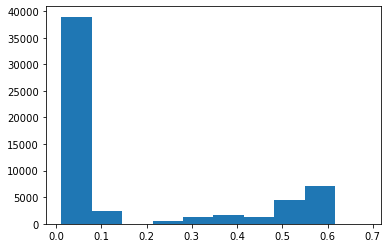

In [12]:
plt.hist(d_to_nearest_all[d_to_nearest_all!=1])

### Using Levenshtein distance

In [ ]:
freq = np.histogram(d_to_nearest, bins=10)
cov = 2
smoothed_freq0 = gaussian_filter1d(freq[0], cov)
#     ___ detection of local minimums and maximums ___
b = (np.diff(np.sign(np.diff(smoothed_freq0))) > 0).nonzero()[0] + 1 
# local min
freq[1][b]